# Brazilian E-Commerce
Olist merupakan startup toserba(toko serba ada) online berpusat di Sao Paulo, Brazil. Olist mulai dibangun pada tahun 2015 oleh Tiago Dalvi yang pada saat ini memiliki lebih dari 300 employee, 9000 toko dan 2 juta customer. dengan platform online, Olist mengkoneksikan usaha-usaha kecil kepada konsumennya melalui platoform online dan mengirimkan barang dengan partner jasa logistik mereka.

sistem kerja Olist cukup mudah dan seperti e-commerce lainnya, setelah konsumen melakukan pembelian, penjual harus melakukan konfirmasi order dan mengirimkan barangnya melalui partner jasa logistik olist. setelah barang diterima konsumen, konsumen dapat melakukan review atau survey mengenai pembelian yang dilakukan.



#Problem Statement

Saat ini dunia e-commerce menjadi media penjualan paling besar dan paling diminati oleh masyarakat luas. dari sisi penjual, terdapat kemudahan untuk memasarkan produk hingga ke pasar dunia. dari sisi customer, opsi barang yang banyak dapat dijadikan bahan pertimbangan untuk memperoleh barang yang paling baik dan sesuai dengan kebutuhan. Hal ini menjadi sebuah peluang untuk memperoleh keuntungan secara maksimal dari sisi penjual, maupun pembeli. 

dalam menghadapi peluang dalam dunia e-commerce ini, review menjadi tolak ukur penting seorang calon customer untuk membeli suatu barang. menurut [artikel](https://www.bigcommerce.com/blog/online-reviews/) dari bigcommerce.com, reviews dapat membantu customer untuk memilih dan melakukan komparasi barang, membangun kepercayaan customer terhadap toko, bahkan meningkatkan penjualan. sedikit review buruk akan menjadi penentu seorang calon customer untuk memutuskan pembelian di suatu toko.

dengan bertambahnya persaingan penjualan, penjual harus melakukan usaha lebih agar barang yang ditawarkan menjadi lebih menarik dan menghasilkan review yang juga baik. **faktor penentu  seperti jumlah foto, deskripsi barang, lama pengiriman, dan lainnya** dapat menjadi faktor penentu review yang diberikan oleh customer.

# Goals

dengan bantuan prediction tool, Olist dapat **membantu seller untuk memberikan prediksi review yang diberikan dengan skala 1-5 (1 adalah review buruk dan 5 adalah review baik)**  sehingga review yang diberikan customer dapat membantu seller untuk melariskan penjualan. dengan review yang baik, tentunya akan membantu calon pembeli lain yakin untuk membeli pada toko yang memiliki review terbaik.

Selanjutnya dengan banyaknya tingkat penjualan yang terjadi pada aplikasi Olist, tingkat kepercayaan masyarakat semakin tinggi pada Olist. pada akhirnya akan membawa traffic, mendatangkan keuntungan dan meningkatkan ketertarikan investor untuk menanam modal.

# Analytic Approach

Jadi yang perlu dilakukan adalah melakukan analisis data untuk memperoleh pola dari data yang ada dan membangun suatu model regresi yang akan membantu perusahaan untuk menyediakan 'tool' prediksi review kepada seller sehingga dapat meningkatkan penjualannya.



In [417]:
# from google.colab import drive
# drive.mount('/content/drive')

In [418]:
# !pip install category_encoders
# import category_encoders as ce

In [579]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
import missingno as msno

from sklearn.compose import ColumnTransformer
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV, KFold
from sklearn.pipeline import Pipeline
from sklearn import compose, pipeline, preprocessing

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from imblearn import pipeline
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE, SMOTEN, SMOTENC
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN,SMOTETomek

from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.metrics import roc_curve, roc_auc_score,classification_report, f1_score, confusion_matrix

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier


# Import Data

In [420]:
cust=pd.read_csv(r'C:\1. Alois\FINAL PROJECT\olist_customers_dataset.csv')
location=pd.read_csv(r'C:\1. Alois\FINAL PROJECT\olist_geolocation_dataset.csv')
item=pd.read_csv(r'C:\1. Alois\FINAL PROJECT\olist_order_items_dataset.csv')
payments=pd.read_csv(r'C:\1. Alois\FINAL PROJECT\olist_order_payments_dataset.csv')
order=pd.read_csv(r'C:\1. Alois\FINAL PROJECT\olist_orders_dataset.csv')
review=pd.read_csv(r'C:\1. Alois\FINAL PROJECT\olist_order_reviews_dataset.csv')
products=pd.read_csv(r'C:\1. Alois\FINAL PROJECT\olist_products_dataset.csv')
sellers=pd.read_csv(r'C:\1. Alois\FINAL PROJECT\olist_sellers_dataset.csv')
translation=pd.read_csv(r'C:\1. Alois\FINAL PROJECT\product_category_name_translation.csv')

# Data Understanding

data Brazilian E-Commerce terdiri dari 9 dataset yang terhubung dari beberapa key feature yang dijelaskan pada visualisasi berikut <img src="dataset.png">

In [421]:
#keterangan feature yang berasal dari kaggle
cust_exp = {'Feature' :['customer_id','customer_unique_id','customer_zip_code_prefix','customer_city','customer_state'],
            'Description' : ['key to the orders dataset. Each order has a unique customer_id.',
             'unique identifier of a customer.',
             'first five digits of customer zip code',
             'customer_city	customer city name',
             'customer state']}
cust_exp=pd.DataFrame(cust_exp)
pd.set_option('display.max_colwidth', None)

# memasukan informasi tipe data, null data, jumlah unique data dan contoh informasi yang diberikan
listitem=[]
for col in cust.columns:
    listitem.append([cust[col].dtype, cust[col].isna().sum(), round((cust[col].isna().sum()/len(cust[col]))*100, 2),
                    cust[col].nunique(), list(cust[col].drop_duplicates().sample(2).values)]);
listitem = pd.DataFrame(columns=['dataType', 'null', 'null(%)', 'unique', 'uniqueSample'],data=listitem)
cust_exp=cust_exp.join(listitem)
cust_exp

,Feature,Description,dataType,null,null(%),unique,uniqueSample
0,customer_id,key to the orders dataset. Each order has a unique customer_id.,object,0,0.0,99441,"[9e83d47684eb1a58b1c31830f5de10ac, b3c46b392f9c8ee8077c19223ec84e5b]"
1,customer_unique_id,unique identifier of a customer.,object,0,0.0,96096,"[d1da9d696ea8fd3eb079ddacbfb3b243, cbac7189914344caf1d1b4e3ad65c8ce]"
2,customer_zip_code_prefix,first five digits of customer zip code,int64,0,0.0,14994,"[4770, 28635]"
3,customer_city,customer_city\tcustomer city name,object,0,0.0,4119,"[sao jose da lapa, chapada gaucha]"
4,customer_state,customer state,object,0,0.0,27,"[PA, AC]"


pada dataset cust, terdapat 5 variabel yang menjelaskan detail dari masing masing customer. pada dataset ini diambil hanya 2 variabel yaitu customer_id dan customer_city. 
1. customer_unique_id tidak diambil karena sudah diwakilkan oleh customer_id
1. customer_zip_code_prefix terlalu bervariasi dan memiliki keberagaman yang tinggi, hal ini dapat menyebabkan keberagaman data terlalu tinggi sehingga menjadi terlalu spesifik
1. customer_state memiliki keberagaman yang terlalu sedikit, menurut [wikipedia]('https://id.wikipedia.org/wiki/Brasil), luas brazil yang mencapai 8515767 km2 sehingga jika hanya dibagi menjadi 27 kategori, data akan cenderung homogen

In [422]:
#keterangan feature yang berasal dari kaggle
location_exp = {'Feature' :['geolocation_zip_code_prefix','geolocation_lat', 'geolocation_lng','geolocation_city', 'geolocation_state'],
            'Description' : ['first 5 digits of zip code',
                             'latitude','longitude',' city name','state']}
location_exp=pd.DataFrame(location_exp)
pd.set_option('display.max_colwidth', None)

# memasukan informasi tipe data, null data, jumlah unique data dan contoh informasi yang diberikan
listitem=[]
for col in location.columns:
    listitem.append([location[col].dtype, location[col].isna().sum(), round((location[col].isna().sum()/len(location[col]))*100, 2),
                    location[col].nunique(), list(location[col].drop_duplicates().sample(2).values)]);
listitem = pd.DataFrame(columns=['dataType', 'null', 'null(%)', 'unique', 'uniqueSample'],data=listitem)
location_exp=location_exp.join(listitem)
location_exp

,Feature,Description,dataType,null,null(%),unique,uniqueSample
0,geolocation_zip_code_prefix,first 5 digits of zip code,int64,0,0.0,19015,"[30186, 15385]"
1,geolocation_lat,latitude,float64,0,0.0,717360,"[-23.784063858722323, -22.821751648578]"
2,geolocation_lng,longitude,float64,0,0.0,717613,"[-44.519858993524494, -44.02830184218654]"
3,geolocation_city,city name,object,0,0.0,8011,"[cortes, sao miguel dos campos]"
4,geolocation_state,state,object,0,0.0,27,"[AM, PR]"


pada dataset location terdapat 5 variabel yang menjelaskan lokasi geografis dari zip code yang ada. data ini tidak diambil karena dalam proses analisis kali ini, setiap data lokasi dianalisis berdasarkan nama kotanya.

In [423]:
#keterangan feature yang berasal dari kaggle
item_exp = {'Feature' :['order_id','order_item','product_id','seller_id','shipping_limit_date','price','freight_value'],
            'Description' : ['order unique identifier',
             'sequential number identifying number of items included in the same order.',
             'product unique identifier',
             'seller unique identifier',
             'Shows the seller shipping limit date for handling the order over to the logistic partner.',
             'item price',
             'item freight value item (if an order has more than one item the freight value is splitted between items)']}
item_exp=pd.DataFrame(item_exp)
pd.set_option('display.max_colwidth', None)

# memasukan informasi tipe data, null data, jumlah unique data dan contoh informasi yang diberikan
listitem=[]
for col in item.columns:
    listitem.append([item[col].dtype, item[col].isna().sum(), round((item[col].isna().sum()/len(item[col]))*100, 2),
                    item[col].nunique(), list(item[col].drop_duplicates().sample(2).values)]);
listitem = pd.DataFrame(columns=['dataType', 'null', 'null(%)', 'unique', 'uniqueSample'],data=listitem)
item_exp=item_exp.join(listitem)
item_exp

,Feature,Description,dataType,null,null(%),unique,uniqueSample
0,order_id,order unique identifier,object,0,0.0,98666,"[d6facb241e387bcff2026c6cc25eaf68, 92caa5283abcb12faf71683ba259debd]"
1,order_item,sequential number identifying number of items included in the same order.,int64,0,0.0,21,"[17, 7]"
2,product_id,product unique identifier,object,0,0.0,32951,"[b6665355b9d865e088250a5c8d7b36c1, 4f9a85a01a3a49b2760aed83cf3d78e1]"
3,seller_id,seller unique identifier,object,0,0.0,3095,"[900ba814c251a692506d7834c1218441, f593898ec748b7a8cb81fc04edafd98a]"
4,shipping_limit_date,Shows the seller shipping limit date for handling the order over to the logistic partner.,object,0,0.0,93318,"[2018-01-02 23:39:31, 2018-03-02 20:09:24]"
5,price,item price,float64,0,0.0,5968,"[16.37, 181.62]"
6,freight_value,item freight value item (if an order has more than one item the freight value is splitted between items),float64,0,0.0,6999,"[3.61, 8.26]"


pada dataset item, terdapat 7 variabel yang menjelaskan detail dari masing masing item penjualan dengan keterangannya. pada dataset ini diambil seluruh variabel yaitu order_id, order_item, product_id, seller_id, shipping_limit_date, price dan freight_value.

In [424]:
#keterangan feature yang berasal dari kaggle
payments_exp = {'Feature' :['order_id','payment_sequential','payment_type','payment_installments','payment_value'],
            'Description' : ['order unique identifier',
             'a customer may pay an order with more than one payment method. If he does so, a sequence will be created to',
             'method of payment chosen by customer',
             'number of installments chosen by the customer.',
             'payment_value	transaction value']}
payments_exp=pd.DataFrame(payments_exp)
pd.set_option('display.max_colwidth', None)

# memasukan informasi tipe data, null data, jumlah unique data dan contoh informasi yang diberikan
listitem=[]
for col in payments.columns:
    listitem.append([payments[col].dtype, payments[col].isna().sum(), round((payments[col].isna().sum()/len(payments[col]))*100, 2),
                    payments[col].nunique(), list(payments[col].drop_duplicates().sample(2).values)]);
listitem = pd.DataFrame(columns=['dataType', 'null', 'null(%)', 'unique', 'uniqueSample'],data=listitem)
payments_exp=payments_exp.join(listitem)
payments_exp

,Feature,Description,dataType,null,null(%),unique,uniqueSample
0,order_id,order unique identifier,object,0,0.0,99440,"[ab6ea89ab2dbf39322353c4bfcbe33de, bbec914f0b66a98578b9d47f241ba92d]"
1,payment_sequential,"a customer may pay an order with more than one payment method. If he does so, a sequence will be created to",int64,0,0.0,29,"[10, 19]"
2,payment_type,method of payment chosen by customer,object,0,0.0,5,"[boleto, debit_card]"
3,payment_installments,number of installments chosen by the customer.,int64,0,0.0,24,"[24, 3]"
4,payment_value,payment_value\ttransaction value,float64,0,0.0,29077,"[55.61, 213.93]"


pada dataset payments terdapat 5 variabel yang menjelaskan detail transaksi yang dilakukan oleh order tertentu. pada dataset ini diambil seluruh variabel yaitu order_id, payment_sequential, payment_type, payment_installments, dan payment_value.

In [425]:
#keterangan feature yang berasal dari kaggle
order_exp = {'Feature' :['order_id','customer_id','order_status','order_purchase_timestamp','order_approved_at','order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date'],
            'Description' : ['order unique identifier',
             'key to the orders dataset. Each order has a unique customer_id.',
             'Reference to the order status (delivered, shipped, etc).',
             'Shows the purchase timestamp.',
             'Shows the payment approval timestamp.',
             'Shows the order posting timestamp. When it was handled to the logistic partner.',
             'Shows the actual order delivery date to the customer.',
             'Shows the estimated delivery date that was informed to customer at the purchase moment.']}
order_exp=pd.DataFrame(order_exp)
pd.set_option('display.max_colwidth', None)

# memasukan informasi tipe data, null data, jumlah unique data dan contoh informasi yang diberikan
listitem=[]
for col in order.columns:
    listitem.append([order[col].dtype, order[col].isna().sum(), round((order[col].isna().sum()/len(order[col]))*100, 2),
                    order[col].nunique(), list(order[col].drop_duplicates().sample(2).values)]);
listitem = pd.DataFrame(columns=['dataType', 'null', 'null(%)', 'unique', 'uniqueSample'],data=listitem)
order_exp=order_exp.join(listitem)
order_exp

,Feature,Description,dataType,null,null(%),unique,uniqueSample
0,order_id,order unique identifier,object,0,0.00,99441,"[c900c2a8fb7c9834925f3110fd7ed231, 57d81bf4762c3335d0c6f021fe001856]"
1,customer_id,key to the orders dataset. Each order has a unique customer_id.,object,0,0.00,99441,"[84c5d4fbaf120aae381fad077416eaa0, a87b62ae912a22495d5f5bd919019b49]"
2,order_status,"Reference to the order status (delivered, shipped, etc).",object,0,0.00,8,"[created, approved]"
3,order_purchase_timestamp,Shows the purchase timestamp.,object,0,0.00,98875,"[2018-04-05 22:48:17, 2017-02-07 19:50:11]"
4,order_approved_at,Shows the payment approval timestamp.,object,160,0.16,90733,"[2017-02-04 19:04:42, 2017-06-20 10:50:31]"
5,order_delivered_carrier_date,Shows the order posting timestamp. When it was handled to the logistic partner.,object,1783,1.79,81018,"[2017-11-29 20:28:29, 2017-12-07 17:59:13]"
6,order_delivered_customer_date,Shows the actual order delivery date to the customer.,object,2965,2.98,95664,"[2018-04-09 16:41:14, 2018-08-10 22:48:29]"
7,order_estimated_delivery_date,Shows the estimated delivery date that was informed to customer at the purchase moment.,object,0,0.00,459,"[2017-09-11 00:00:00, 2017-05-22 00:00:00]"


In [426]:
# order.describe(include='object')
order.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


pada dataset order, terdapat 7 variabel yang menjelaskan detail order yang terjadi setelah transaksi. pada dataset ini diambil seluruh variabel, yaitu order_id, order_status, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date.

In [427]:
#keterangan feature yang berasal dari kaggle
review_exp = {'Feature' :['review_id','order_id','review_score','review_comment_title','review_comment_message','review_creation_date','review_answer_timestamp'],
            'Description' : ['unique review identifier',
             'order unique identifier.',
             'Note ranging from 1 to 5 given by the customer on a satisfaction survey.',
             'Comment title from the review left by the customer, in Portuguese.',
             'Comment message from the review left by the customer, in Portuguese.',
             'Shows the date in which the satisfaction survey was sent to the customer.',
             'Shows satisfaction survey answer timestamp.']}
review_exp=pd.DataFrame(review_exp)
pd.set_option('display.max_colwidth', None)

# memasukan informasi tipe data, null data, jumlah unique data dan contoh informasi yang diberikan
listitem=[]
for col in review.columns:
    listitem.append([review[col].dtype, review[col].isna().sum(), round((review[col].isna().sum()/len(review[col]))*100, 2),
                    review[col].nunique(), list(review[col].drop_duplicates().sample(2).values)]);
listitem = pd.DataFrame(columns=['dataType', 'null', 'null(%)', 'unique', 'uniqueSample'],data=listitem)
review_exp=review_exp.join(listitem)
review_exp

,Feature,Description,dataType,null,null(%),unique,uniqueSample
0,review_id,unique review identifier,object,0,0.00,98410,"[3d4ecce9d0ddd48f76c449d38277b95f, 9045ede04a5d9c5aa16afdf074e59411]"
1,order_id,order unique identifier.,object,0,0.00,98673,"[1fd3ed20f784f14ed6b198d18c484c0d, 3f8dc90a470531b954d9b654e20c58af]"
2,review_score,Note ranging from 1 to 5 given by the customer on a satisfaction survey.,int64,0,0.00,5,"[5, 1]"
3,review_comment_title,"Comment title from the review left by the customer, in Portuguese.",object,87656,88.34,4527,"[por enquanto...nenhuma , Chegou muito rápido 🤗]"
4,review_comment_message,"Comment message from the review left by the customer, in Portuguese.",object,58247,58.70,36159,"[Recomendo loja e produto\r\n, Mercadoria entregue dentro do prazo estipulado.]"
5,review_creation_date,Shows the date in which the satisfaction survey was sent to the customer.,object,0,0.00,636,"[2017-03-05 00:00:00, 2017-05-06 00:00:00]"
6,review_answer_timestamp,Shows satisfaction survey answer timestamp.,object,0,0.00,98248,"[2017-10-03 16:04:09, 2017-07-30 21:21:09]"


pada dataset review, terdapat 7 variabel yang menjelaskan input review dari customer kepada seller. pada dataset ini diambil 5 variabel, yaitu review_id, order_id, review_score, review_creation_date, review_answer_timestamp. untuk review_comment_title dan review_comment_message tidak diambil karena pada proses analisis kali ini tidak melakukan text processing dan isi dari comment dalam bahasa portugis.

In [428]:
#keterangan feature yang berasal dari kaggle
products_exp = {'Feature' :['product_id','product_category_name','product_name_length','product_description_length','product_photos_qty','product_weight_g','product_length_cm','product_height_cm','product_width_cm' ],
            'Description' : ['unique product identifier',
                            'root category of product, in Portuguese.',
                            'number of characters extracted from the product name.',
                            'number of characters extracted from the product description.',
                            'number of product published photos',
                            'product weight measured in grams.',
                            'product length measured in centimeters.',
                            'product height measured in centimeters.',
                            'product width measured in centimeters.']}
products_exp=pd.DataFrame(products_exp)
pd.set_option('display.max_colwidth', None)

# memasukan informasi tipe data, null data, jumlah unique data dan contoh informasi yang diberikan
listitem=[]
for col in products.columns:
    listitem.append([products[col].dtype, products[col].isna().sum(), round((products[col].isna().sum()/len(products[col]))*100, 2),
                    products[col].nunique(), list(products[col].drop_duplicates().sample(2).values)]);
listitem = pd.DataFrame(columns=['dataType', 'null', 'null(%)', 'unique', 'uniqueSample'],data=listitem)
products_exp=products_exp.join(listitem)
products_exp

,Feature,Description,dataType,null,null(%),unique,uniqueSample
0,product_id,unique product identifier,object,0,0.00,32951,"[fa304c5424fd292aed9c35eb36d9f495, fa7e28f040bfdcfdbd93f82a31277e43]"
1,product_category_name,"root category of product, in Portuguese.",object,610,1.85,73,"[artes_e_artesanato, dvds_blu_ray]"
2,product_name_length,number of characters extracted from the product name.,float64,610,1.85,66,"[29.0, 24.0]"
3,product_description_length,number of characters extracted from the product description.,float64,610,1.85,2960,"[1591.0, 1805.0]"
4,product_photos_qty,number of product published photos,float64,610,1.85,19,"[10.0, 11.0]"
5,product_weight_g,product weight measured in grams.,float64,2,0.01,2204,"[15500.0, 82.0]"
6,product_length_cm,product length measured in centimeters.,float64,2,0.01,99,"[48.0, 76.0]"
7,product_height_cm,product height measured in centimeters.,float64,2,0.01,102,"[nan, 95.0]"
8,product_width_cm,product width measured in centimeters.,float64,2,0.01,95,"[61.0, 25.0]"


pada dataset products menjelaskan detail informasi mengenai produk_id tertentu. variabel pada dataset ini akan diambil semuanya untuk dianalisis lebih lanjut

In [429]:
#keterangan feature yang berasal dari kaggle
sellers_exp = {'Feature' :['seller_id','seller_zip_code_prefix','seller_city','seller_state'],
            'Description' : ['seller unique identifier',
             'first 5 digits of seller zip code',
             'seller city name',
             'seller state']}
sellers_exp=pd.DataFrame(sellers_exp)
pd.set_option('display.max_colwidth', None)

# memasukan informasi tipe data, null data, jumlah unique data dan contoh informasi yang diberikan
listitem=[]
for col in sellers.columns:
    listitem.append([sellers[col].dtype, sellers[col].isna().sum(), round((sellers[col].isna().sum()/len(sellers[col]))*100, 2),
                    sellers[col].nunique(), list(sellers[col].drop_duplicates().sample(2).values)]);
listitem = pd.DataFrame(columns=['dataType', 'null', 'null(%)', 'unique', 'uniqueSample'],data=listitem)
sellers_exp=sellers_exp.join(listitem)
sellers_exp

,Feature,Description,dataType,null,null(%),unique,uniqueSample
0,seller_id,seller unique identifier,object,0,0.0,3095,"[b2ac621f0d0322434d04a12b078b9369, c6381d2d013342748761e906d45aff76]"
1,seller_zip_code_prefix,first 5 digits of seller zip code,int64,0,0.0,2246,"[8072, 35570]"
2,seller_city,seller city name,object,0,0.0,611,"[bombinhas, barbacena]"
3,seller_state,seller state,object,0,0.0,23,"[SC, MA]"


pada dataset seller, terdaat 4 variabel yang menjelaskan mengenai detail dari seller. pada dataset ini diambil hanya 2 variabel yaitu seller_id dan seller_city. 
1. seller_zip_code_prefix terlalu bervariasi dan memiliki keberagaman yang tinggi, hal ini dapat menyebabkan keberagaman data terlalu tinggi sehingga menjadi terlalu spesifik
1. seller_state memiliki keberagaman yang terlalu sedikit, menurut [wikipedia]('https://id.wikipedia.org/wiki/Brasil), luas brazil yang mencapai 8515767 km2 sehingga jika hanya dibagi menjadi 27 kategori, data akan cenderung homogen

In [430]:
#keterangan feature yang berasal dari kaggle
translation_exp = {'Feature' :['product_category_name','product_category_name_english'],
            'Description' : ['category name in Portuguese',
             'category name in English',]}
translation_exp=pd.DataFrame(translation_exp)
pd.set_option('display.max_colwidth', None)

# memasukan informasi tipe data, null data, jumlah unique data dan contoh informasi yang diberikan
listitem=[]
for col in translation.columns:
    listitem.append([translation[col].dtype, translation[col].isna().sum(), round((translation[col].isna().sum()/len(translation[col]))*100, 2),
                    translation[col].nunique(), list(translation[col].drop_duplicates().sample(2).values)]);
listitem = pd.DataFrame(columns=['dataType', 'null', 'null(%)', 'unique', 'uniqueSample'],data=listitem)
translation_exp=translation_exp.join(listitem)
translation_exp

,Feature,Description,dataType,null,null(%),unique,uniqueSample
0,product_category_name,category name in Portuguese,object,0,0.0,71,"[esporte_lazer, construcao_ferramentas_seguranca]"
1,product_category_name_english,category name in English,object,0,0.0,71,"[kitchen_dining_laundry_garden_furniture, flowers]"


pada dataset translation diambil semua variabel untuk menggantikan product_category name yang terdapat pada dataset product yang sebelumnya pada bahasa portugis, akan diubah menjadi bahasa inggris

In [431]:
#  Drop variabel yang tidak digunakan

# item.drop(['order_item_id','shipping_limit_date','price','freight_value'],axis=1,inplace=True)
# payments.drop(['payment_sequential','payment_installments','payment_value'],axis=1,inplace=True)
# order.drop(['order_status','order_estimated_delivery_date'],axis=1,inplace=True)
# products.drop(['product_weight_g','product_length_cm','product_height_cm','product_width_cm'],axis=1,inplace=True)

# Penggabungan Dataset

In [432]:
df=item.merge(sellers,on='seller_id',how='left')
df=df.merge(products,on='product_id',how='left')
df=order.merge(df,on='order_id',how='left')
df=df.merge(payments,on='order_id',how='left')
df=df.merge(cust,on='customer_id',how='left')
df=review.merge(df,on='order_id',how='left')
df=df.merge(translation,on='product_category_name',how='left')

df.drop('product_category_name',axis=1,inplace=True)

In [433]:
df.columns

Index(['review_id', 'order_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'customer_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'order_item_id', 'product_id',
       'seller_id', 'shipping_limit_date', 'price', 'freight_value',
       'seller_zip_code_prefix', 'seller_city', 'seller_state',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'payment_sequential',
       'payment_type', 'payment_installments', 'payment_value',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'product_category_name_english'],
      dtype='object')

beberapa data tidak terpakai yaitu
1. Location
* zip code atau Zone Improvement Plan code merupakan nilai karakter spesifik dari suatu daerah, daerah yang dimaksud dalam zipcode lingkupnya sangat spesifik. pada dataset ini terdiri dari 2246 untuk seller dan 14994 untuk customer. nilai ini terlalu spesifik untuk dimasukan ke dalam model dan bisa diwakilkan oleh feature lain
* state menunjukan provinsi dari suatu daerah, karakter dari state pada seller sebanyak 23 dan customer sebanyak 27 sehingga dapat membuat dataset terlalu umum. 
sehingga untuk feature customer_zip_code_prefix, customer_state, seller_zip_code_prefix dan seller_state akan di drop dan dijelaskan pada feature customer_city dan seller_city, sehingga zip code dan state tidak diperlukan.

2. Review, target pada prediction tools kali ini untuk memprediksi nilai review_score. secara timeline, review_comment_title, review_comment_message, review_creation_date, review_answer_timestamp muncul bersamaan dengan nilai review_score. sehingga variabel ini tidak dapat kita masukan ke dalam modelling prediction tools sehingga feature ini akan di drop

In [434]:
df.drop(['seller_zip_code_prefix','seller_state'],axis=1,inplace=True)
df.drop(['review_comment_title','review_comment_message','review_creation_date','review_answer_timestamp'],axis=1,inplace=True)
df.drop(['customer_unique_id','customer_zip_code_prefix','customer_state'],axis=1,inplace=True)

In [435]:
display(
    df.info(),
    df.describe(),
    df.describe(include='object').transpose())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118146 entries, 0 to 118145
Data columns (total 30 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   review_id                      118146 non-null  object 
 1   order_id                       118146 non-null  object 
 2   review_score                   118146 non-null  int64  
 3   customer_id                    118146 non-null  object 
 4   order_status                   118146 non-null  object 
 5   order_purchase_timestamp       118146 non-null  object 
 6   order_approved_at              117974 non-null  object 
 7   order_delivered_carrier_date   116098 non-null  object 
 8   order_delivered_customer_date  114861 non-null  object 
 9   order_estimated_delivery_date  118146 non-null  object 
 10  order_item_id                  117332 non-null  float64
 11  product_id                     117332 non-null  object 
 12  seller_id                     

None

,review_score,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_installments,payment_value
count,118146.000000,117332.000000,117332.000000,117332.000000,115637.000000,115637.000000,115637.000000,117312.000000,117312.000000,117312.000000,117312.000000,118143.000000,118143.000000,118143.000000
mean,4.015582,1.194141,120.522417,20.027075,48.767635,785.809352,2.205497,2110.734656,30.254092,16.612461,23.071271,1.095139,2.938050,172.204038
std,1.400436,0.684241,182.942903,15.828114,10.033983,652.375747,1.717772,3785.084700,16.177472,13.452453,11.745779,0.732782,2.775373,266.016169
min,1.000000,1.000000,0.850000,0.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,1.000000,0.000000,0.000000
25%,4.000000,1.000000,39.900000,13.080000,42.000000,346.000000,1.000000,300.000000,18.000000,8.000000,15.000000,1.000000,1.000000,60.730000
50%,5.000000,1.000000,74.900000,16.280000,52.000000,600.000000,1.000000,700.000000,25.000000,13.000000,20.000000,1.000000,2.000000,108.000000
75%,5.000000,1.000000,134.900000,21.180000,57.000000,983.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,1.000000,4.000000,189.005000
max,5.000000,21.000000,6735.000000,409.680000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,29.000000,24.000000,13664.080000


,count,unique,top,freq
review_id,118146,98410,eef5dbca8d37dfce6db7d7b16dd0525e,63
order_id,118146,98673,895ab968e7bb0d5659d16cd74cd1650c,63
customer_id,118146,98673,270c23a11d024a44c896d1894b261a83,63
order_status,118146,8,delivered,114862
order_purchase_timestamp,118146,98115,2017-08-08 20:26:31,63
order_approved_at,117974,90082,2017-08-08 20:43:31,63
order_delivered_carrier_date,116098,80451,2017-08-10 11:58:14,63
order_delivered_customer_date,114861,95022,2017-08-14 12:46:18,63
order_estimated_delivery_date,118146,459,2017-12-20 00:00:00,659
product_id,117332,32789,aca2eb7d00ea1a7b8ebd4e68314663af,533


## Exploratory Data Analysis

In [436]:
df.head()

,review_id,order_id,review_score,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,...,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_type,payment_installments,payment_value,customer_city,product_category_name_english
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,41dcb106f807e993532d446263290104,delivered,2018-01-11 15:30:49,2018-01-11 15:47:59,2018-01-12 21:57:22,2018-01-17 18:42:41,2018-02-02 00:00:00,...,1300.0,30.0,30.0,35.0,1.0,credit_card,8.0,397.26,osasco,sports_leisure
1,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,41dcb106f807e993532d446263290104,delivered,2018-01-11 15:30:49,2018-01-11 15:47:59,2018-01-12 21:57:22,2018-01-17 18:42:41,2018-02-02 00:00:00,...,1300.0,30.0,30.0,35.0,1.0,credit_card,8.0,397.26,osasco,sports_leisure
2,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,8a2e7ef9053dea531e4dc76bd6d853e6,delivered,2018-02-28 12:25:19,2018-02-28 12:48:39,2018-03-02 19:08:15,2018-03-09 23:17:20,2018-03-14 00:00:00,...,245.0,19.0,14.0,14.0,1.0,credit_card,1.0,88.09,nova odessa,computers_accessories
3,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,e226dfed6544df5b7b87a48208690feb,delivered,2018-02-03 09:56:22,2018-02-03 10:33:41,2018-02-06 16:18:28,2018-02-16 17:28:48,2018-03-09 00:00:00,...,6550.0,20.0,20.0,20.0,1.0,credit_card,1.0,194.12,santo antonio de jesus,computers_accessories
4,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,de6dff97e5f1ba84a3cd9a3bc97df5f6,delivered,2017-04-09 17:41:13,2017-04-09 17:55:19,2017-04-10 14:24:47,2017-04-20 09:08:35,2017-05-10 00:00:00,...,7650.0,20.0,20.0,20.0,1.0,credit_card,1.0,222.84,gravatal,garden_tools


In [437]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118146 entries, 0 to 118145
Data columns (total 30 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   review_id                      118146 non-null  object 
 1   order_id                       118146 non-null  object 
 2   review_score                   118146 non-null  int64  
 3   customer_id                    118146 non-null  object 
 4   order_status                   118146 non-null  object 
 5   order_purchase_timestamp       118146 non-null  object 
 6   order_approved_at              117974 non-null  object 
 7   order_delivered_carrier_date   116098 non-null  object 
 8   order_delivered_customer_date  114861 non-null  object 
 9   order_estimated_delivery_date  118146 non-null  object 
 10  order_item_id                  117332 non-null  float64
 11  product_id                     117332 non-null  object 
 12  seller_id                     

In [438]:
df.describe()

,review_score,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_installments,payment_value
count,118146.000000,117332.000000,117332.000000,117332.000000,115637.000000,115637.000000,115637.000000,117312.000000,117312.000000,117312.000000,117312.000000,118143.000000,118143.000000,118143.000000
mean,4.015582,1.194141,120.522417,20.027075,48.767635,785.809352,2.205497,2110.734656,30.254092,16.612461,23.071271,1.095139,2.938050,172.204038
std,1.400436,0.684241,182.942903,15.828114,10.033983,652.375747,1.717772,3785.084700,16.177472,13.452453,11.745779,0.732782,2.775373,266.016169
min,1.000000,1.000000,0.850000,0.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,1.000000,0.000000,0.000000
25%,4.000000,1.000000,39.900000,13.080000,42.000000,346.000000,1.000000,300.000000,18.000000,8.000000,15.000000,1.000000,1.000000,60.730000
50%,5.000000,1.000000,74.900000,16.280000,52.000000,600.000000,1.000000,700.000000,25.000000,13.000000,20.000000,1.000000,2.000000,108.000000
75%,5.000000,1.000000,134.900000,21.180000,57.000000,983.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,1.000000,4.000000,189.005000
max,5.000000,21.000000,6735.000000,409.680000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,29.000000,24.000000,13664.080000


In [439]:
display(cust.describe(), cust.describe(include='object'))

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


,customer_id,customer_unique_id,customer_city,customer_state
count,99441,99441,99441,99441
unique,99441,96096,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,sao paulo,SP
freq,1,17,15540,41746


In [440]:
df.columns

Index(['review_id', 'order_id', 'review_score', 'customer_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'order_item_id', 'product_id',
       'seller_id', 'shipping_limit_date', 'price', 'freight_value',
       'seller_city', 'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'payment_sequential',
       'payment_type', 'payment_installments', 'payment_value',
       'customer_city', 'product_category_name_english'],
      dtype='object')

## Sebaran Data

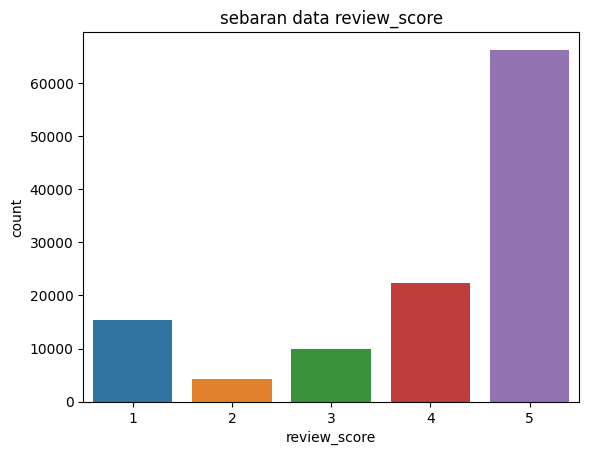

5    56.153403
4    18.891033
1    13.058419
3     8.374384
2     3.522760
Name: review_score, dtype: float64

In [441]:
sns.countplot(data=df, x=df['review_score'])
plt.title('sebaran data review_score')
plt.show()
df['review_score'].value_counts() / df['review_score'].count() * 100

### Order Status

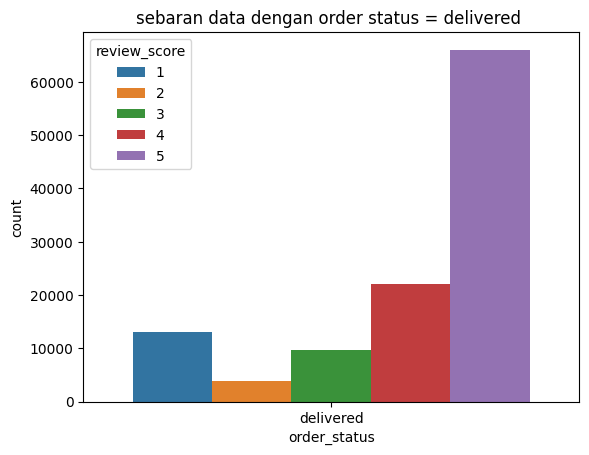

In [442]:
sns.countplot(data=df,x=df.loc[df['order_status']=='delivered']['order_status'],hue='review_score')
plt.title('sebaran data dengan order status = delivered ')
plt.show()

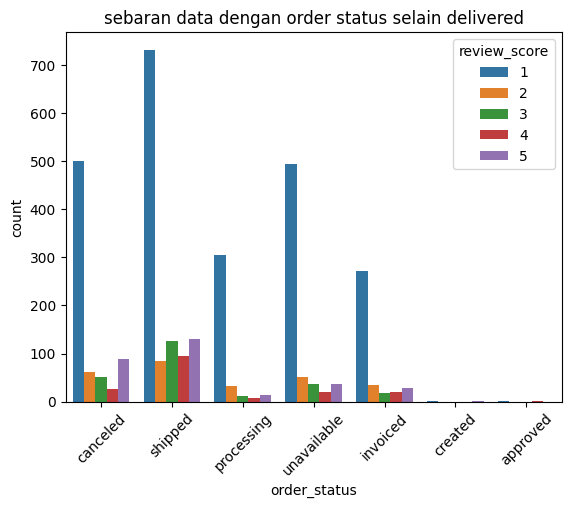

In [443]:
sns.countplot(data=df,x=df.loc[df['order_status']!='delivered']['order_status'],hue='review_score')
plt.title('sebaran data dengan order status selain delivered')
plt.xticks(rotation=45)
plt.show()

terlihat bahwa terdapat banyak review_score dengan nilai 5 pada order_status = delivered

## Price

price menunjukan harga dari barang yang dibeli pada e-commerce.

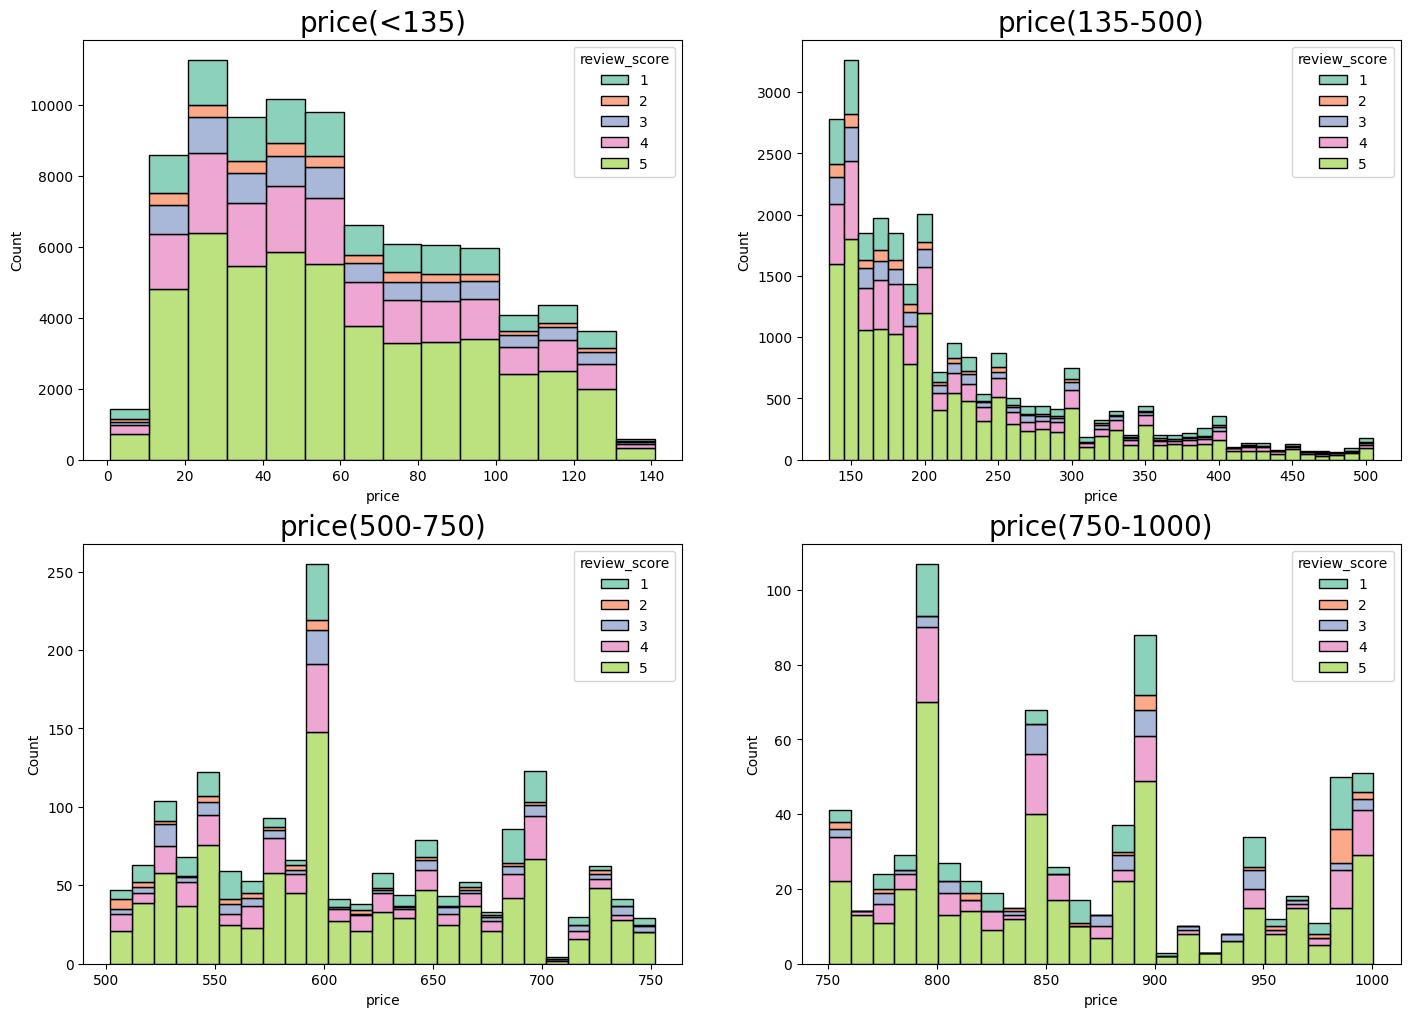

In [444]:
show = 'price'
plt.figure(figsize=(17,12))

plt.subplot(221)
show1 = df.loc[df[show]<135]
sns.histplot(data=show1,stat='count',multiple='stack',x=show1[show],hue=show1['review_score'],binwidth=10,palette="Set2")
plt.title(show+'(<135)',fontsize=20)

plt.subplot(222)
show2 = df.loc[(df[show]>135) & (df[show]<500)]
sns.histplot(data=show2,stat='count',multiple='stack',x=show2[show],hue=show2['review_score'],binwidth=10,palette="Set2")
plt.title(show+'(135-500)',fontsize=20)

plt.subplot(223)
show3 = df.loc[(df[show]>500) & (df[show]<750)]
sns.histplot(data=show3,stat='count',multiple='stack',x=show3[show],hue=show3['review_score'],binwidth=10,palette="Set2")
plt.title(show+'(500-750)',fontsize=20)

plt.subplot(224)
show4 = df.loc[(df[show]>750) & (df[show]<1000)]
sns.histplot(data=show4,stat='count',multiple='stack',x=show4[show],hue=show4['review_score'],binwidth=10,palette="Set2")
plt.title(show+'(750-1000)',fontsize=20)

plt.show()

## Freight_value

merupakan nilai pengiriman dari barang

In [445]:
df['freight_value'].describe()

count    117332.000000
mean         20.027075
std          15.828114
min           0.000000
25%          13.080000
50%          16.280000
75%          21.180000
max         409.680000
Name: freight_value, dtype: float64

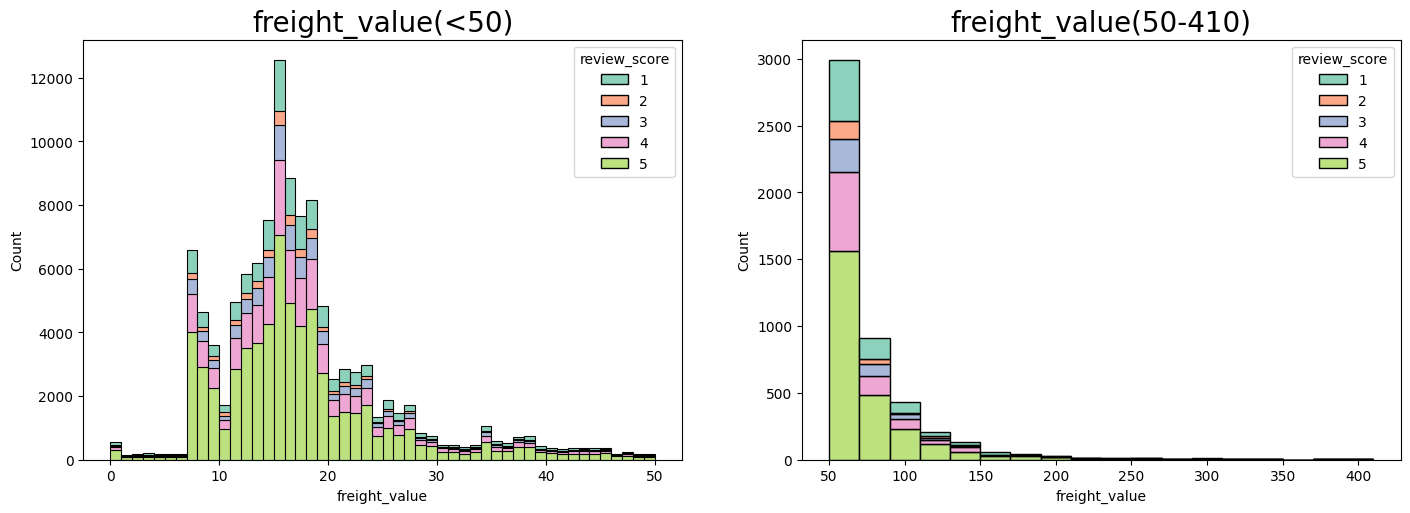

In [446]:
show = 'freight_value'
plt.figure(figsize=(17,12))

plt.subplot(221)
show1 = df.loc[df[show]<50]
sns.histplot(data=show1,stat='count',multiple='stack',x=show1[show],hue=show1['review_score'],binwidth=1,palette="Set2")
plt.title(show+'(<50)',fontsize=20)

plt.subplot(222)
show2 = df.loc[(df[show]>50) & (df[show]<410)]
sns.histplot(data=show2,stat='count',multiple='stack',x=show2[show],hue=show2['review_score'],binwidth=20,palette="Set2")
plt.title(show+'(50-410)',fontsize=20)

plt.show()

## Product dimention and weight

In [447]:
df[['product_weight_g', 'product_length_cm','product_height_cm', 'product_width_cm']].describe()

,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,117312.000000,117312.000000,117312.000000,117312.000000
mean,2110.734656,30.254092,16.612461,23.071271
std,3785.084700,16.177472,13.452453,11.745779
min,0.000000,7.000000,2.000000,6.000000
25%,300.000000,18.000000,8.000000,15.000000
50%,700.000000,25.000000,13.000000,20.000000
75%,1800.000000,38.000000,20.000000,30.000000
max,40425.000000,105.000000,105.000000,118.000000


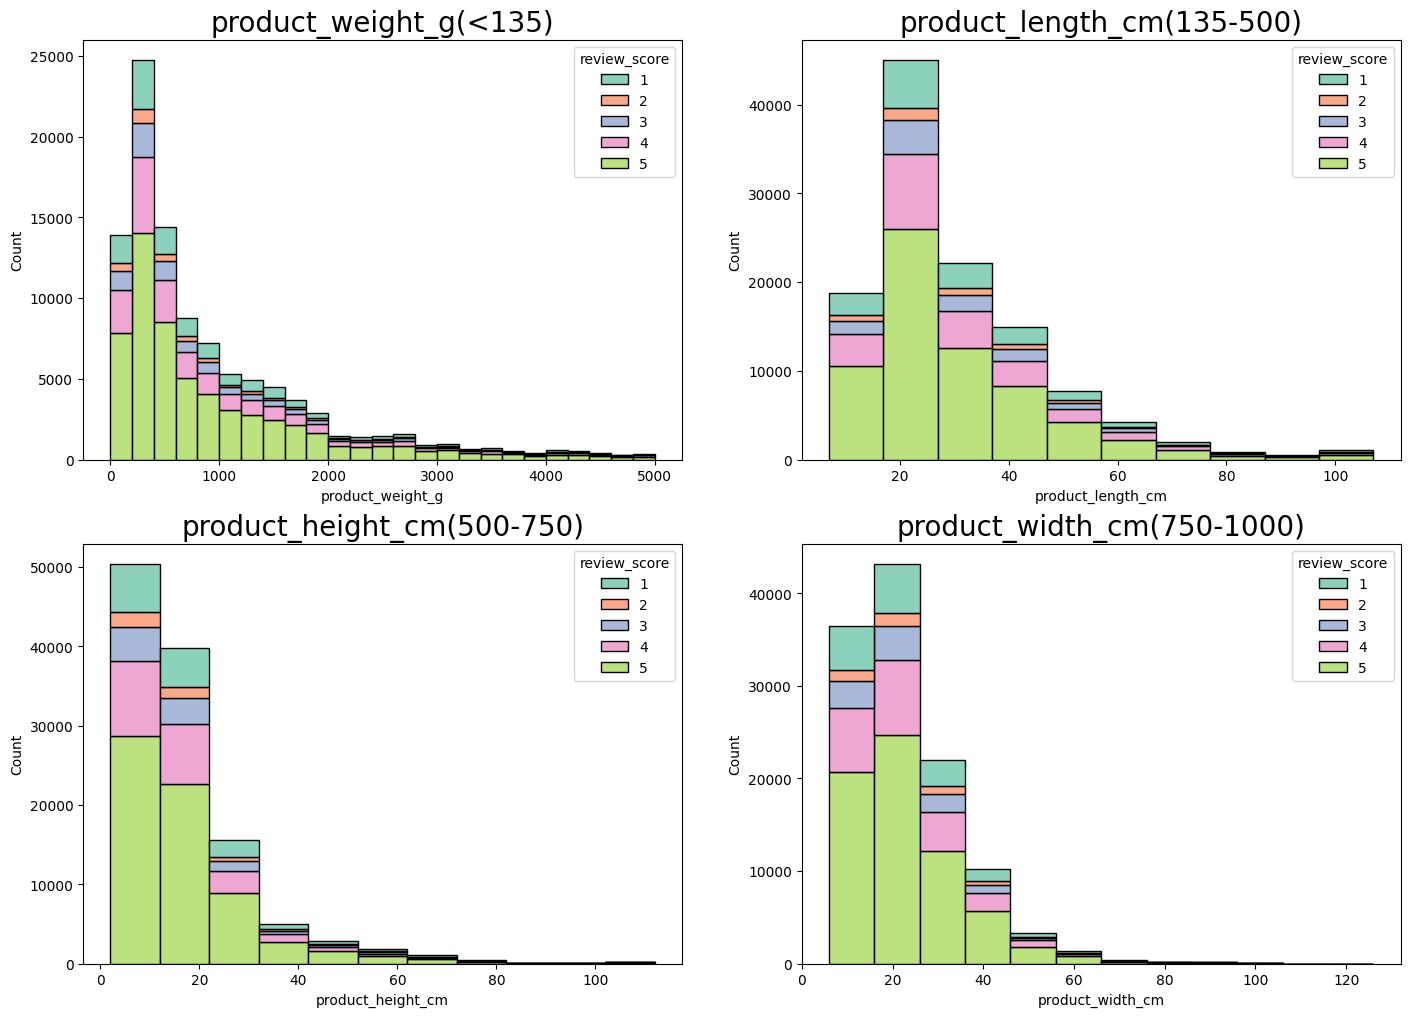

In [448]:
show = 'product_weight_g'
plt.figure(figsize=(17,12))

plt.subplot(221)
show1 = df.loc[df[show]<5000]
sns.histplot(data=show1,stat='count',multiple='stack',x=show1[show],hue=show1['review_score'],binwidth=200,palette="Set2")
plt.title(show+'(<135)',fontsize=20)

show = 'product_length_cm'
plt.subplot(222)
show2 = df
sns.histplot(data=show2,stat='count',multiple='stack',x=show2[show],hue=show2['review_score'],binwidth=10,palette="Set2")
plt.title(show+'(135-500)',fontsize=20)

show = 'product_height_cm'
plt.subplot(223)
show3 = df
sns.histplot(data=show3,stat='count',multiple='stack',x=show3[show],hue=show3['review_score'],binwidth=10,palette="Set2")
plt.title(show+'(500-750)',fontsize=20)

show = 'product_width_cm'
plt.subplot(224)
show4 = df
sns.histplot(data=show4,stat='count',multiple='stack',x=show4[show],hue=show4['review_score'],binwidth=10,palette="Set2")
plt.title(show+'(750-1000)',fontsize=20)

plt.show()

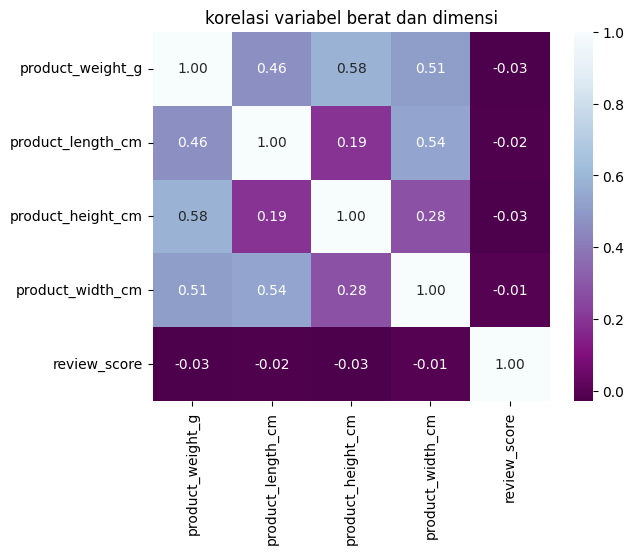

In [449]:
corr = df[['product_weight_g', 'product_length_cm','product_height_cm', 'product_width_cm','review_score']].corr()
sns.heatmap(data=corr,annot=True, fmt='.2f',cmap='BuPu_r')
plt.title('korelasi variabel berat dan dimensi')
plt.show()

dimensi dan berat produk tidak memberikan dampak signifikan terhadap data, kita coba melakukan feature engineering pada dataset ini dengan menjadikan variabel ini sebagai massa jenis (density)

In [450]:
df['density'] = df['product_weight_g']/(df['product_length_cm']*df['product_height_cm']*df['product_width_cm'])*1000

<Axes: >

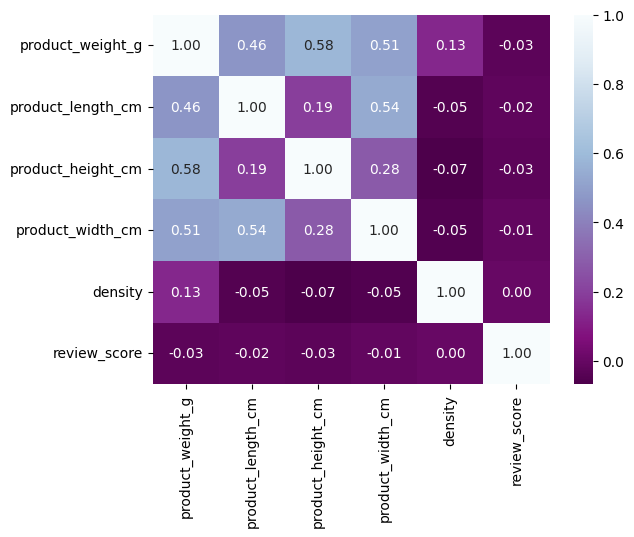

In [451]:
corr = df[['product_weight_g', 'product_length_cm','product_height_cm', 'product_width_cm','density','review_score']].corr()
sns.heatmap(data=corr,annot=True, fmt='.2f',cmap='BuPu_r')

setelah dibuat feature density, ternyata korelasi terhadap review score semakin kecil. untuk mengurangi noise dan memudahkan processing untuk mendapatkan modelling, maka feature ini akan di drop

## payment sequential, payment type, payment installment dan payment value

In [452]:
a=['payment_type', 'payment_installments','payment_value','payment_sequential']
for i in a:
    print('nilai {} memiliki nilai unik {}'.format(i,df[i].unique()))

nilai payment_type memiliki nilai unik ['credit_card' 'boleto' 'voucher' 'debit_card' 'not_defined' nan]
nilai payment_installments memiliki nilai unik [ 8.  1. 10.  2.  3.  4.  6.  9.  5.  7. 13. 15. 18. 12. 17. 20. 14. 24.
 16. 11.  0. 21. nan 22. 23.]
nilai payment_value memiliki nilai unik [397.26  88.09 194.12 ...   9.45 327.19 231.56]
nilai payment_sequential memiliki nilai unik [ 1.  2.  3.  4.  5.  6.  7.  9. 10. 11. 12.  8. 14. 13. 15. 19. 17. 16.
 18. nan 27. 25. 29. 28. 21. 26. 23. 20. 24. 22.]


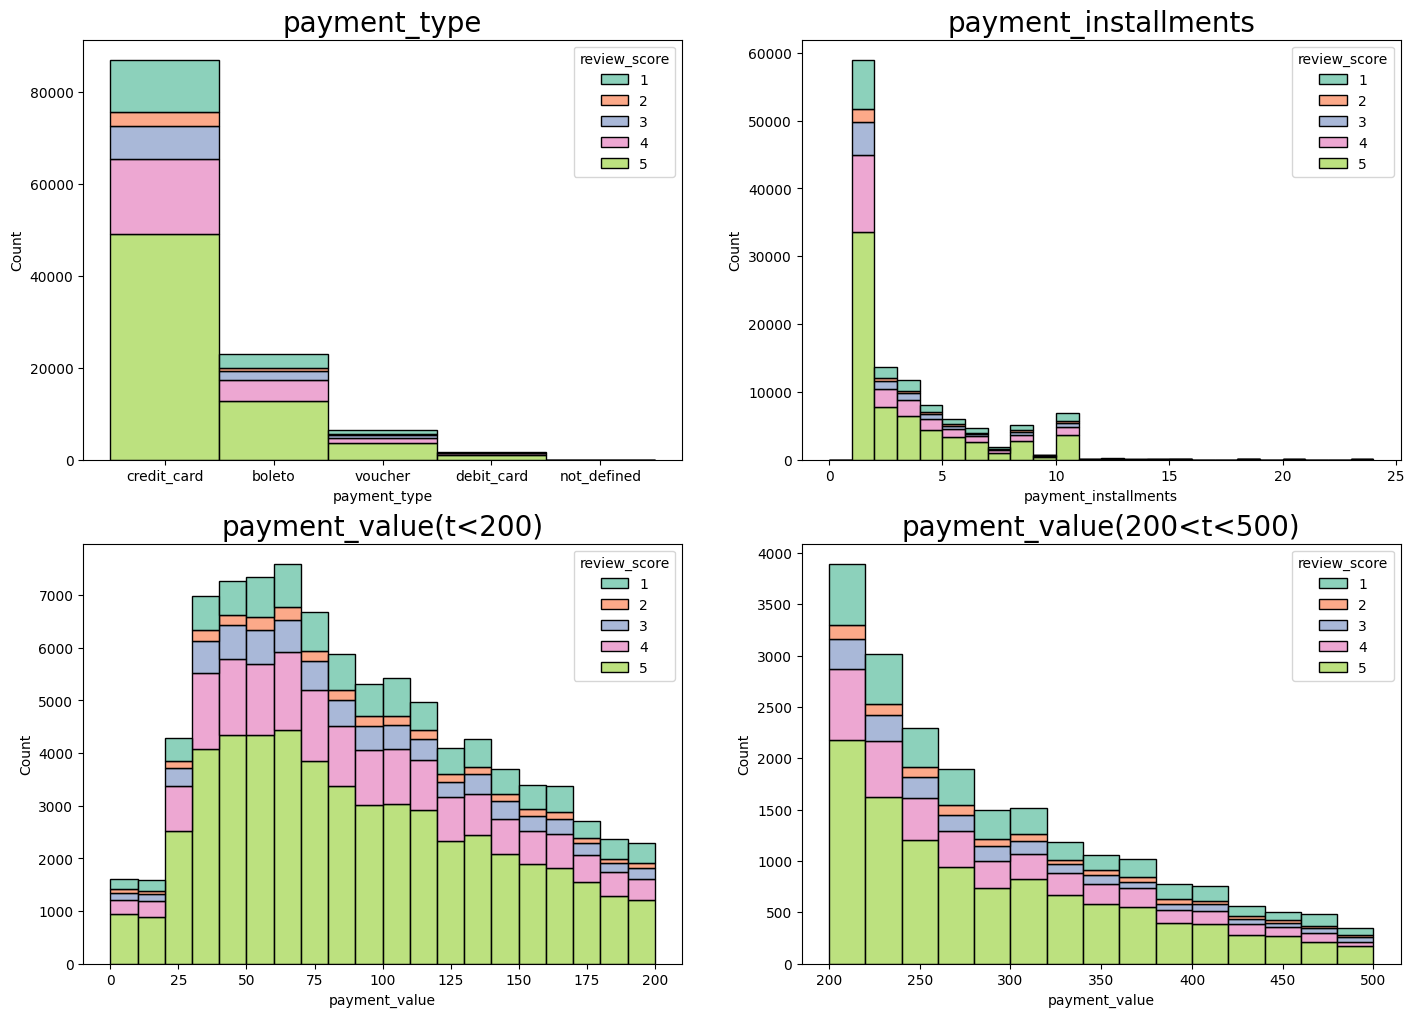

In [453]:
plt.figure(figsize=(17,12))

plt.subplot(221)
sns.histplot(data=df,x=df['payment_type'],hue='review_score',multiple='stack',palette="Set2")
plt.title('payment_type',fontsize=20)

plt.subplot(222)
sns.histplot(data=df,x=df['payment_installments'],hue='review_score',multiple='stack',binwidth=1,palette="Set2")
plt.title('payment_installments',fontsize=20)

show = 'payment_value'

plt.subplot(223)
show1 = df.loc[df[show]<200]
sns.histplot(data=show1,stat='count',multiple='stack',x=show1[show],hue=show1['review_score'],binwidth=10,palette="Set2")
plt.title(show+'(t<200)',fontsize=20)

plt.subplot(224)
show2 = df.loc[(df[show]>200) & (df[show]<500)]
sns.histplot(data=show2,stat='count',multiple='stack',x=show2[show],hue=show2['review_score'],binwidth=20,palette="Set2")
plt.title(show+'(200<t<500)',fontsize=20)

plt.show()

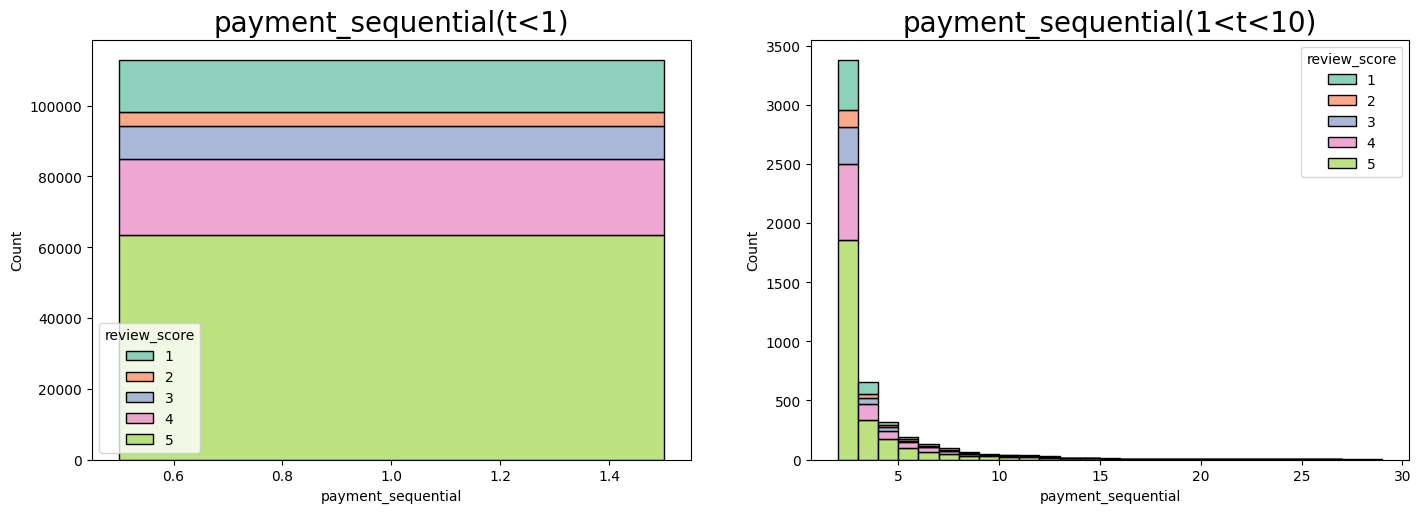

In [454]:
show = 'payment_sequential'
plt.figure(figsize=(17,12))

plt.subplot(221)
show1 = df.loc[df[show]==1]
sns.histplot(data=show1,stat='count',multiple='stack',x=show1[show],hue=show1['review_score'],palette="Set2")
plt.title(show+'(t<1)',fontsize=20)

plt.subplot(222)
show2 = df.loc[(df[show]>1)]
sns.histplot(data=show2,stat='count',multiple='stack',x=show2[show],hue=show2['review_score'],binwidth=1,palette="Set2")
plt.title(show+'(1<t<10)',fontsize=20)

plt.show()

berikut merupakan feature dan penjelasannya 
1. payment_type = menjelaskan tipe pembayaran yang dipilih oleh customer
1. payment_installments = menjelaskan nilai pembayaran yang dipilih oleh customer
1. payment_value = transaction value
1. payment_sequential = jumlah skema pembayaran yang dipilih customer (pembayaran bisa lebih dari 1 cara yang dipilih)

nilai payment_type, payment_installments dan payment_value merupakan input dari customer. secara fungsi, feature ini membantu pembayaran customer yang tidak akan menyebabkan dampak terhadap review_score, sehingga feature ini akan di drop

## Date type dataset

pada dataset terdapat feature yang menandakan waktu, yaitu
1. order_purchase_timestamp = menunjukan timestamp pembelian
1. order_approved_at = menunjukan timestamp saat di approve oleh seller
1. order_delivered_carrier_date = menunjukan timestamp saat seller memberikan barang ke partner logistik
1. order_delivered_customer_date = menunjukan timestamp saat barang sampai di customer
1. order_estimated_delivery_date = menunjukan timestamp estimasi barang sampai di customer
1. shipping_limit_date = menunjukan batasan timestamp seller untuk memberikan pesanan kepada partner logistik


data ini masih berupa object sehingga perlu diubah ke dalam datetime

In [455]:
df['order_purchase_timestamp']=pd.to_datetime(df['order_purchase_timestamp'])
df['order_approved_at']=pd.to_datetime(df['order_approved_at'])
df['order_delivered_carrier_date']=pd.to_datetime(df['order_delivered_carrier_date'])
df['order_delivered_customer_date']=pd.to_datetime(df['order_delivered_customer_date'])
df['order_estimated_delivery_date']=pd.to_datetime(df['order_estimated_delivery_date'])
df['shipping_limit_date']=pd.to_datetime(df['shipping_limit_date'])

data datetime tidak memiliki arti ketika berdiri sendiri sehingga dibuat beberapa feature baru untuk diperoleh analisis lebih dalam
1. approve_time = order_approved_at - order_purchase_timestamp, nilai ini dapat mengindikasikan tingkat respons dari penjual menerima order
1. seller_sent = order_delivered_carrier_date - order_approved_at, nilai ini memberikan informasi kecepatan pengiriman seller setelah order di approve
1. carrier_performance = order_delivered_customer_date - order_delivered_carrier_date, nilai ini memberikan informasi lama pengiriman oleh kurir
1. delivery_time = order_delivered_customer_date - order_purchase_timestamp, nilai ini memberikan informasi jarak waktu pesan hingga diterima oleh customer
1. estimated, nilai ini memberikan informasi keterlambatan estimasi pengiriman yang di atur oleh aplikasi, nilai ini diperoleh dari feature estimated(order_estimated_delivery_date - order_delivered_customer_date)
1. sent_carrier, nilai ini memberikan informasi keterlambatan seller untuk memberikan barang kepada logistic partner

In [456]:
df['approve_time']=df['order_approved_at']-df['order_purchase_timestamp']
df['approve_time']=df['approve_time']/np.timedelta64(1, 'h')

df['carrier_response']=df['order_delivered_carrier_date']-df['order_approved_at']
df['carrier_response']=df['carrier_response']/np.timedelta64(1, 'h')

df['carrier_performance']=df['order_delivered_customer_date']-df['order_delivered_carrier_date']
df['carrier_performance']=df['carrier_performance']/np.timedelta64(1, 'h')

df['delivery_time']=df['order_delivered_customer_date']-df['order_purchase_timestamp']
df['delivery_time']=df['delivery_time']/np.timedelta64(1, 'h')

df['estimated_days']=df['order_estimated_delivery_date']-df['order_delivered_customer_date']
df['estimated_days']=df['estimated_days'].dt.days

df['sent_carrier']=df['shipping_limit_date']-df['order_delivered_carrier_date']
df['sent_carrier']=df['sent_carrier']/np.timedelta64(1, 'h')
# df.drop(['estimated'],axis=1,inplace=True)

In [457]:
df.describe()

,review_score,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,...,payment_sequential,payment_installments,payment_value,density,approve_time,carrier_response,carrier_performance,delivery_time,estimated_days,sent_carrier
count,118146.000000,117332.000000,117332.000000,117332.000000,115637.000000,115637.000000,115637.000000,117312.000000,117312.000000,117312.000000,...,118143.000000,118143.000000,118143.000000,117312.000000,117974.000000,116083.000000,114860.000000,114861.000000,114861.000000,116097.000000
mean,4.015582,1.194141,120.522417,20.027075,48.767635,785.809352,2.205497,2110.734656,30.254092,16.612461,...,1.095139,2.938050,172.204038,191.794087,10.577147,68.411702,219.976581,298.702427,11.083318,79.966500
std,1.400436,0.684241,182.942903,15.828114,10.033983,652.375747,1.717772,3785.084700,16.177472,13.452453,...,0.732782,2.775373,266.016169,789.460093,25.909426,85.810643,205.337796,224.814741,10.097310,156.354758
min,1.000000,1.000000,0.850000,0.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,-4109.256111,-386.308056,12.801944,-189.000000,-2802.301667
25%,4.000000,1.000000,39.900000,13.080000,42.000000,346.000000,1.000000,300.000000,18.000000,8.000000,...,1.000000,1.000000,60.730000,67.200000,0.215556,21.278889,97.461042,161.781667,6.000000,36.910833
50%,5.000000,1.000000,74.900000,16.280000,52.000000,600.000000,1.000000,700.000000,25.000000,13.000000,...,1.000000,2.000000,108.000000,112.500000,0.346944,44.336389,169.404583,244.556111,12.000000,77.161944
75%,5.000000,1.000000,134.900000,21.180000,57.000000,983.000000,3.000000,1800.000000,38.000000,20.000000,...,1.000000,4.000000,189.005000,191.622103,15.043264,87.500278,285.802292,372.162778,16.000000,124.833889
max,5.000000,21.000000,6735.000000,409.680000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,...,29.000000,24.000000,13664.080000,85227.272727,4509.180556,3018.301667,4924.583333,5000.442222,146.000000,25301.868611


In [458]:
display(df.loc[df['carrier_response']<0].shape,
    df[['order_purchase_timestamp','order_approved_at','order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date',
    'approve_time','carrier_response','carrier_performance','delivery_time','estimated_days']].loc[df['carrier_response']<0].head())

(1593, 37)

,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,approve_time,carrier_response,carrier_performance,delivery_time,estimated_days
33,2018-07-04 20:34:57,2018-07-05 16:33:00,2018-07-05 15:55:00,2018-07-09 20:27:50,2018-07-23,19.967500,-0.633333,100.547222,119.881389,13.0
216,2018-08-14 14:24:51,2018-08-20 14:36:32,2018-08-17 14:44:00,2018-08-20 17:37:56,2018-08-23,144.194722,-71.875556,74.898889,147.218056,2.0
263,2018-04-21 16:49:56,2018-04-24 19:17:35,2018-04-23 22:33:05,2018-05-07 19:22:30,2018-06-01,74.460833,-20.741667,332.823611,386.542778,24.0
284,2018-07-03 13:11:13,2018-07-05 16:32:52,2018-07-03 12:57:00,2018-07-10 17:47:39,2018-07-23,51.360833,-51.597778,172.844167,172.607222,12.0
365,2018-05-07 01:09:09,2018-05-07 16:52:39,2018-05-07 15:09:00,2018-05-24 00:31:18,2018-06-07,15.725000,-1.727500,393.371667,407.369167,13.0


In [459]:
display(df.loc[df['carrier_performance']<0].shape,
    df[['order_purchase_timestamp','order_approved_at','order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date',
    'approve_time','carrier_response','carrier_performance','delivery_time','estimated_days']].loc[df['carrier_performance']<0].head())

(59, 37)

,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,approve_time,carrier_response,carrier_performance,delivery_time,estimated_days
8502,2017-07-07 11:22:13,2017-07-07 12:25:07,2017-07-11 18:15:40,2017-07-11 17:41:26,2017-07-20,1.048333,101.842500,-0.570556,102.320278,8.0
8503,2017-07-07 11:22:13,2017-07-07 12:25:07,2017-07-11 18:15:40,2017-07-11 17:41:26,2017-07-20,1.048333,101.842500,-0.570556,102.320278,8.0
13413,2017-02-10 10:19:10,2017-02-10 10:30:13,2017-03-02 17:34:26,2017-02-14 15:15:57,2017-03-15,0.184167,487.070278,-386.308056,100.946389,28.0
13414,2017-02-10 10:19:10,2017-02-10 10:30:13,2017-03-02 17:34:26,2017-02-14 15:15:57,2017-03-15,0.184167,487.070278,-386.308056,100.946389,28.0
24587,2017-07-26 11:46:34,2017-07-27 10:10:16,2017-08-01 18:17:47,2017-07-31 17:49:56,2017-08-24,22.395000,128.125278,-24.464167,126.056111,23.0


secara timeline, carrier performance dan carrier_response tidak bisa bernilai negatif
1. carrier_resmponse : tidak mungkin bahwa seller mengirimkan paket sebelum pemesanan diapprove
1. carrier_performance : tidak mungkin bahwa barang sampai sebelum paket masuk ke jasa pengiriman

sehingga data yang bernilai minus diatas akan dihapuskan

In [460]:
a_min = df.loc[df['carrier_performance']<0].shape[0]
b_min = df.loc[df['carrier_response']<0].shape[0]
data_shape = df.shape[0]

print('''
    data carrier_performance memiliki nilai tidak masuk akal sebesar {} baris atau {} persen,
    data carrier_response memiliki nilai tidak masuk akal sebesar {} baris atau {} persen,
    jika digabungkan, maka terdapat {} baris atau {} persen'''.format(a_min,round(a_min/data_shape*100,5),b_min,round(b_min/data_shape*100,5),(a_min+b_min),round((a_min+b_min)/data_shape*100,5)))


    data carrier_performance memiliki nilai tidak masuk akal sebesar 59 baris atau 0.04994 persen,
    data carrier_response memiliki nilai tidak masuk akal sebesar 1593 baris atau 1.34833 persen,
    jika digabungkan, maka terdapat 1652 baris atau 1.39827 persen


maka data yang bernilai negatif akan dihapus

In [461]:
delete1 = df.loc[df['carrier_performance']<0].index
delete2 = df.loc[df['carrier_response']<0].index
df.drop(index=delete1,inplace=True)
# df.drop(index=delete2,inplace=True)

### Approve Time

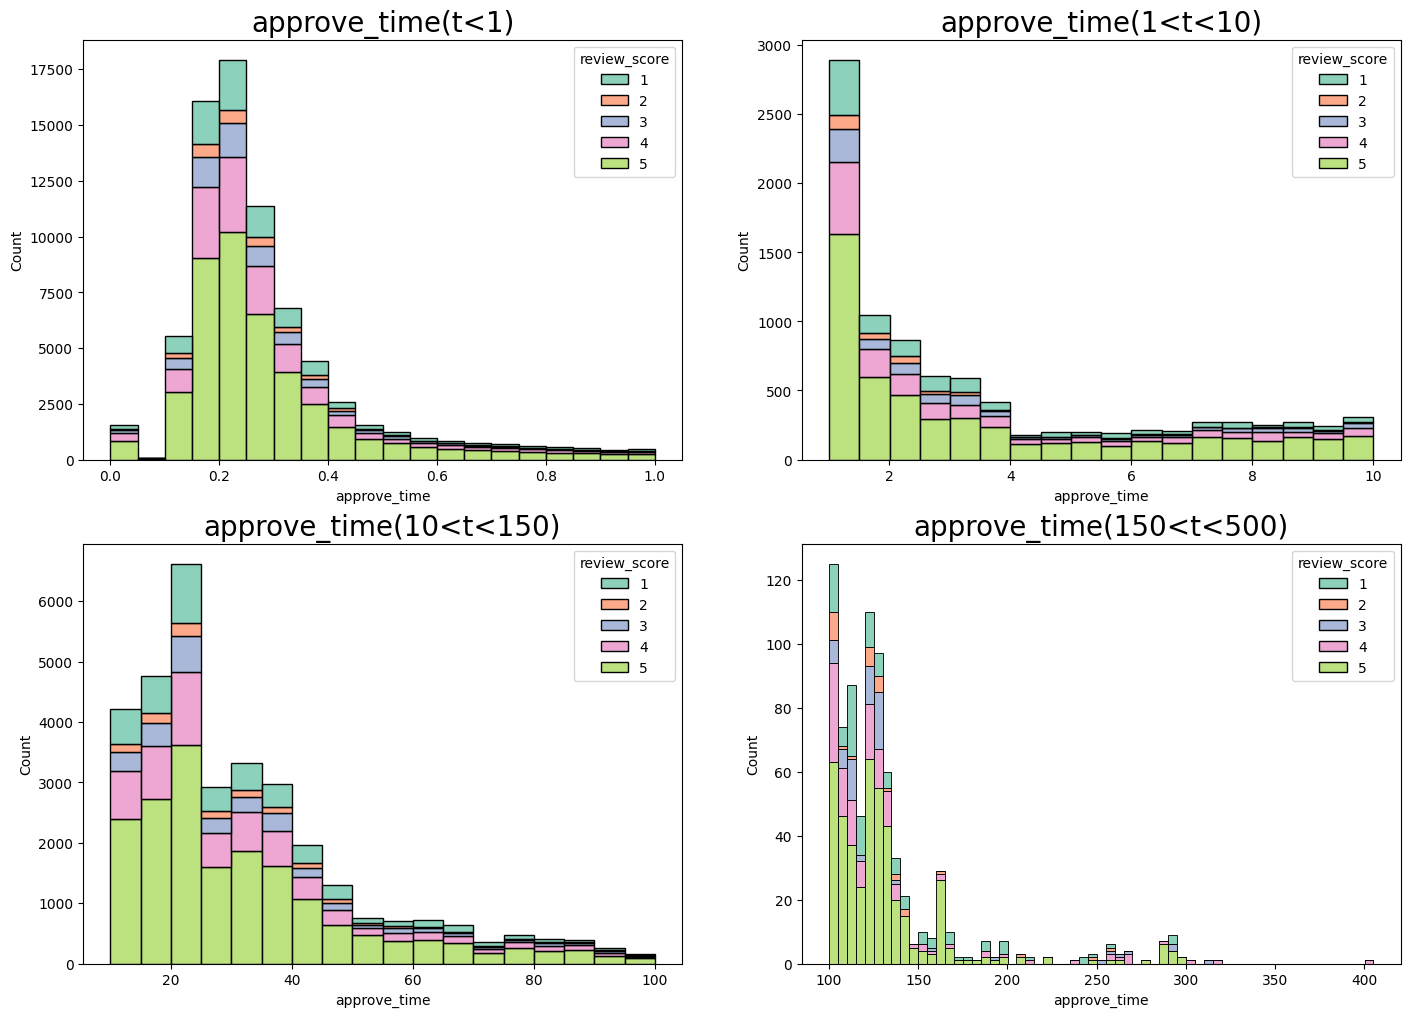

In [462]:
show = 'approve_time'
plt.figure(figsize=(17,12))

plt.subplot(221)
show1 = df.loc[df[show]<1]
sns.histplot(data=show1,stat='count',multiple='stack',x=show1[show],hue=show1['review_score'],binwidth=0.05,palette="Set2")
plt.title(show+'(t<1)',fontsize=20)

plt.subplot(222)
show2 = df.loc[(df[show]>1)& (df[show]<10)]
sns.histplot(data=show2,stat='count',multiple='stack',x=show2[show],hue=show2['review_score'],binwidth=0.5,palette="Set2")
plt.title(show+'(1<t<10)',fontsize=20)

plt.subplot(223)
show3 = df.loc[(df[show]>10)& (df[show]<100)]
sns.histplot(data=show3,stat='count',multiple='stack',x=show3[show],hue=show3['review_score'],binwidth=5,palette="Set2")
plt.title(show+'(10<t<150)',fontsize=20)

plt.subplot(224)
show4 = df.loc[(df[show]>100)& (df[show]<500)]
sns.histplot(data=show4,stat='count',multiple='stack',x=show4[show],hue=show4['review_score'],binwidth=5,palette="Set2")
plt.title(show+'(150<t<500)',fontsize=20)
plt.show()

pada grafik berikut, approve Time tidak memberikan indikasi adanya korelasi terhadap review_score. 

### Carrier Response

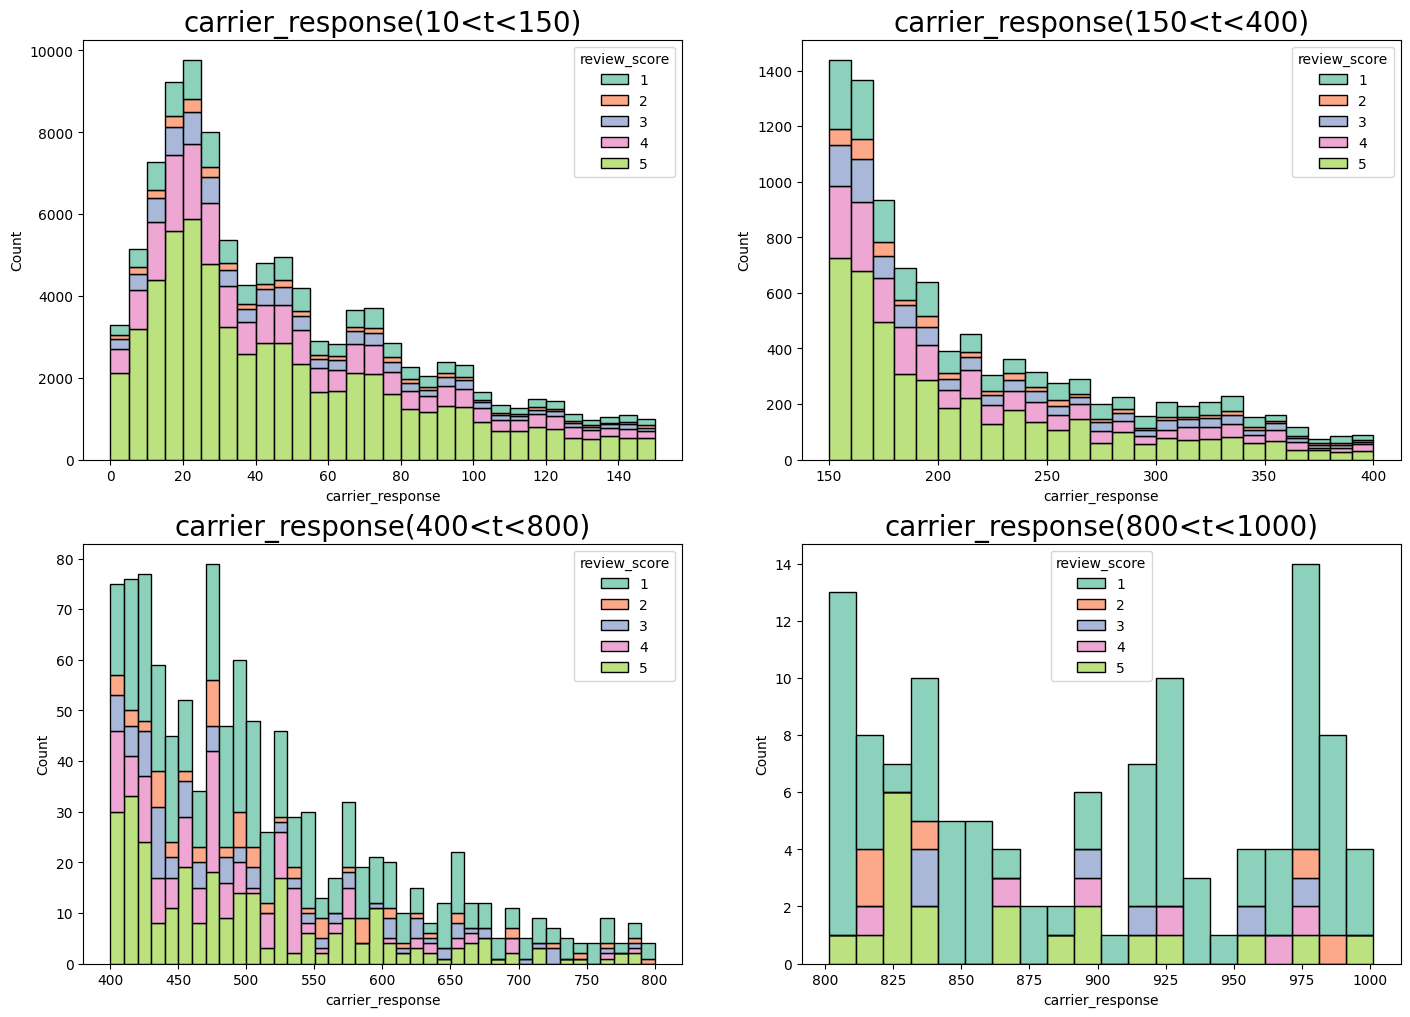

In [463]:
show = 'carrier_response'
plt.figure(figsize=(17,12))

plt.subplot(221)
show3 = df.loc[(df[show]>0)& (df[show]<150)]
sns.histplot(data=show3,stat='count',multiple='stack',x=show3[show],hue=show3['review_score'],binwidth=5,palette="Set2")
plt.title(show+'(10<t<150)',fontsize=20)

plt.subplot(222)
show4 = df.loc[(df[show]>150)& (df[show]<400)]
sns.histplot(data=show4,stat='count',multiple='stack',x=show4[show],hue=show4['review_score'],binwidth=10,palette="Set2")
plt.title(show+'(150<t<400)',fontsize=20)

plt.subplot(223)
show4 = df.loc[(df[show]>400)& (df[show]<800)]
sns.histplot(data=show4,stat='count',multiple='stack',x=show4[show],hue=show4['review_score'],binwidth=10,palette="Set2")
plt.title(show+'(400<t<800)',fontsize=20)

plt.subplot(224)
show4 = df.loc[(df[show]>800)& (df[show]<1000)]
sns.histplot(data=show4,stat='count',multiple='stack',x=show4[show],hue=show4['review_score'],binwidth=10,palette="Set2")
plt.title(show+'(800<t<1000)',fontsize=20)
plt.show()

pada grafik diatas, terdapat korelasi antara carrier_response dengan review_score. semakin lama waktu/durasi carrier_response, maka nilai review akan menjadi semakin jelek

### Carrier Performance

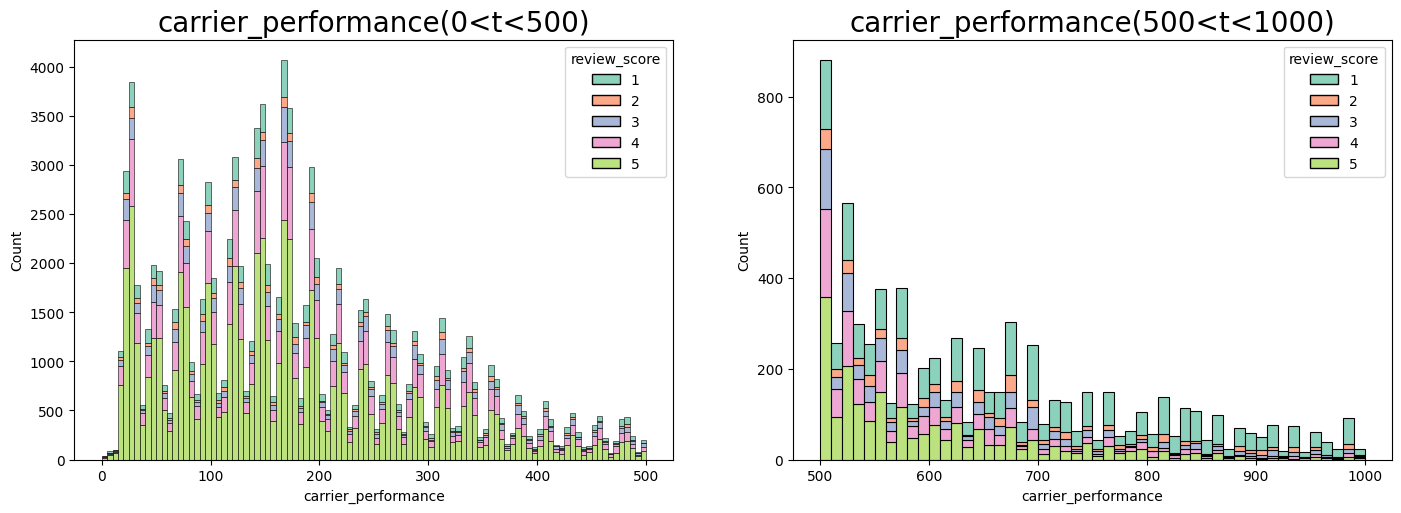

In [464]:
show = 'carrier_performance'
plt.figure(figsize=(17,12))

plt.subplot(221)
show3 = df.loc[(df[show]>0)& (df[show]<500)]
sns.histplot(data=show3,stat='count',multiple='stack',x=show3[show],hue=show3['review_score'],binwidth=5,palette="Set2")
plt.title(show+'(0<t<500)',fontsize=20)

plt.subplot(222)
show4 = df.loc[(df[show]>500)& (df[show]<1000)]
sns.histplot(data=show4,stat='count',multiple='stack',x=show4[show],hue=show4['review_score'],binwidth=10,palette="Set2")
plt.title(show+'(500<t<1000)',fontsize=20)
plt.show()

pada grafik diatas, terdapat korelasi antara carrier_performance dengan review_score. semakin lama waktu/durasi carrier_performance, maka nilai review akan menjadi semakin jelek

### Delivery Time

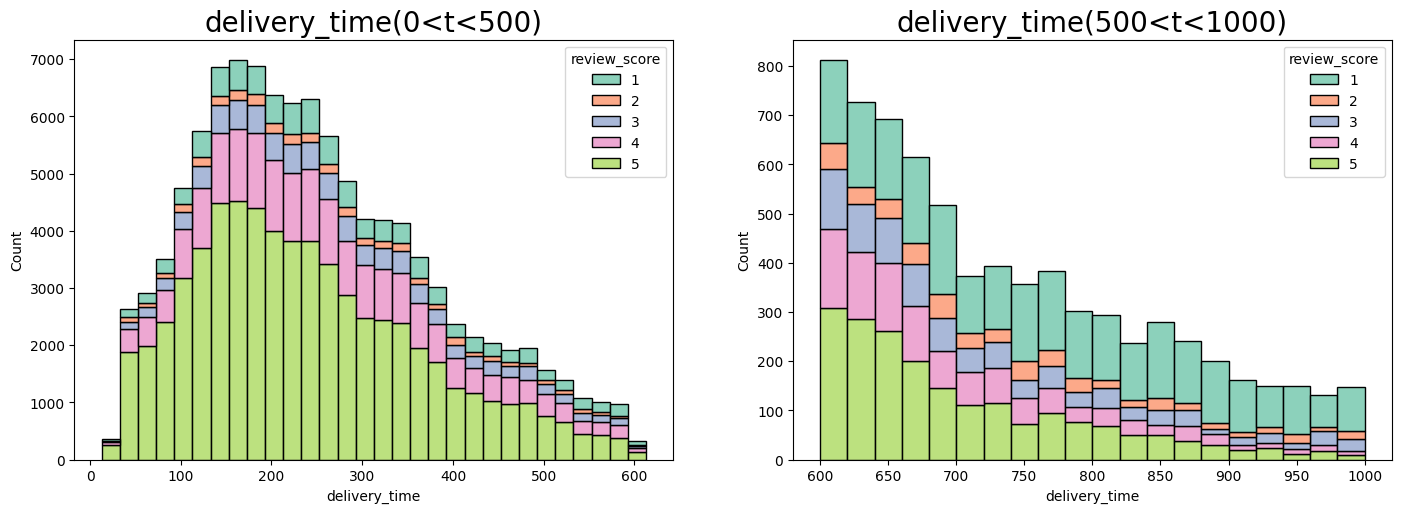

In [465]:
show = 'delivery_time'
plt.figure(figsize=(17,12))

plt.subplot(221)
show3 = df.loc[(df[show]>0)& (df[show]<600)]
sns.histplot(data=show3,stat='count',multiple='stack',x=show3[show],hue=show3['review_score'],binwidth=20,palette="Set2")
plt.title(show+'(0<t<500)',fontsize=20)

plt.subplot(222)
show4 = df.loc[(df[show]>600)& (df[show]<1000)]
sns.histplot(data=show4,stat='count',multiple='stack',x=show4[show],hue=show4['review_score'],binwidth=20,palette="Set2")
plt.title(show+'(500<t<1000)',fontsize=20)
plt.show()

pada grafik diatas, terdapat korelasi antara delivery_time dengan review_score. semakin lama waktu/durasi delivery_time, maka nilai review akan menjadi semakin jelek

### estimated_days

In [466]:
df['estimated_days'].describe()

count    114802.000000
mean         11.078169
std          10.094584
min        -189.000000
25%           6.000000
50%          12.000000
75%          16.000000
max         146.000000
Name: estimated_days, dtype: float64

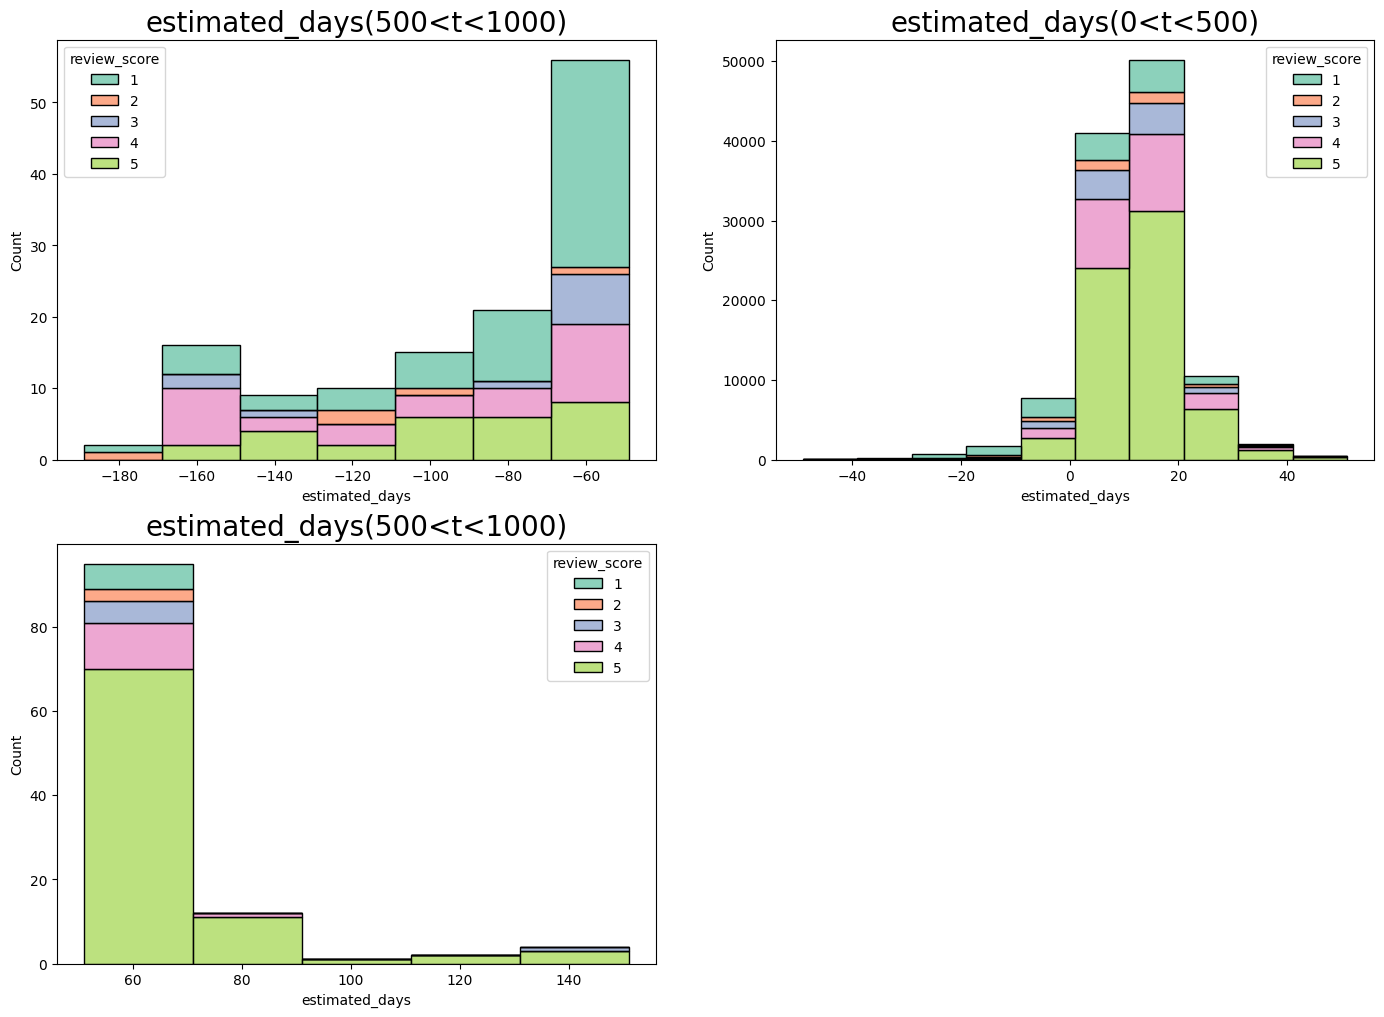

In [467]:
show = 'estimated_days'
plt.figure(figsize=(17,12))

plt.subplot(221)
show2 = df.loc[(df[show]>-200)& (df[show]<-50)]
sns.histplot(data=show2,stat='count',multiple='stack',x=show2[show],hue=show2['review_score'],binwidth=20,palette="Set2")
plt.title(show+'(500<t<1000)',fontsize=20)

plt.subplot(222)
show3 = df.loc[(df[show]>-50)& (df[show]<50)]
sns.histplot(data=show3,stat='count',multiple='stack',x=show3[show],hue=show3['review_score'],binwidth=10,palette="Set2")
plt.title(show+'(0<t<500)',fontsize=20)

plt.subplot(223)
show4 = df.loc[(df[show]>50)& (df[show]<200)]
sns.histplot(data=show4,stat='count',multiple='stack',x=show4[show],hue=show4['review_score'],binwidth=20,palette="Set2")
plt.title(show+'(500<t<1000)',fontsize=20)
plt.show()

pada grafik diatas, terdapat korelasi antara estimated_days dengan review_score. semakin minus waktu/durasi estimated_days, maka nilai review akan menjadi semakin jelek

### sent_carrier

In [468]:
df['sent_carrier'].describe()

count    116038.000000
mean         80.043437
std         156.329193
min       -2802.301667
25%          36.964931
50%          77.194444
75%         124.845000
max       25301.868611
Name: sent_carrier, dtype: float64

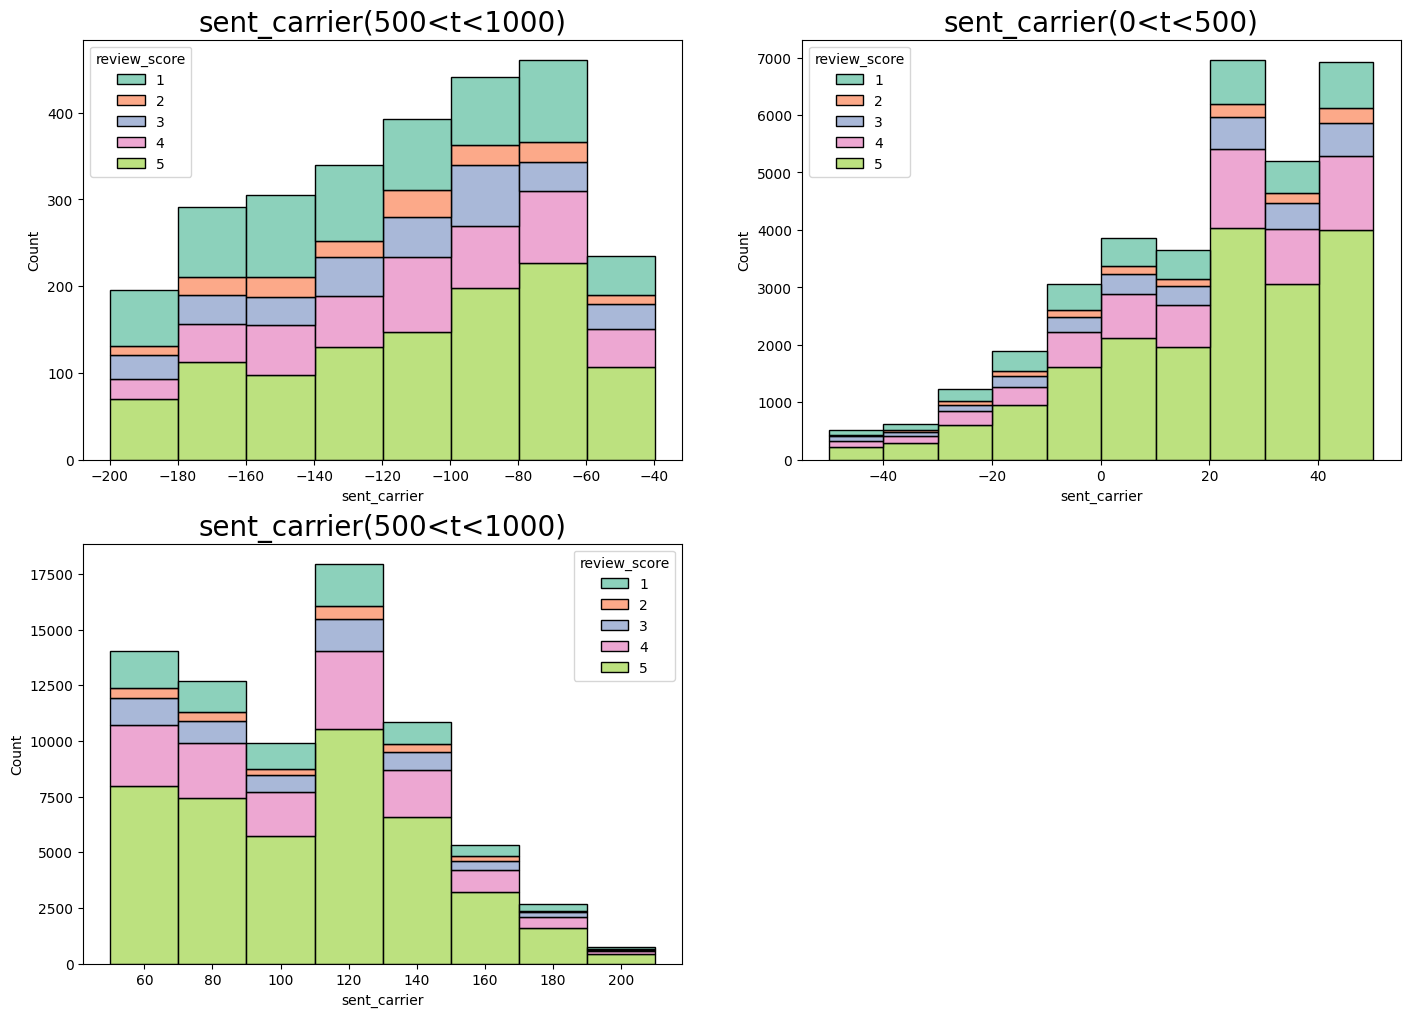

In [469]:
show = 'sent_carrier'
plt.figure(figsize=(17,12))

plt.subplot(221)
show2 = df.loc[(df[show]>-200)& (df[show]<-50)]
sns.histplot(data=show2,stat='count',multiple='stack',x=show2[show],hue=show2['review_score'],binwidth=20,palette="Set2")
plt.title(show+'(500<t<1000)',fontsize=20)

plt.subplot(222)
show3 = df.loc[(df[show]>-50)& (df[show]<50)]
sns.histplot(data=show3,stat='count',multiple='stack',x=show3[show],hue=show3['review_score'],binwidth=10,palette="Set2")
plt.title(show+'(0<t<500)',fontsize=20)

plt.subplot(223)
show4 = df.loc[(df[show]>50)& (df[show]<200)]
sns.histplot(data=show4,stat='count',multiple='stack',x=show4[show],hue=show4['review_score'],binwidth=20,palette="Set2")
plt.title(show+'(500<t<1000)',fontsize=20)
plt.show()

selanjutnya akan di drop nilai features yang tidak memiliki korelasi

In [470]:
df['price'].describe()

count    117273.000000
mean        120.543869
std         182.982061
min           0.850000
25%          39.900000
50%          74.900000
75%         134.900000
max        6735.000000
Name: price, dtype: float64

### Product Category

In [471]:
reviewscores = df.groupby('product_category_name_english')['review_score'].agg(['mean', 'count']).sort_values(by='mean',ascending=False)
# produk yang memiliki review score lebih dr 100 terbaik
terbaik = reviewscores[reviewscores['count']>=100][:10]
terbaik

,mean,count
product_category_name_english,,
books_general_interest,4.438503,561
costruction_tools_tools,4.415842,101
books_technical,4.375465,269
food_drink,4.324138,290
luggage_accessories,4.295945,1159
food,4.228963,511
fashion_shoes,4.223443,273
home_appliances_2,4.212687,268
pet_shop,4.199703,2018


In [472]:
# produk yang memiliki review score lebih dr 100 terburuk
terburuk = reviewscores[reviewscores["count"]>=100].sort_values(by='mean')[:10]
terburuk

,mean,count
product_category_name_english,,
office_furniture,3.527088,1772
fashion_male_clothing,3.548611,144
fixed_telephony,3.672862,269
audio,3.840849,377
furniture_bedroom,3.841270,126
construction_tools_safety,3.848485,198
bed_bath_table,3.892118,11837
furniture_decor,3.913746,8730
furniture_living_room,3.913793,522


In [473]:
produk_terlaku = df.groupby('product_category_name_english').agg({'order_id':'nunique','seller_id':'sum'}).sort_values('seller_id', ascending=True)[:10]
produk_terlaku

order_id  \
product_category_name_english                     
music                                        38   
dvds_blu_ray                                 58   
home_comfort_2                               23   
small_appliances                            624   
small_appliances_home_oven_and_coffee        75   
home_appliances                             761   
luggage_accessories                        1030   
tablets_printing_image                       77   
industry_commerce_and_business              233   
arts_and_craftmanship                        23   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

In [474]:
round(pd.crosstab(df['product_category_name_english'], df['review_score'], normalize='index') *100,2)[:12]

review_score,1,2,3,4,5
product_category_name_english,,,,,
agro_industry_and_commerce,10.71,2.78,5.56,22.62,58.33
air_conditioning,14.81,2.69,8.75,18.18,55.56
art,15.21,3.23,8.76,18.43,54.38
arts_and_craftmanship,12.50,0.00,12.50,12.50,62.50
audio,16.45,5.04,9.81,15.38,53.32
auto,11.76,3.49,7.67,20.76,56.33
baby,13.25,3.46,8.31,18.85,56.14
bed_bath_table,14.56,4.68,9.85,18.82,52.09
books_general_interest,7.31,1.43,3.74,15.15,72.37


Text(0.5, 1.0, 'Top 10 categories with the most requests')

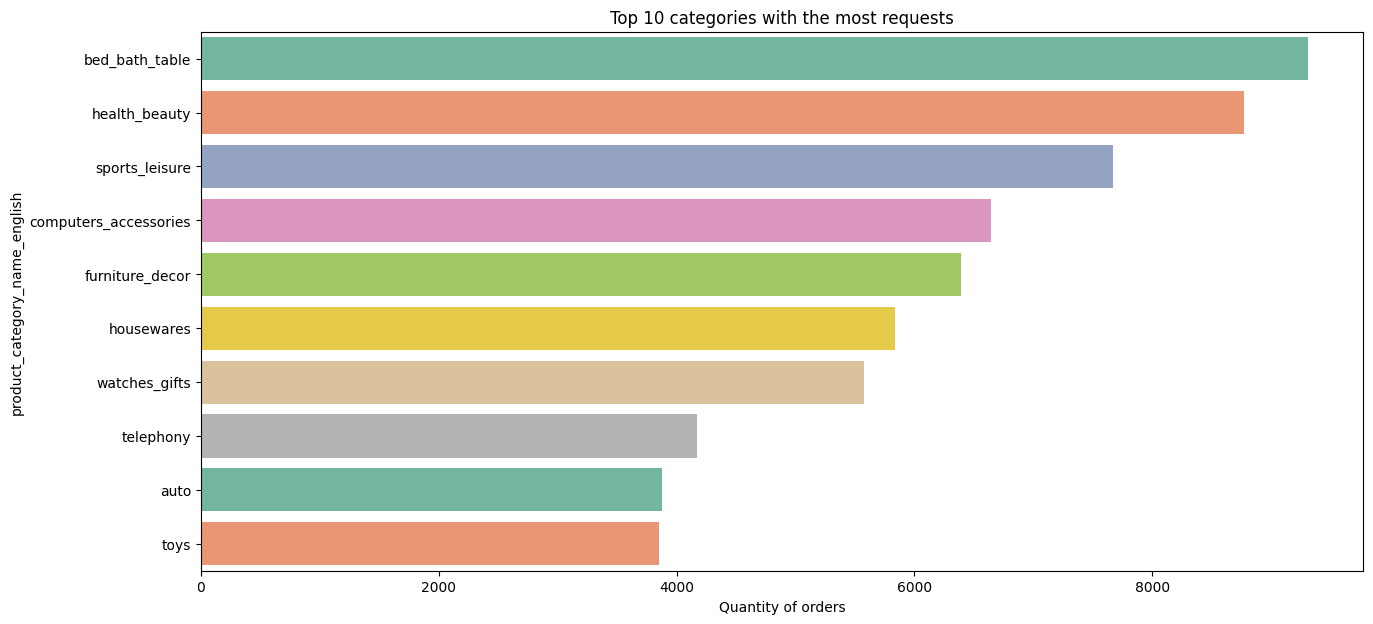

In [475]:
top_selling_products = df.groupby('product_category_name_english')['order_id'].nunique().sort_values(ascending=False).head(10)

plt.figure(figsize=(15,7))
sns.barplot(y=top_selling_products.index, x=top_selling_products, palette="Set2")
plt.xlabel('Quantity of orders')
plt.title('Top 10 categories with the most requests')

## Seller and Customer City

Text(0.5, 1.0, '10 kota pembelian terbanyak')

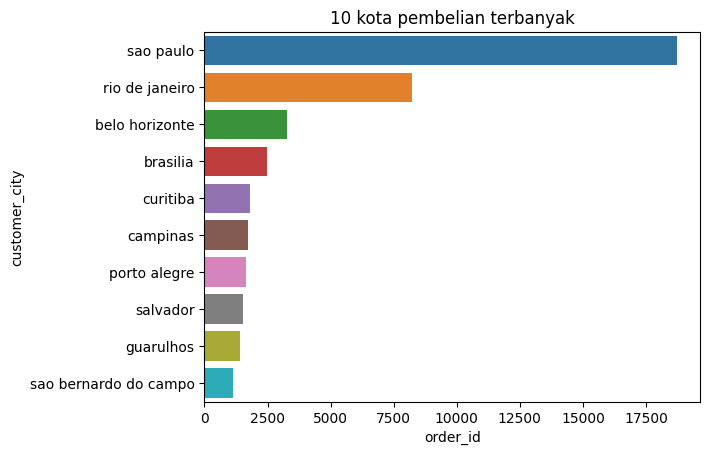

In [476]:
pembeli_terbanyak = df.groupby('customer_city')['order_id'].count().reset_index().sort_values('order_id', ascending=False)
ax = sns.barplot(x='order_id', y='customer_city', data=pembeli_terbanyak[:10])
ax.set_title('10 kota pembelian terbanyak')

In [477]:
round(pd.crosstab(df['customer_city'], df['review_score'], normalize='index') *100,2)[:12].T

customer_city,abadia dos dourados,abadiania,abaete,abaetetuba,abaiara,abaira,abare,abatia,abdon batista,abelardo luz,abrantes,abre campo
review_score,,,,,,,,,,,,
1,0.0,0.0,8.33,40.00,0.0,0.0,50.0,33.33,0.0,50.0,0.0,16.67
2,0.0,0.0,0.00,0.00,0.0,0.0,0.0,33.33,0.0,0.0,0.0,0.00
3,0.0,0.0,0.00,6.67,0.0,0.0,50.0,0.00,0.0,0.0,0.0,16.67
4,0.0,100.0,50.00,20.00,50.0,0.0,0.0,0.00,0.0,50.0,100.0,16.67
5,100.0,0.0,41.67,33.33,50.0,100.0,0.0,33.33,100.0,0.0,0.0,50.00


In [478]:
a=round(pd.crosstab(df['customer_city'], df['review_score'], normalize='index') *100,2).reset_index()
a
top_5 = a.sort_values(by=5,ascending=False).head()
top_1 = a.sort_values(by=1,ascending=False).head()
display("top customer city with rating of 5",top_5,"top customer city with rating of 1",top_1)

'top customer city with rating of 5'

review_score,customer_city,1,2,3,4,5
0,abadia dos dourados,0.0,0.0,0.0,0.0,100.0
3235,salobro,0.0,0.0,0.0,0.0,100.0
3244,salto grande,0.0,0.0,0.0,0.0,100.0
1312,fagundes,0.0,0.0,0.0,0.0,100.0
3251,sandolandia,0.0,0.0,0.0,0.0,100.0


'top customer city with rating of 1'

review_score,customer_city,1,2,3,4,5
640,caetanos,100.0,0.0,0.0,0.0,0.0
2220,marcelino vieira,100.0,0.0,0.0,0.0,0.0
252,arantina,100.0,0.0,0.0,0.0,0.0
938,chapadao do lageado,100.0,0.0,0.0,0.0,0.0
925,cerro negro,100.0,0.0,0.0,0.0,0.0


In [479]:
round(pd.crosstab(df['seller_city'], df['review_score'], normalize='index') *100,2)[:12].T

seller_city,04482255,abadia de goias,afonso claudio,aguas claras df,alambari,alfenas,almirante tamandare,alvares machado,alvorada,americana,amparo,ampere
review_score,,,,,,,,,,,,
1,0.0,0.0,0.00,100.0,20.0,14.93,100.0,0.00,14.29,8.26,14.04,0.00
2,0.0,0.0,0.00,0.0,0.0,4.48,0.0,16.67,0.00,0.92,1.75,0.00
3,100.0,0.0,0.00,0.0,0.0,5.97,0.0,16.67,0.00,5.50,6.14,6.25
4,0.0,0.0,66.67,0.0,20.0,22.39,0.0,16.67,42.86,13.76,29.82,12.50
5,0.0,100.0,33.33,0.0,60.0,52.24,0.0,50.00,42.86,71.56,48.25,81.25


In [480]:
a=round(pd.crosstab(df['seller_city'], df['review_score'], normalize='index') *100,2).reset_index()
a
top_5 = a.sort_values(by=5,ascending=False).head()
top_1 = a.sort_values(by=1,ascending=False).head()
display("top seller city with rating of 5",top_5,"top seller city with rating of 1",top_1)

'top seller city with rating of 5'

review_score,seller_city,1,2,3,4,5
256,itaporanga,0.0,0.0,0.0,0.0,100.0
42,avare,0.0,0.0,0.0,0.0,100.0
63,belo horizont,0.0,0.0,0.0,0.0,100.0
137,clementina,0.0,0.0,0.0,0.0,100.0
599,viana,0.0,0.0,0.0,0.0,100.0


'top seller city with rating of 1'

review_score,seller_city,1,2,3,4,5
164,divisa nova,100.0,0.0,0.0,0.0,0.0
320,marapoama,100.0,0.0,0.0,0.0,0.0
412,pirassununga,100.0,0.0,0.0,0.0,0.0
427,portoferreira,100.0,0.0,0.0,0.0,0.0
544,soledade,100.0,0.0,0.0,0.0,0.0


### Product Settings : photos, description and name

In [481]:
df[[ 'product_name_lenght','product_description_lenght','product_photos_qty']].describe()

,product_name_lenght,product_description_lenght,product_photos_qty
count,115579.000000,115579.000000,115579.000000
mean,48.767345,785.873723,2.205357
std,10.033717,652.379605,1.717697
min,5.000000,4.000000,1.000000
25%,42.000000,346.000000,1.000000
50%,52.000000,600.000000,1.000000
75%,57.000000,983.000000,3.000000
max,76.000000,3992.000000,20.000000


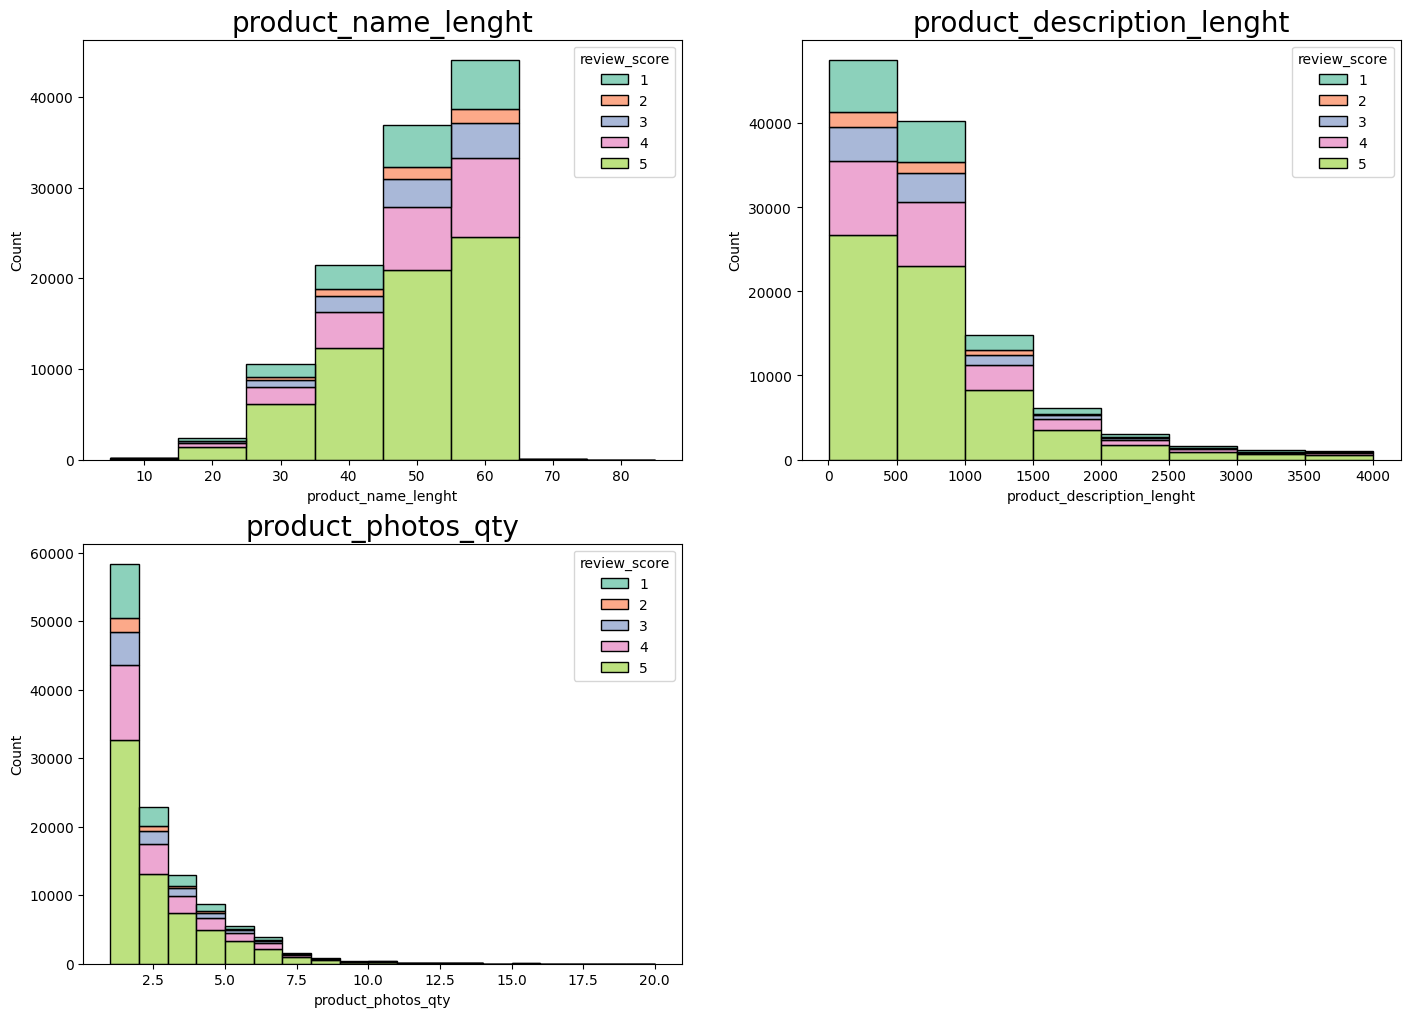

In [482]:
plt.figure(figsize=(17,12))

show = 'product_name_lenght'
plt.subplot(221)
show2 = df
sns.histplot(data=show2,stat='count',multiple='stack',x=show2[show],hue=show2['review_score'],binwidth=10,palette="Set2")
plt.title(show,fontsize=20)

show = 'product_description_lenght'
plt.subplot(222)
show3 = df
sns.histplot(data=show3,stat='count',multiple='stack',x=show3[show],hue=show3['review_score'],binwidth=500,palette="Set2")
plt.title(show,fontsize=20)

show = 'product_photos_qty'
plt.subplot(223)
show4 = df
sns.histplot(data=show4,stat='count',multiple='stack',x=show4[show],hue=show4['review_score'],binwidth=1,palette="Set2")
plt.title(show,fontsize=20)
plt.show()

### Data Preparation

In [483]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['Data Features', 'Data Type', 'Null Count', 'Null Count (%)', 'Unique', 'Unique Sample'],
                     data=listItem)
dfDesc

,Data Features,Data Type,Null Count,Null Count (%),Unique,Unique Sample
0,review_id,object,0,0.00,98388,"[f01aaa0150e499f0c268f8efc9d2182f, 00418c4b4e9a254383c09e057ad3966c]"
1,order_id,object,0,0.00,98650,"[2cbc30cc52609a954b2eda461da97579, 0382a97e1263d0013315090a6f4714f4]"
2,review_score,int64,0,0.00,5,"[4, 3]"
3,customer_id,object,0,0.00,98650,"[f3457b8fdac18622de498551383ae1cc, 0f88bc8d97cc7fa1ecf056675bba6bc9]"
4,order_status,object,0,0.00,8,"[processing, canceled]"
5,order_purchase_timestamp,datetime64[ns],0,0.00,98092,"[2017-12-10T11:45:13.000000000, 2018-08-15T17:47:48.000000000]"
6,order_approved_at,datetime64[ns],172,0.15,90059,"[2018-01-24T22:56:24.000000000, 2017-04-16T09:30:15.000000000]"
7,order_delivered_carrier_date,datetime64[ns],2048,1.73,80428,"[2017-11-20T18:54:58.000000000, 2017-10-17T13:48:22.000000000]"
8,order_delivered_customer_date,datetime64[ns],3285,2.78,94999,"[2018-02-07T23:57:36.000000000, 2018-05-05T14:23:19.000000000]"
9,order_estimated_delivery_date,datetime64[ns],0,0.00,459,"[2017-01-09T00:00:00.000000000, 2017-10-19T00:00:00.000000000]"


#### Handling Duplicate Data

In [484]:
df[df.duplicated()].count()

review_id                        0
order_id                         0
review_score                     0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
seller_city                      0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
customer_city       

In [485]:
df_no_duplicate = df.copy()
df_no_duplicate = df.drop_duplicates(subset=None, keep='first').reset_index(drop=True)

print(f'Data sebelum duplikat dihapus: {df.shape}')
print(f'Data setelah duplikat dihapus: {df_no_duplicate.shape}')

Data sebelum duplikat dihapus: (118087, 37)
Data setelah duplikat dihapus: (118087, 37)


In [486]:
df = df_no_duplicate.copy() 
df_no_duplicate[df_no_duplicate.duplicated()].count()

review_id                        0
order_id                         0
review_score                     0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
seller_city                      0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
customer_city       

#### Handling Missing Values

In [487]:
df[['order_status','order_purchase_timestamp','order_approved_at','order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date','approve_time','carrier_response','delivery_time','estimated_days']].loc[df['approve_time']>1000]

,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,approve_time,carrier_response,delivery_time,estimated_days
221,processing,2017-02-03 00:04:49,2017-04-04 10:56:48,NaT,NaT,2017-03-31,1450.866389,NaN,NaN,NaN
222,processing,2017-02-03 00:04:49,2017-04-04 10:56:48,NaT,NaT,2017-03-31,1450.866389,NaN,NaN,NaN
83333,unavailable,2016-10-05 18:06:48,2017-04-11 15:17:38,NaT,NaT,2016-11-17,4509.180556,NaN,NaN,NaN


In [488]:
df.isna().any(axis=1).sum()

4952

In [489]:
df.shape

(118087, 37)

In [490]:
df.isna().any(axis=1).sum()/df.shape[0]

0.04193518338174397

In [491]:
nullcount = df.isna().sum()
nullcountpct = round((df.isna().sum()/len(df[col])) * 100,2)
dfnull = pd.DataFrame({
    'Null Values':nullcount,
    'Percentage':nullcountpct}).reset_index()
dfnull.rename(columns={'index':'Data Features'}, inplace=True)
dfnull

,Data Features,Null Values,Percentage
0,review_id,0,0.00
1,order_id,0,0.00
2,review_score,0,0.00
3,customer_id,0,0.00
4,order_status,0,0.00
5,order_purchase_timestamp,0,0.00
6,order_approved_at,172,0.15
7,order_delivered_carrier_date,2048,1.73
8,order_delivered_customer_date,3285,2.78
9,order_estimated_delivery_date,0,0.00


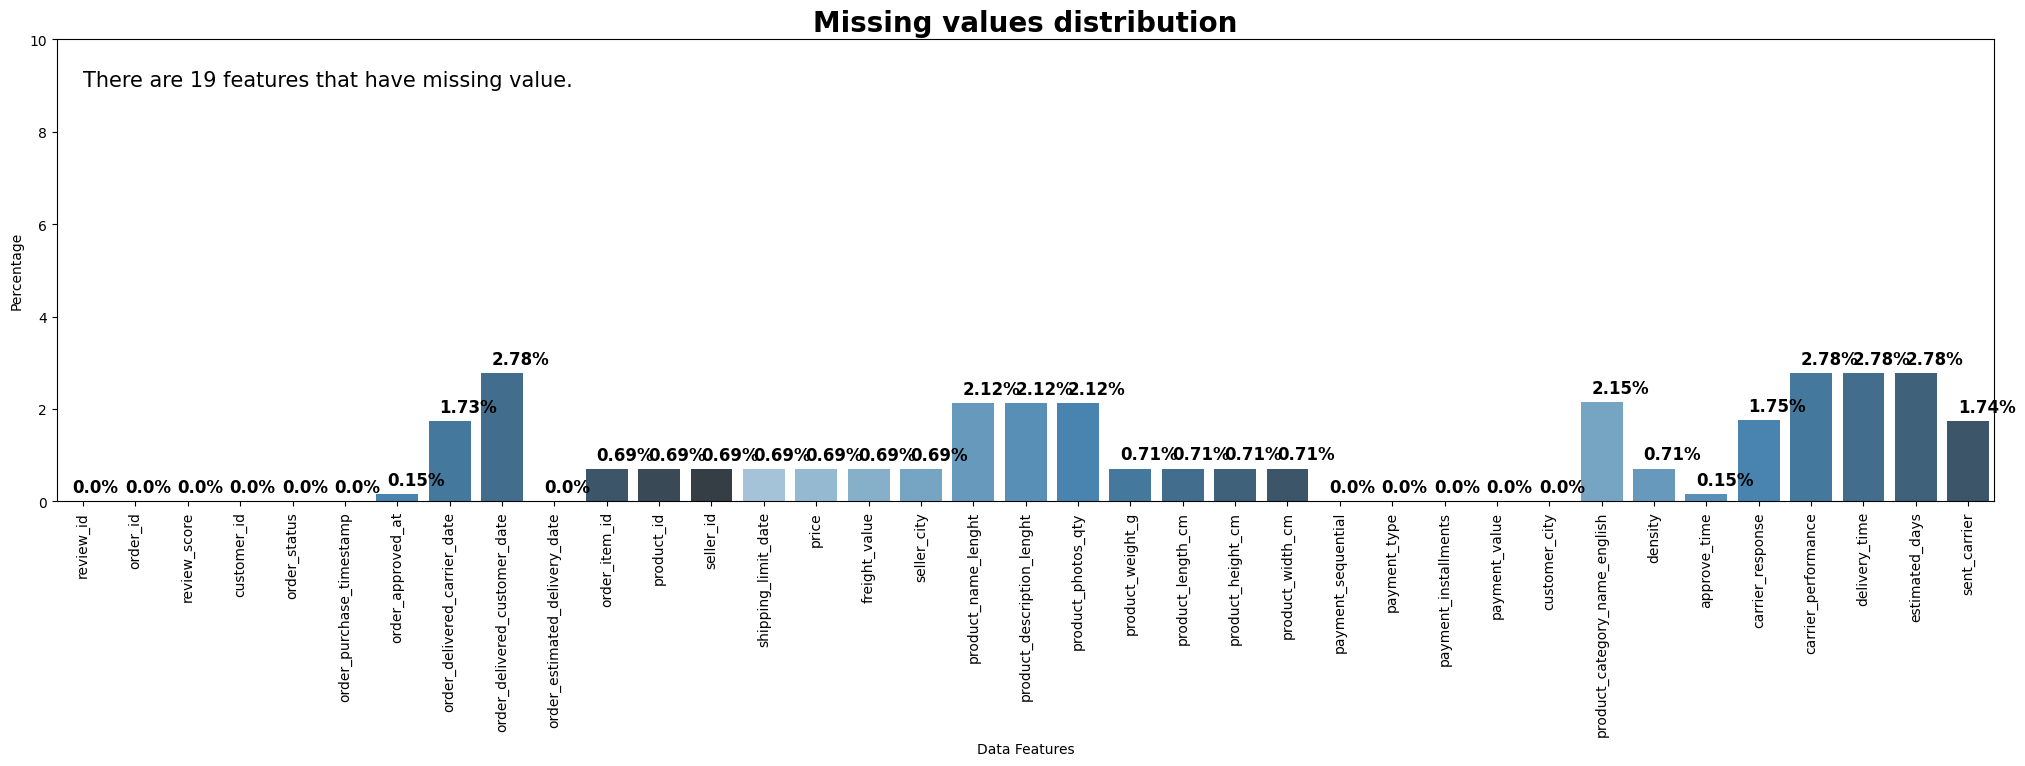

In [492]:
fig, ax = plt.subplots(figsize=(25,6))

g = sns.barplot(x = 'Data Features',y='Percentage',data=dfnull,ax=ax, 
               palette=sns.color_palette("Blues_d", n_colors=13, desat=1))

# percentage of missing values
x = np.arange(len(dfnull['Data Features']))
y = dfnull['Percentage']

for i, v in enumerate(y):
    ax.text(x[i]-0.2, v+0.2, str(v)+'%', fontsize = 12, color='black', fontweight='bold')
    
text = 'There are 19 features that have missing value.'

ax.text(0,9,text,horizontalalignment='left',color='black',fontsize=15, fontweight='normal')
ax.set_title('Missing values distribution', color='black', fontsize=20, fontweight='bold')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_ylim(0, 10)
plt.show()

In [493]:
df.dropna(inplace=True)

#### Handling Ouliers

In [494]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113135 entries, 0 to 118086
Data columns (total 37 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   review_id                      113135 non-null  object        
 1   order_id                       113135 non-null  object        
 2   review_score                   113135 non-null  int64         
 3   customer_id                    113135 non-null  object        
 4   order_status                   113135 non-null  object        
 5   order_purchase_timestamp       113135 non-null  datetime64[ns]
 6   order_approved_at              113135 non-null  datetime64[ns]
 7   order_delivered_carrier_date   113135 non-null  datetime64[ns]
 8   order_delivered_customer_date  113135 non-null  datetime64[ns]
 9   order_estimated_delivery_date  113135 non-null  datetime64[ns]
 10  order_item_id                  113135 non-null  float64       
 11  

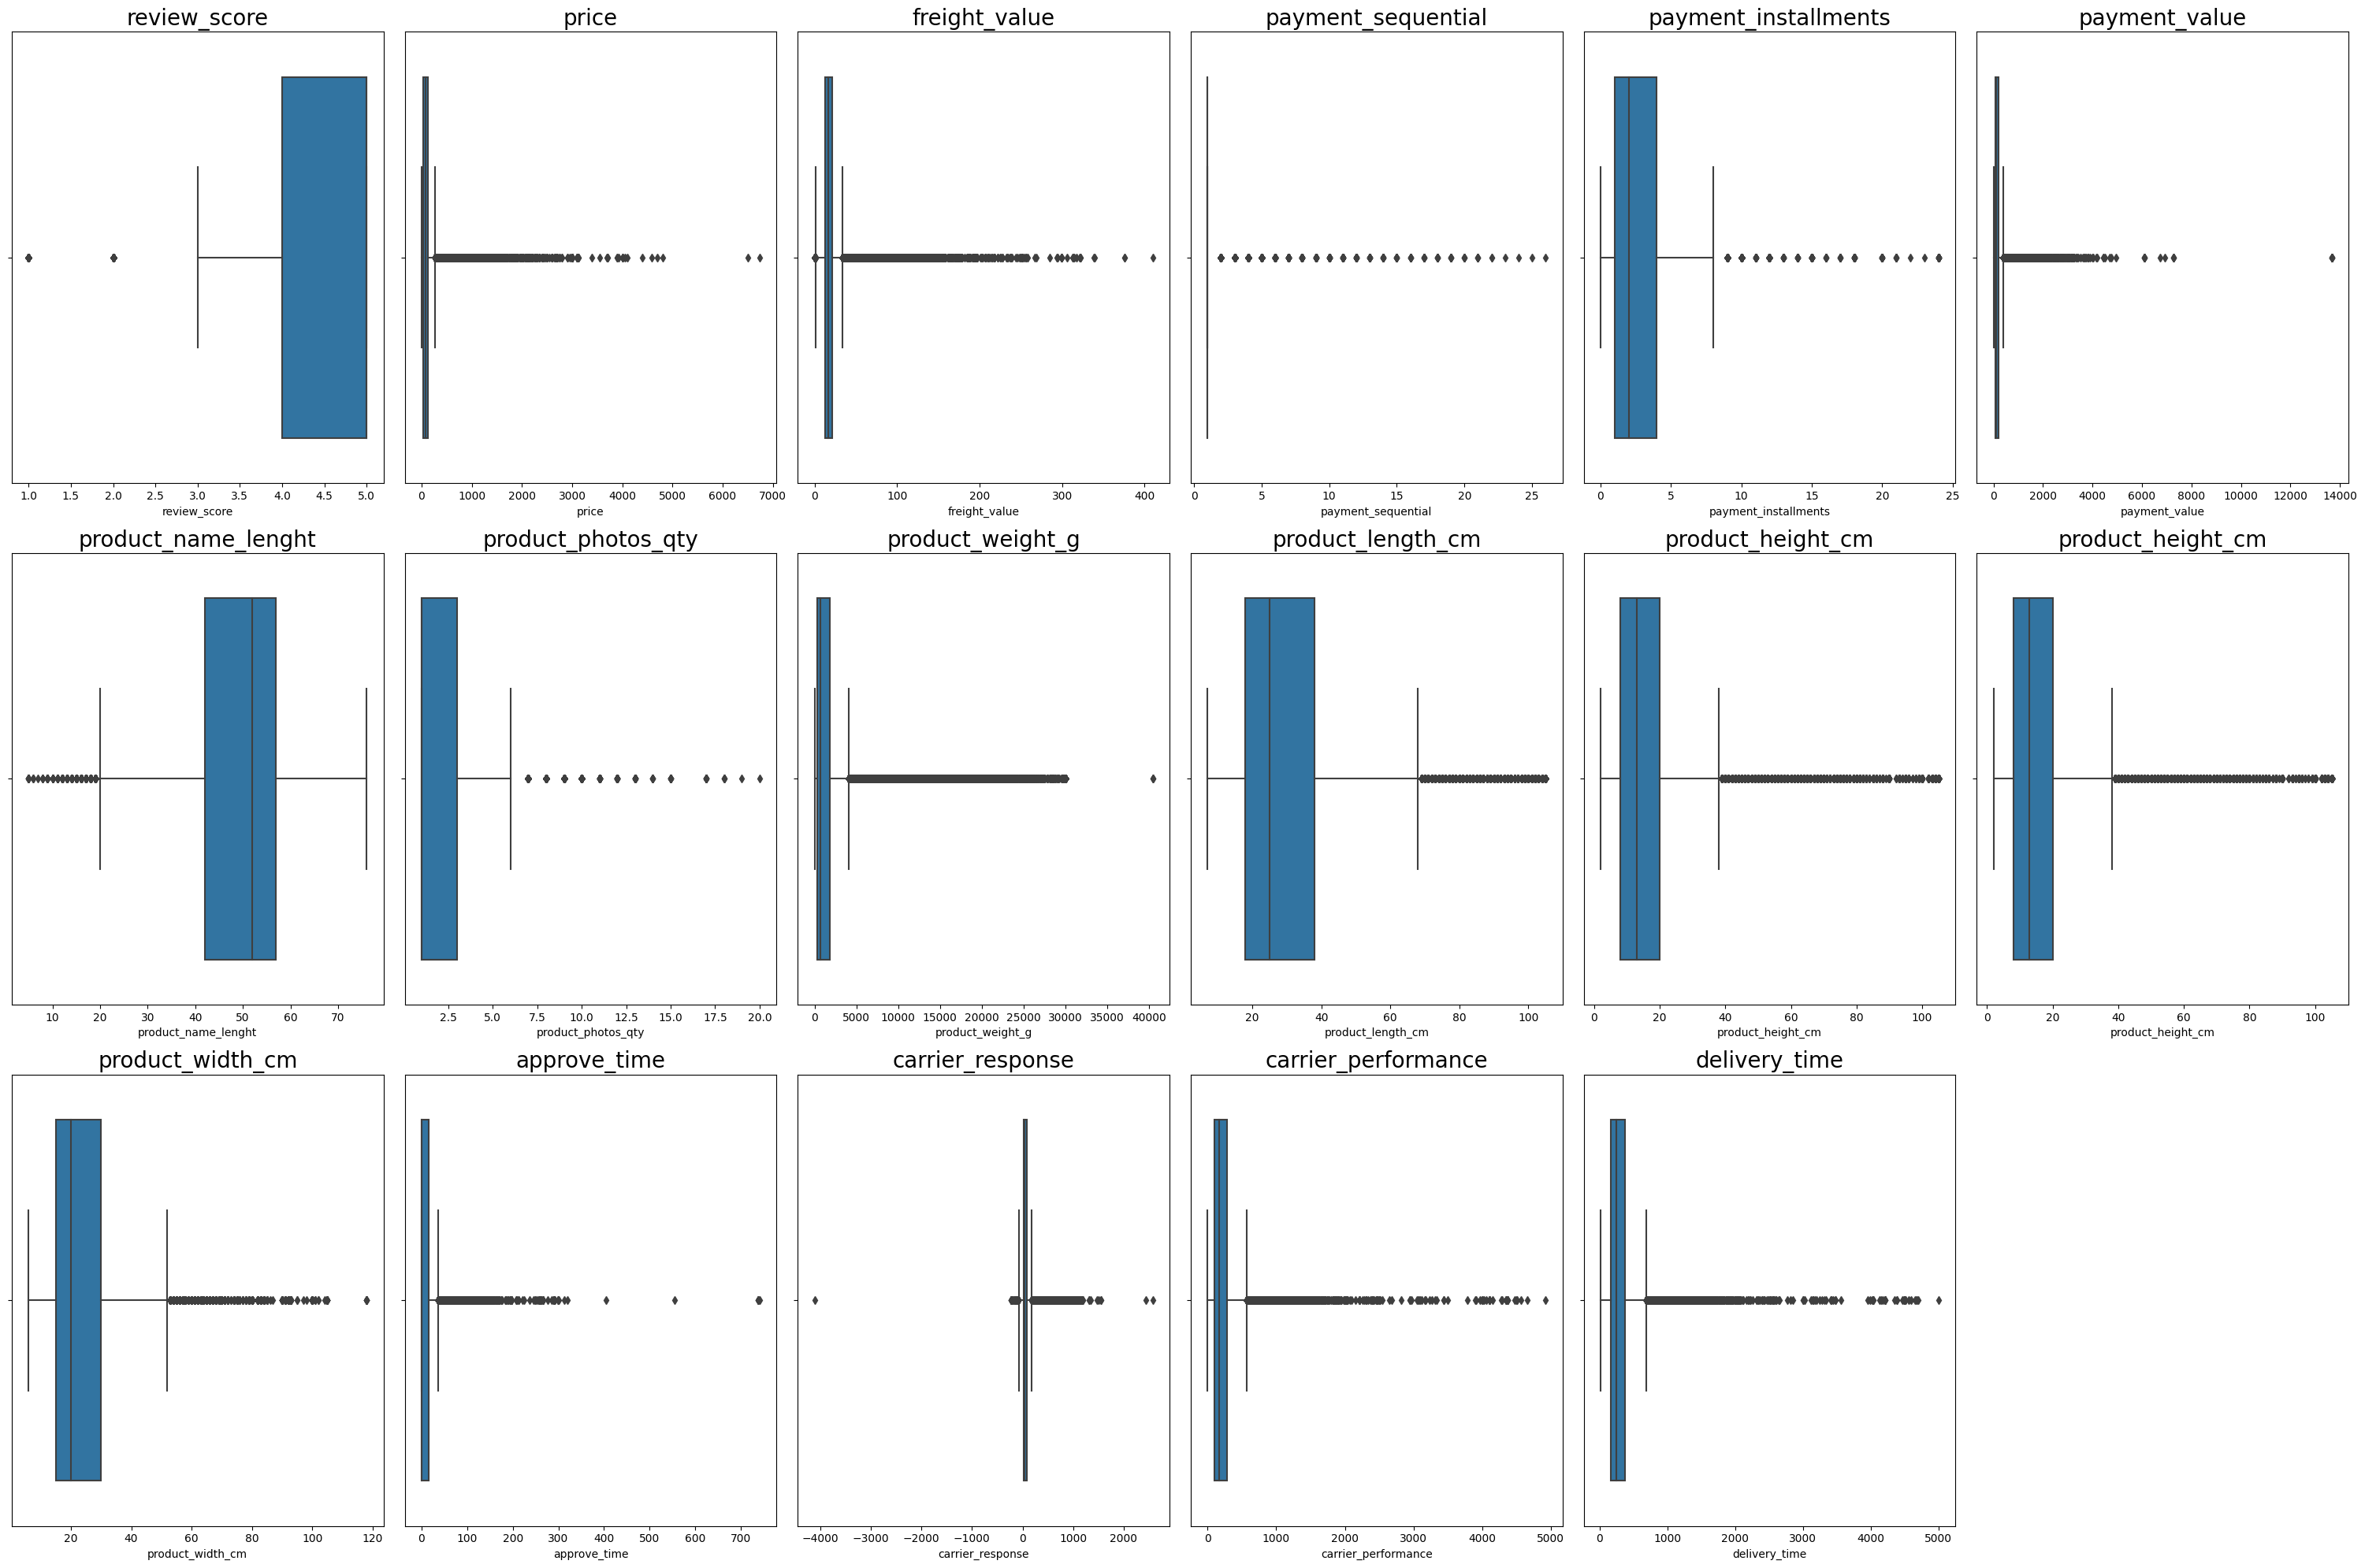

In [495]:
# Cek Outlier Menggunakan Boxplot
num = ['review_score','price','freight_value','payment_sequential','payment_installments','payment_value','product_name_lenght','product_photos_qty','product_weight_g',
       'product_length_cm','product_height_cm','product_height_cm','product_width_cm','approve_time','carrier_response','carrier_performance','delivery_time']

plt.figure(figsize=(30,20))
for i,column in enumerate(num):
  plot = sns.boxplot(x=df[column],ax=plt.subplot(3,6,i+1))
  plot.set_title(column,fontdict={'fontsize':20})
plt.tight_layout()
plt.show()
# num

In [496]:
outlier_col =['review_score', 'order_item_id', 'price', 'freight_value',
       'payment_sequential', 'payment_installments', 'payment_value',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'approve_time',
       'carrier_response', 'carrier_performance', 'delivery_time']

def outlier_handle(df, col):
    upper = []
    lower = []
    
    # IQR
    Q1 = df.describe()[col]['25%']
    Q3 = df.describe()[col]['75%']
    mini = df.describe()[col]['min']
    maxi = df.describe()[col]['max']
    IQR = Q3 - Q1
    upper_bound = Q3+1.5*IQR
    lower_bound = Q1-1.5*IQR

    print(f"Old Shape: {df.shape}")
    
    if maxi > upper_bound:
        upper = list(np.where(df[col] >= upper_bound)[0])
    else:
        upper_bound = maxi
        
    if mini < lower_bound:
        lower = list(np.where(df[col] <= lower_bound)[0])
    else:
        lower_bound = mini

    upper.extend(lower)
    df.drop(upper, inplace = True)

    print(f"New Shape: {df.shape}")
    print(f'Q1: {(Q1)}')
    print(f'Q3: {(Q3)}')
    print(f'IQR: {(IQR)}')
    print(f'Upper bound: {upper_bound}')
    print(f'Lower bound: {lower_bound}')
    
    print()
    return df.reset_index(drop=True)

df_outlier = df_no_duplicate.copy()
for i, col in enumerate(outlier_col):
    print(f'Column {col}::')
    df_outlier = outlier_handle(df_outlier, col)

Column review_score::
Old Shape: (118087, 37)
New Shape: (98528, 37)
Q1: 4.0
Q3: 5.0
IQR: 1.0
Upper bound: 5.0
Lower bound: 2.5

Column order_item_id::
Old Shape: (98528, 37)
New Shape: (166, 37)
Q1: 1.0
Q3: 1.0
IQR: 0.0
Upper bound: 1.0
Lower bound: 1.0

Column price::
Old Shape: (166, 37)
New Shape: (166, 37)
Q1: nan
Q3: nan
IQR: nan
Upper bound: nan
Lower bound: nan

Column freight_value::
Old Shape: (166, 37)
New Shape: (166, 37)
Q1: nan
Q3: nan
IQR: nan
Upper bound: nan
Lower bound: nan

Column payment_sequential::
Old Shape: (166, 37)
New Shape: (0, 37)
Q1: 1.0
Q3: 1.0
IQR: 0.0
Upper bound: 1.0
Lower bound: 1.0

Column payment_installments::
Old Shape: (0, 37)
New Shape: (0, 37)
Q1: nan
Q3: nan
IQR: nan
Upper bound: nan
Lower bound: nan

Column payment_value::
Old Shape: (0, 37)
New Shape: (0, 37)
Q1: nan
Q3: nan
IQR: nan
Upper bound: nan
Lower bound: nan

Column product_name_lenght::
Old Shape: (0, 37)
New Shape: (0, 37)
Q1: nan
Q3: nan
IQR: nan
Upper bound: nan
Lower bound: nan

In [497]:
print(f'Dataframe after duplicate handle shape: {df_no_duplicate.shape}')
print(f'Dataframe after duplicate, without outlier shape: {df_outlier.shape}')

Dataframe after duplicate handle shape: (118087, 37)
Dataframe after duplicate, without outlier shape: (0, 37)


#### Features Predictor

C:\Users\X1\AppData\Local\Temp\ipykernel_11140\2438148438.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df.corr(method='pearson')


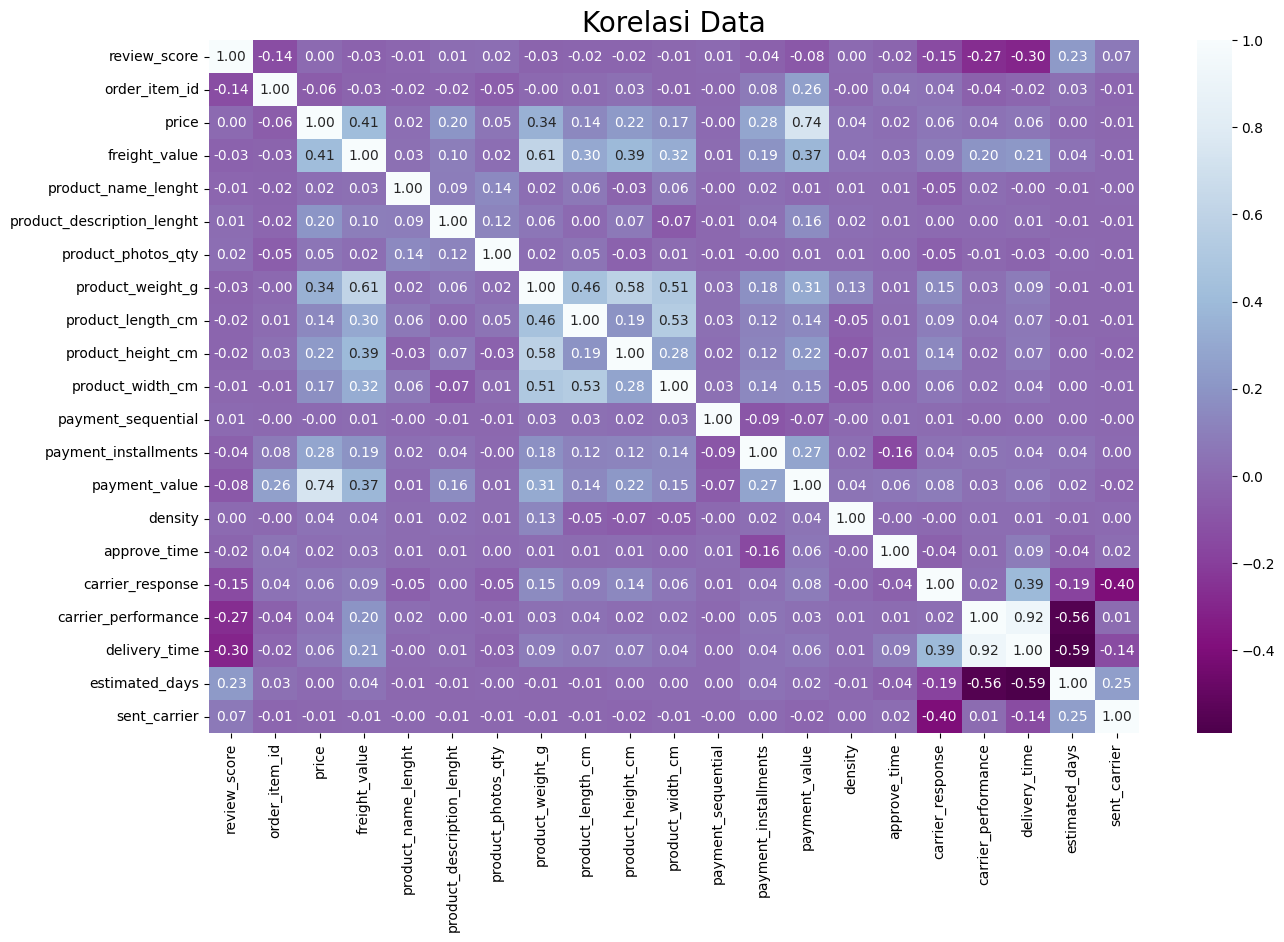

In [498]:
# Melihat korelasi dataset
df_corr = df.corr(method='pearson')
plt.figure(figsize=(15,9))
sns.heatmap(data=df_corr, annot=True, fmt='.2f',cmap='BuPu_r')
plt.title('Korelasi Data', fontsize=20)
plt.show()

Sebelum memasuki Modeling, terdapat beberapa dataset id yang tidak berpengaruh dalam modelling dan akan menjadi noise, yaitu review_id, order_id, order_item_id, product_id dan seller_id.

Model yang digunakan untuk memprediksi, tidak memerlukan id tersebut karena fungsi pada feature tersebut adalah sebagai key feature yang menggabungkan dataset yang sudah ada sebelumnya. Selain itu, dalam proses modeling, feature ini dapat menjadi noise dalam modeling. Sehingga dalam proses modeling, feature tersebut dihapuskan

## Data Cleaning

terdapat begitu banyak data yang diperleh dari dataset olist, namun terdapat beberapa variabel yang tumpang tindih dan tidak signifikan terhadap proses analisis. lebih lanjut dilakukan pemilihan variabel berdasarkan literatur

1. Dataset cust, memiliki beberapa variabel yang menunjukan detail informasi kay feature (customer_id), uniqe identifier(customer_unique_id) dan tempat pengiriman barang ditujukan kepada customer (customer_zip_code_prefix, customer_city dan customer_state). 
  * identifikasi customer dilakukan memalui customer_id sehingga uniqe identifier tidak digunakan. 
  * untuk mengidentifikasi lokasi customer, 

delivery, payment : 
https://ojs.unud.ac.id/index.php/lontar/article/download/16727/11007
"Delivery time refers to the time required to deliver a product or service from provider to user. E-commerce is designed to reduce the delivery time."
"Time spent refers to the time required by user to accomplish certain functionality through an e-commerce. A number of metrics that are commonly used to measure time spent are order time, processing time, queuing time, and payment time could reduced considerably"

detailed information including description, photos qty, feedback : 
https://www.researchgate.net/publication/318676139_A_study_on_parameters_of_online_reviews_content_that_influence_consumers_buying_behaviour-_an_Indian_perspective
"Making detailed information about products available and easily acessible"
"Companies must demonstrate their reactiveness to receive feedback and reply for queries"

In [499]:
df.drop(['product_weight_g','product_length_cm','product_height_cm','product_width_cm','density'],axis=1,inplace=True)

df.drop(['payment_value','payment_installments','payment_type','payment_sequential'],axis=1,inplace=True)

df.drop(['approve_time'],axis=1,inplace=True)

df.drop(['review_id','order_id','customer_id','order_item_id','product_id','seller_id'],axis=1,inplace=True)

df.drop(['order_purchase_timestamp','order_approved_at', 'order_delivered_carrier_date','order_delivered_customer_date',
 'order_estimated_delivery_date','shipping_limit_date'],axis=1,inplace=True)

In [500]:
df.columns

Index(['review_score', 'order_status', 'price', 'freight_value', 'seller_city',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'customer_city', 'product_category_name_english',
       'carrier_response', 'carrier_performance', 'delivery_time',
       'estimated_days', 'sent_carrier'],
      dtype='object')

In [501]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113135 entries, 0 to 118086
Data columns (total 15 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   review_score                   113135 non-null  int64  
 1   order_status                   113135 non-null  object 
 2   price                          113135 non-null  float64
 3   freight_value                  113135 non-null  float64
 4   seller_city                    113135 non-null  object 
 5   product_name_lenght            113135 non-null  float64
 6   product_description_lenght     113135 non-null  float64
 7   product_photos_qty             113135 non-null  float64
 8   customer_city                  113135 non-null  object 
 9   product_category_name_english  113135 non-null  object 
 10  carrier_response               113135 non-null  float64
 11  carrier_performance            113135 non-null  float64
 12  delivery_time                 

In [502]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['Data Features', 'Data Type', 'Null Count', 'Null Count (%)', 'Unique', 'Unique Sample'],
                     data=listItem)
dfDesc

,Data Features,Data Type,Null Count,Null Count (%),Unique,Unique Sample
0,review_score,int64,0,0.0,5,"[4, 1]"
1,order_status,object,0,0.0,2,"[delivered, canceled]"
2,price,float64,0,0.0,5773,"[289.9, 179.75]"
3,freight_value,float64,0,0.0,6872,"[9.7, 90.0]"
4,seller_city,object,0,0.0,587,"[paraiso do sul, carazinho]"
5,product_name_lenght,float64,0,0.0,65,"[11.0, 14.0]"
6,product_description_lenght,float64,0,0.0,2942,"[2339.0, 2007.0]"
7,product_photos_qty,float64,0,0.0,19,"[19.0, 17.0]"
8,customer_city,object,0,0.0,4071,"[dias d avila, mineiros do tiete]"
9,product_category_name_english,object,0,0.0,71,"[security_and_services, agro_industry_and_commerce]"


# MODELING : SCORE 5

modeling pertama dilakukan secara klasifikasi dengan menjadikan nilai review_score 5 sebagai target (1) sementara nilai review_score 1 sampai dengan 4 adalah 0. prediction ini dilakukan karena sebagai seorang seller, pastinya ingin memperoleh nilai review_score sempurna, yaitu 5

In [503]:
df.columns

Index(['review_score', 'order_status', 'price', 'freight_value', 'seller_city',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'customer_city', 'product_category_name_english',
       'carrier_response', 'carrier_performance', 'delivery_time',
       'estimated_days', 'sent_carrier'],
      dtype='object')

In [505]:
df1=df.copy(deep=True)

In [403]:
df1['review_5'] = np.where(df1['review_score'] < 5, 0, 1)

In [404]:
df.columns

Index(['review_score', 'order_status', 'price', 'freight_value', 'seller_city',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'customer_city', 'product_category_name_english',
       'carrier_response', 'carrier_performance', 'delivery_time',
       'estimated_days', 'sent_carrier'],
      dtype='object')

In [190]:
df1['review_5'] = np.where(df1['review_score'] < 5, 0, 1)
df1.drop(['review_score'], axis=1,inplace=True)

'jumlah data 0 sebanyak 48003 memiliki proporsi 42.42984045609228 %'

'jumlah data 1 sebanyak 65132 memiliki proporsi 57.57015954390772 %'

<Axes: xlabel='review_5', ylabel='count'>

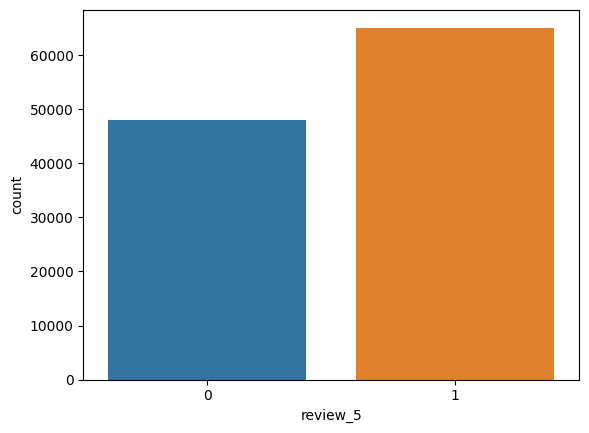

In [191]:
a=df1.loc[df1['review_5']==0].shape[0]
b=df1.loc[df1['review_5']==1].shape[0]
c=df1.shape[0]

display('jumlah data 0 sebanyak {} memiliki proporsi {} %'.format(a,a/c*100),
'jumlah data 1 sebanyak {} memiliki proporsi {} %'.format(b,b/c*100),
    sns.countplot(x=df1['review_5']))

data diperoleh balanced, sehingga tidak diperlukan untuk melakukan balancing pada data

## Encoding

Encoding dilakukan pada data yang bersifat kategorikal sehingga menjadi bersifat numerikal sehingga bisa digunakan untuk modeling. dalam proses ini digunakan ColumnTransformer untuk dapat mengubah datanya sehingga dapat kita aplikasikan pada model pipeline

1. order_status menggunakan OneHotEncoder karena terdiri dari 2 variabel yaitu canceled dan delivered
1. payment_type menggunakan OneHot Encoder karena tidak terdapat urutan data dan unique data yang dimiliki hanya 4
1. customer_city menggunakan BinaryEncoder karena jumlah data yang banyak dan tidak memiliki urutan strata
1. seller_city menggunakan BinaryEncoder karena jumlah data yang banyak dan tidak memiliki urutan strata
1. product_category_name_english menggunakan BinaryEncoder karena jumlah data yang banyak dan tidak memiliki urutan strata
1. estimated_late menggunakan OneHotEncoder karena merupakan boolean True/False

In [192]:
OneHot_Encoder = OneHotEncoder(drop='first',handle_unknown='ignore')
Binary_Encoder = ce.BinaryEncoder()

## Scaling

karena terdapat outlier pada keselutuhan data, maka dilakukan scaling dengan Robust scaler

In [193]:
scaler = RobustScaler()

In [194]:
transformer = ColumnTransformer([
    ('onehot', OneHot_Encoder, ['order_status']),
    ('binary', Binary_Encoder, ['customer_city','seller_city','product_category_name_english']),
    ('Scaling',scaler,['price','freight_value','product_name_lenght','product_description_lenght','product_photos_qty',
    'carrier_response','carrier_performance','delivery_time','estimated_days','sent_carrier'])
], remainder='passthrough')

## Scoring

dan untuk menentukan nilai scoring, dilakukan analisis berikut
* Type 1 error : False Positive (setting tidak menghasilkan nilai 5 tetapi diprediksi menghasilkan nilai 5) Konsekuensi: Customer complaint
* Type 2 error : False Negative (setting menghasilkan nilai 5 tetapi diprediksi tidak menghasilkan nilai 5) Konsekuensi: pengaturan ulang


Type 1 memiliki kepentingan lebih tinggi karena ketika diprediksi menghasilkan review baik (5) sedangkan realisasinya tidak, customer akan mengalami kerugian nilai review, sedangkan untuk Type 2, Customer dapat melakukan setting ulang sehingga bisa mendapatkan prediksi review baik (5)

In [195]:
model_score = 'f1'

## Data Splitting

In [196]:
features = df1.drop(['review_5'], axis=1)
label = df1['review_5']

In [197]:
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.3,random_state=42, stratify=label)

## Model Benchmark : Train Data

In [198]:
# Define algoritma yang digunakan
logreg = LogisticRegression(random_state=0)
knn = KNeighborsClassifier()
tree = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=0)
ada = AdaBoostClassifier(random_state=0)
grad = GradientBoostingClassifier(random_state=0)
cat = CatBoostClassifier(verbose=False,random_state=0)
xgb = XGBClassifier(random_state=0)
lgbm = LGBMClassifier(random_state=0)

In [199]:
models = [logreg,knn,tree,rf,ada,grad,cat,xgb,lgbm]

score_model_train=[]
rata_model_train=[]
std_model_train=[]

for i in models:
    skfold=StratifiedKFold(n_splits=5)
    estimator=Pipeline([
        ('preprocess',transformer),
        ('model',i)])
    model_cv=cross_val_score(estimator,X_train,y_train,cv=skfold,scoring=model_score)
    score_model_train.append(model_cv)
    rata_model_train.append(model_cv.mean())
    std_model_train.append(model_cv.std())
    
pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest','AdaBoost','GradienBoost', 'CatBoost', 'XGBoost', 'LightGBM'],
    'mean_f1':rata_model_train,'sdev':std_model_train}).set_index('model')

c:\Users\X1\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\X1\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

,mean_f1,sdev
model,,
Logistic Regression,0.726367,0.001277
KNN,0.678268,0.002595
Decision Tree,0.667217,0.002862
Random Forest,0.766057,0.001062
AdaBoost,0.735671,0.002094
GradienBoost,0.739718,0.001474
CatBoost,0.743007,0.001926
XGBoost,0.736484,0.001379
LightGBM,0.742497,0.001840


model dengan score terbaik diperoleh model Random Forrest dengan nilai 0.766 dengan standar deviasi yang cukup kecil, di nilai 0.001062. untuk memperoleh nilai konsisten, model di test dengan data test yang sudah di pisahkan sebelumnya 

## Model Benchmark : Test Data

In [200]:
score_model_test = []

def y_pred_func(i):
    estimator=Pipeline([
        ('preprocess',transformer),
        ('model',i)])
    X_train,X_test
    
    estimator.fit(X_train,y_train)
    return(estimator,estimator.predict(X_test),X_test)

for i,j in zip(models, ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest','AdaBoost','GradienBoost', 'CatBoost', 'XGBoost', 'LightGBM']):
    estimator,y_pred,X_test = y_pred_func(i)
    estimator.fit(X_train,y_train)
    y_pred_test = estimator.predict(X_test)
    score_model_test.append(f1_score(y_test,y_pred_test))
    
pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest','AdaBoost','GradienBoost', 'CatBoost', 'XGBoost', 'LightGBM'],
             'f1_score_Train':rata_model_train,'f1_score_Test':score_model_test}).set_index('model')

c:\Users\X1\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\X1\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

,f1_score_Train,f1_score_Test
model,,
Logistic Regression,0.726367,0.727491
KNN,0.678268,0.684913
Decision Tree,0.667217,0.679603
Random Forest,0.766057,0.777048
AdaBoost,0.735671,0.735147
GradienBoost,0.739718,0.739478
CatBoost,0.743007,0.744536
XGBoost,0.736484,0.740160
LightGBM,0.742497,0.743574


terlihat bahwa nilai random forrest cukup stabil diperoleh saat training dan juga saat testing, dengan nilai training 0.766 dan nilai test 0.777. secara keseluruhan, score random forrest memiliki nilai paling tinggi dan cukup konsisten sehingga selanjutnya dilakukan parameter tunning untuk memperoleh nilai paling baik dari Random Forrest

## Parameter Tunning for Random Forest

pertama dilakukan parameter tunning untuk criterion dan juga max_features, menurut [artikel](https://machinelearningmastery.com/hyperparameters-for-classification-machine-learning-algorithms/) , pada Random Forrest terdapat parameter yang memiliki dampak yang lebih signifikan, yaitu nilai criterion, max_features, dan juga n_estimator.

selanjutnya dipelajar dampak dari masing masing feature terhadap hasil modeling pada model Random Forrest

In [201]:
criterion = ["gini", "entropy", "log_loss"]
max_features = ["sqrt", "log2", None]

In [202]:
cv_scores_criterion = []
cv_scores_max_features = []

for k in criterion:
    rf = RandomForestClassifier(random_state=0,criterion=k)
    skfold=StratifiedKFold(n_splits=5)
    estimator=Pipeline([
    ('preprocess',transformer),
    ('model',rf)])
    model_cv=cross_val_score(estimator,X_train,y_train,cv=skfold,scoring=model_score)
    cv_scores_criterion.append(model_cv.mean())

for k in max_features:
    rf = RandomForestClassifier(random_state=0,max_features=k)
    skfold=StratifiedKFold(n_splits=5)
    estimator=Pipeline([
    ('preprocess',transformer),
    ('model',rf)])
    model_cv=cross_val_score(estimator,X_train,y_train,cv=skfold,scoring=model_score)
    cv_scores_max_features.append(model_cv.mean())

In [203]:
criterion_kesimpulan = pd.DataFrame(data = {
    'criterion_value' : criterion,
    'criterion_score' : cv_scores_criterion
})
max_features_kesimpulan = pd.DataFrame(data = {
    'max_features_value' : max_features,
    'max_features_score' : cv_scores_max_features
})

display(criterion_kesimpulan,max_features_kesimpulan)

,criterion_value,criterion_score
0,gini,0.766057
1,entropy,0.766572
2,log_loss,0.766572


,max_features_value,max_features_score
0,sqrt,0.766057
1,log2,0.766294
2,None,0.759298


setelah dilakukan modeling dengan perubahan parameter criterion dan juga max_features, diperoleh hasil sebagai berikut
1. nilai citerion tidak berdapak terlalu signifikan terhadap model yang kita coba, terlihat nilai score konstan di 0.766 pada setiap parameter. criterion tidak akan dimasukan pada hypermeter tunning keseluruhan feature
2. nilai max_features berdampak cukup signifkan terhadap model, terlihat bahwa nilai None pada parameter max_features memberikan nilai terendah pada model. Max_features akan dimasukan pada hypermeter tunning keseluruhan feature

In [205]:
n_estimators = range(50,150,25)

cv_scores_n_estimators = []
n_estimators_value = []

for k in n_estimators:
    rf = RandomForestClassifier(random_state=0,n_estimators=k)
    skfold=StratifiedKFold(n_splits=5)
    estimator=Pipeline([
    ('preprocess',transformer),
    ('model',rf)])
    model_cv=cross_val_score(estimator,X_train,y_train,cv=skfold,scoring=model_score)
    cv_scores_n_estimators.append(model_cv.mean())
    n_estimators_value.append(k)
print (cv_scores_n_estimators,n_estimators_value)

[0.7568486532579721, 0.765917025147468, 0.7660572935514284, 0.7699488900780068] [50, 75, 100, 125]


In [206]:
n_estimators = range(150,250,25)

for k in n_estimators:
    rf = RandomForestClassifier(random_state=0,n_estimators=k)
    skfold=StratifiedKFold(n_splits=5)
    estimator=Pipeline([
    ('preprocess',transformer),
    ('model',rf)])
    model_cv=cross_val_score(estimator,X_train,y_train,cv=skfold,scoring=model_score)
    cv_scores_n_estimators.append(model_cv.mean())
    n_estimators_value.append(k)
print (cv_scores_n_estimators,n_estimators_value)

[0.7568486532579721, 0.765917025147468, 0.7660572935514284, 0.7699488900780068, 0.7700227102509061, 0.7714215702460513, 0.7715495577757712, 0.773426847594747] [50, 75, 100, 125, 150, 175, 200, 225]


In [207]:
n_estimators = range(250,350,50)

for k in n_estimators:
    rf = RandomForestClassifier(random_state=0,n_estimators=k)
    skfold=StratifiedKFold(n_splits=5)
    estimator=Pipeline([
    ('preprocess',transformer),
    ('model',rf)])
    model_cv=cross_val_score(estimator,X_train,y_train,cv=skfold,scoring=model_score)
    cv_scores_n_estimators.append(model_cv.mean())
    n_estimators_value.append(k)
print(cv_scores_n_estimators,n_estimators_value)

[0.7568486532579721, 0.765917025147468, 0.7660572935514284, 0.7699488900780068, 0.7700227102509061, 0.7714215702460513, 0.7715495577757712, 0.773426847594747, 0.772897088173789, 0.772936890162773] [50, 75, 100, 125, 150, 175, 200, 225, 250, 300]


In [208]:
n_estimators = range(350,650,100)

for k in n_estimators:
    rf = RandomForestClassifier(random_state=0,n_estimators=k)
    skfold=StratifiedKFold(n_splits=5)
    estimator=Pipeline([
    ('preprocess',transformer),
    ('model',rf)])
    model_cv=cross_val_score(estimator,X_train,y_train,cv=skfold,scoring=model_score)
    cv_scores_n_estimators.append(model_cv.mean())
    n_estimators_value.append(k)
print(cv_scores_n_estimators,n_estimators_value)

[0.7568486532579721, 0.765917025147468, 0.7660572935514284, 0.7699488900780068, 0.7700227102509061, 0.7714215702460513, 0.7715495577757712, 0.773426847594747, 0.772897088173789, 0.772936890162773, 0.7736307009340775, 0.7742451404252122, 0.774048584440554] [50, 75, 100, 125, 150, 175, 200, 225, 250, 300, 350, 450, 550]


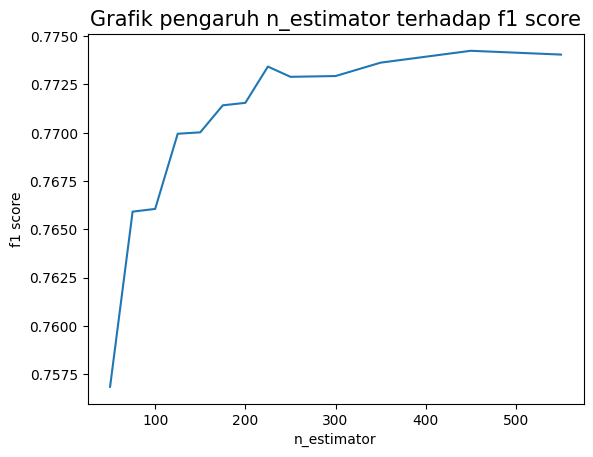

In [210]:
n_estimators_graph={
    'value' : cv_scores_n_estimators,
    'n_estimator' :  n_estimators_value
}
n_estimators_graph=pd.DataFrame(n_estimators_graph)
sns.lineplot(data=n_estimators_graph, x=n_estimators_graph['n_estimator'],y=n_estimators_graph['value'])
n_estimators_graph.transpose()
plt.title('Grafik pengaruh n_estimator terhadap f1 score', fontsize = 15)
plt.xlabel('n_estimator', fontsize = 10)
plt.ylabel('f1 score', fontsize = 10)
plt.show()

terlihat bahwa nilai dari n_estimator memliki nilai yang sangat signifikan terhadap keseluruhan model, n_estimator diatas 200 memiliki waktu yang semakin lama untuk dilakukan running, pada kasus ini, bisa hingga 20 menit sehingga nilai n_estimator diambil pada range 75-200.

#### Parameter Tunning with GridSearch

In [211]:
rf = RandomForestClassifier(random_state=0)

skfold=StratifiedKFold(n_splits=3)

estimator=Pipeline([
        ('preprocess',transformer),
        ('model',rf)])

In [212]:
param_rf = [{
    # 'model__criterion': ["gini", "entropy", "log_loss"],
    'model__max_features' :["sqrt", "log2", None],
    'model__n_estimators' : range(75,201,50)
}]

In [213]:
grid = GridSearchCV(estimator, n_jobs=-1, param_grid=param_rf, scoring=model_score, cv=skfold,error_score='raise')

In [214]:
grid.fit(X_train,y_train)
print(grid.best_score_)
print(grid.best_params_)

0.7660604538017255
{'model__max_features': 'log2', 'model__n_estimators': 175}


In [215]:
best_model = grid.best_estimator_
best_model.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['order_status']),
                                                 ('binary', BinaryEncoder(),
                                                  ['customer_city',
                                                   'seller_city',
                                                   'product_category_name_english']),
                                                 ('Scaling', RobustScaler(),
                                                  ['price', 'freight_value',
                                                   'product_name_lenght',
                                                   'product_description_lenght',
                                                   'product_photos_qty',
                                                   'carrier_response',
                                                   'carrier_performance',
                                                   'delivery_time',
                                                   'estimated_days',
                                                   'sent_carrier'])])),
                ('model',
                 RandomForestClassifier(max_features='log2', n_estimators=175,
                                        random_state=0))])

In [216]:
estimator=pipeline.Pipeline([
        ('preprocess',transformer),
        ('model',rf)])

estimator.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['order_status']),
                                                 ('binary', BinaryEncoder(),
                                                  ['customer_city',
                                                   'seller_city',
                                                   'product_category_name_english']),
                                                 ('Scaling', RobustScaler(),
                                                  ['price', 'freight_value',
                                                   'product_name_lenght',
                                                   'product_description_lenght',
                                                   'product_photos_qty',
                                                   'carrier_response',
                                                   'carrier_performance',
                                                   'delivery_time',
                                                   'estimated_days',
                                                   'sent_carrier'])])),
                ('model', RandomForestClassifier(random_state=0))])

In [217]:
y_pred_default = estimator.predict(X_test)
y_pred_proba_default = estimator.predict_proba(X_test)
y_pred_tuned = best_model.predict(X_test)
y_pred_proba_tuned = best_model.predict_proba(X_test)

f1_default = f1_score(y_test, y_pred_default)
f1_tuned = f1_score(y_test, y_pred_tuned)

print('MODEL Score Default Random Forrest : ', f1_default)
print('MODEL Score Tuned Random Forrest : ', f1_tuned)

MODEL Score Default Random Forrest :  0.7770476254996275
MODEL Score Tuned Random Forrest :  0.7796004910166275


diperoleh nilai skor tidak berubah secara signifikan pada parameter default dan untuk parameter yang dilakukan tuning. selanjutnya dilakukan penjabaran menggunakan clasification report

In [218]:
report_default = classification_report(y_test, y_pred_default)
report_tuned = classification_report(y_test, y_pred_tuned)

print('Classification Report Default RandomForrest : \n', report_default)
print('Classification Report Tuned RandomForrest : \n', report_tuned)

Classification Report Default RandomForrest : 
               precision    recall  f1-score   support

           0       0.75      0.48      0.58     14401
           1       0.70      0.88      0.78     19540

    accuracy                           0.71     33941
   macro avg       0.72      0.68      0.68     33941
weighted avg       0.72      0.71      0.69     33941

Classification Report Tuned RandomForrest : 
               precision    recall  f1-score   support

           0       0.76      0.46      0.57     14401
           1       0.69      0.89      0.78     19540

    accuracy                           0.71     33941
   macro avg       0.73      0.68      0.68     33941
weighted avg       0.72      0.71      0.69     33941



#### Feature Importance

In [219]:
feature_name_onehot=estimator.named_steps['preprocess'].named_transformers_['onehot'].get_feature_names_out().tolist()
feature_name_binary=estimator.named_steps['preprocess'].named_transformers_['binary'].get_feature_names_out()
feature_name_scaling=estimator.named_steps['preprocess'].named_transformers_['Scaling'].get_feature_names_out().tolist()

feature_name_transformers = pd.DataFrame(feature_name_onehot+feature_name_binary+feature_name_scaling,columns=['Variabel'])
feature_name_transformers.drop(index=[30,31],inplace=True,)
feature_name_transformers.reset_index(drop=True,inplace=True)

feature_importance_coef1 = pd.DataFrame(best_model['model'].feature_importances_.tolist(),columns=['Importances'])

df1_coef2 = pd.concat([feature_name_transformers,feature_importance_coef1],axis=1).sort_values('Importances', ascending=False)

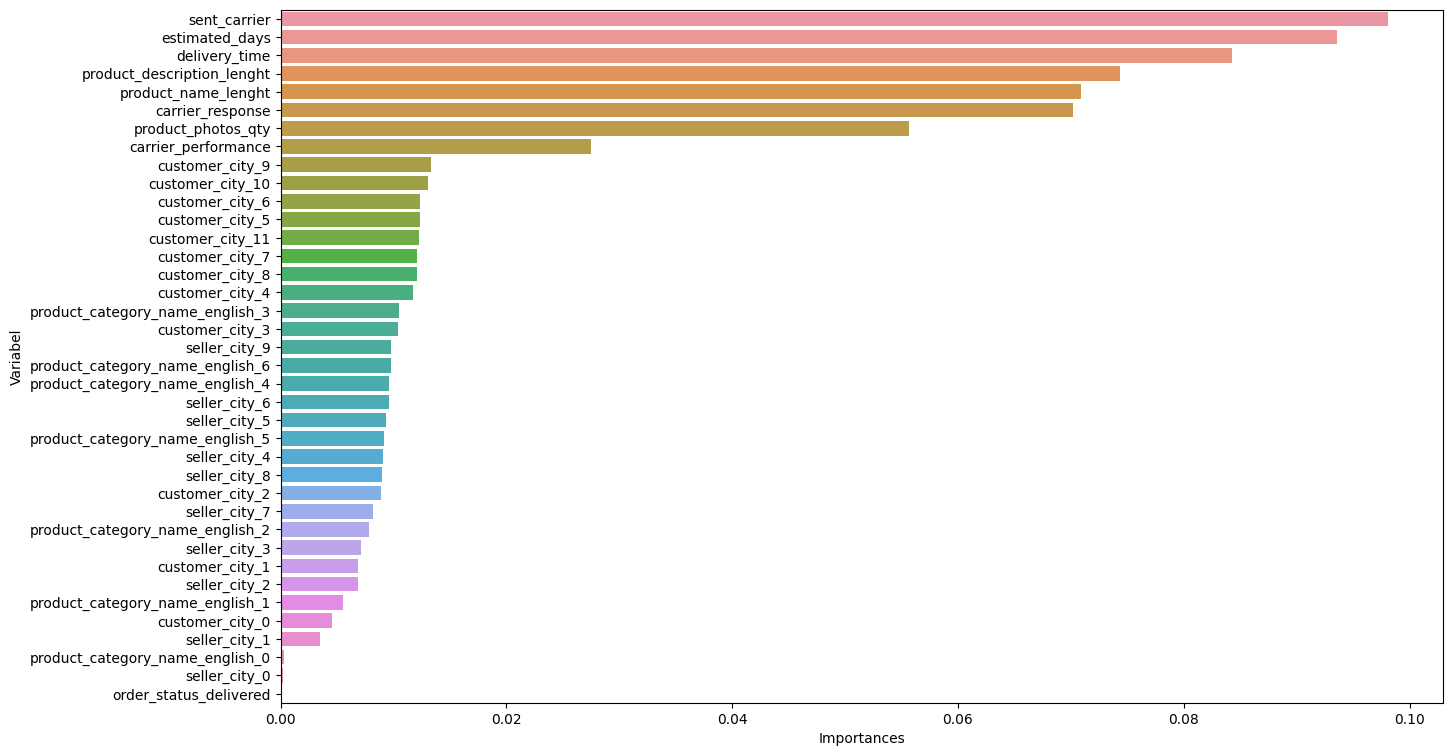

In [220]:
plt.figure(figsize=(15,9))
sns.barplot(data=df1_coef2, y='Variabel', x='Importances')
plt.show()

In [415]:
best_model_score_5 = best_model

# MODELING : SENTIMENT SCORING

In [506]:
df['new_review'] = np.where(df['review_score'] < 4, 0, 1)
df.drop(['review_score'], axis=1,inplace=True)

In [507]:
df['new_review'].value_counts()

1    86935
0    26200
Name: new_review, dtype: int64

#### Splitting Data

In [508]:
X = df.drop(['new_review'], axis=1)
y = df['new_review']

In [509]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42, stratify=y)

# Train and test set dimension
print('Shape of x_train', X_train.shape)
print('Shape of y_train', y_train.shape)
print('Shape of x_test', X_test.shape)
print('Shape of y_test', y_test.shape)

Shape of x_train (90508, 14)
Shape of y_train (90508,)
Shape of x_test (22627, 14)
Shape of y_test (22627,)


### Modelling

##### Review Final data and Define Algorithm for Modelling

'jumlah data 0 sebanyak 26200 memiliki proporsi 23.158173863083924 %'

'jumlah data 1 sebanyak 86935 memiliki proporsi 76.84182613691607 %'

<Axes: xlabel='new_review', ylabel='count'>

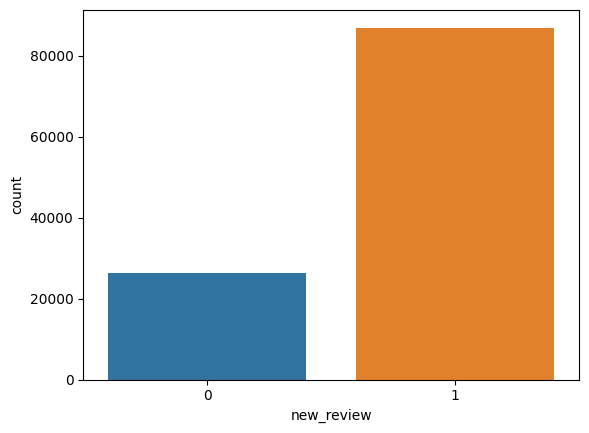

In [525]:
a=df.loc[df['new_review']==0].shape[0]
b=df.loc[df['new_review']==1].shape[0]
c=df.shape[0]

display('jumlah data 0 sebanyak {} memiliki proporsi {} %'.format(a,a/c*100),
'jumlah data 1 sebanyak {} memiliki proporsi {} %'.format(b,b/c*100),
    sns.countplot(x=df['new_review']))

Define Algorithm :
1.   Logistic Regression
3.   Decision Tree Classifier
4.   Random Forest Classifier
5.   XGBoost Classifier
6.   LightGBM Classifier
7.   AdaBoost Classifier





In [583]:
lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
xgb = XGBClassifier(eval_metric='error')
lgbm = LGBMClassifier()
abc = AdaBoostClassifier()

#### Benchmark Model

Training model without handling imbalance data with StratifiedKFold

In [584]:
models = [lr,dt,rf,xgb,lgbm,abc]
score = []
average = []
std_dev = []

for a in models:
    sk_fold = StratifiedKFold(n_splits=5)
    pipeline_model = Pipeline([('preprocess', transformer),('models', a)])
    
    model_cv = cross_val_score(pipeline_model, X_train, y_train,
                               cv=sk_fold, scoring='f1')
    
    score.append([round(i, 2) for i in model_cv])
    average.append(model_cv.mean())
    std_dev.append(model_cv.std())
    
pd.DataFrame({'models':['Logistic Regression','Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM', 'Ada Boost'],
              'f1-score':average,'stddev':std_dev}).set_index('models').sort_values(by='f1-score',ascending=False)

c:\Users\X1\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\X1\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

,f1-score,stddev
models,,
Random Forest,0.910979,0.000924
XGBoost,0.887632,0.000225
LightGBM,0.885875,0.000421
Ada Boost,0.883342,0.000769
Logistic Regression,0.879582,0.000416
Decision Tree,0.836425,0.001358


Testing model without handling imbalance data 

In [585]:
score_model_test = []

def y_pred_func(i):
    estimator=Pipeline([
        ('preprocess',transformer),
        ('model',i)])
    X_train,X_test
    
    estimator.fit(X_train,y_train)
    return(estimator,estimator.predict(X_test),X_test)

for i,j in zip(models, ['Logistic Regression','Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM', 'Ada Boost']):
    estimator,y_pred,X_test = y_pred_func(i)
    estimator.fit(X_train,y_train)
    y_pred_test = estimator.predict(X_test)
    score_model_test.append(f1_score(y_test,y_pred_test))

Result = pd.DataFrame({'models':['Logistic Regression','Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM', 'Ada Boost'],'f1-score_train':average,
              'f1-score_test':score_model_test}).set_index('models')
Result.reset_index(inplace=True)
Result


c:\Users\X1\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\X1\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

,models,f1-score_train,f1-score_test
0,Logistic Regression,0.879582,0.879639
1,Decision Tree,0.836425,0.848513
2,Random Forest,0.910979,0.914183
3,XGBoost,0.887632,0.887506
4,LightGBM,0.885875,0.885939
5,Ada Boost,0.883342,0.882978


#### Handling Imbalance Data

In [586]:
print(f'Ukuran dataset: {df.shape}')
display(df['new_review'].value_counts())
display((df['new_review'].value_counts()/df.shape[0])*100)

Ukuran dataset: (113135, 15)


1    86935
0    26200
Name: new_review, dtype: int64

1    76.841826
0    23.158174
Name: new_review, dtype: float64

##### Combine Random Oversampling and Random Undersampling

In [587]:
X = df.drop(columns=['new_review'])
y = df['new_review']

X_sampling, X_test_sampling, y_sampling, y_test_sampling = train_test_split(X, y, stratify=y, test_size=0.2, random_state=2020)

# define oversampling strategy & undersampling strategy
over = RandomOverSampler(sampling_strategy=0.5)
X_train_sampling, y_train_sampling = over.fit_resample(X_sampling, y_sampling)
under = RandomUnderSampler(sampling_strategy=0.7)
X_train_sampling, y_train_sampling = under.fit_resample(X_sampling, y_sampling)

# define the pipeline
pipeline_sample = make_pipeline(over,under)

X_train_sampling, y_train_sampling = pipeline_sample.fit_resample(X_sampling, y_sampling)

Training After Handling Imbalance Data

In [588]:
# Training
models = [lr,dt,rf,xgb,lgbm,abc]
score = []
score_avg = []
std = []
# Training w/ balanced dataset
for a in models:
    sk_fold = StratifiedKFold(n_splits=3)
    pipeline_model = Pipeline([('preprocess', transformer),('models', a)])

    model_cv=cross_val_score(pipeline_model, 
                              X_train_sampling,
                              y_train_sampling,
                              cv=sk_fold,
                              scoring='f1')

    score.append([round(i, 2) for i in model_cv])
    score_avg.append(model_cv.mean())
    std.append(model_cv.std())

print(f'Ukuran data training: {y_train_sampling.shape}')
display(y_train_sampling.value_counts())
display((y_train_sampling.value_counts()/y_train_sampling.shape[0])*100)
pd.DataFrame(data={'Models':['Logistic Regression','Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM', 'Ada Boost'],
                   'f1-score': score_avg,
                   'Stddev': std,}).set_index('Models').sort_values(by='f1-score',ascending=False)
score_imbalance = pd.DataFrame(data=score_avg,columns=['f1-score_train_imbalance'])
Result = Result.join(score_imbalance)

c:\Users\X1\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\X1\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

Ukuran data training: (84451,)


1    49677
0    34774
Name: new_review, dtype: int64

1    58.82346
0    41.17654
Name: new_review, dtype: float64

,models,f1-score_train,f1-score_test,f1-score_train_imbalance
0,Logistic Regression,0.879582,0.879639,0.746028
1,Decision Tree,0.836425,0.848513,0.806035
2,Random Forest,0.910979,0.914183,0.910476
3,XGBoost,0.887632,0.887506,0.791257
4,LightGBM,0.885875,0.885939,0.780842
5,Ada Boost,0.883342,0.882978,0.762364


Testing After Handling Imbalance Data

In [589]:
# Testing
score_model_test = []

def y_pred_func(i):
    estimator=Pipeline([
        ('preprocess',transformer),
        ('model',i)])
    X_train_sampling,X_test_sampling
    
    estimator.fit(X_train_sampling,y_train_sampling)
    return(estimator,estimator.predict(X_test_sampling),X_test_sampling)

for i,j in zip(models, ['Logistic Regression','Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM', 'Ada Boost']):
    estimator,y_pred,X_test_sampling = y_pred_func(i)
    estimator.fit(X_train_sampling,y_train_sampling)
    y_pred_test = estimator.predict(X_test_sampling)
    score_model_test.append(f1_score(y_test_sampling,y_pred_test))

print(f'Ukuran data testing: {y_test_sampling.shape}')
display(y_test_sampling.value_counts())
display((y_test_sampling.value_counts()/y_test_sampling.shape[0])*100)

pd.DataFrame({'models':['Logistic Regression','Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM', 'Ada Boost'],
              'f1-score':score_model_test}).set_index('models').sort_values(by='f1-score',ascending=False)

c:\Users\X1\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\X1\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

Ukuran data testing: (22627,)


1    17387
0     5240
Name: new_review, dtype: int64

1    76.841826
0    23.158174
Name: new_review, dtype: float64

,f1-score
models,
Random Forest,0.907539
LightGBM,0.867791
XGBoost,0.863644
Ada Boost,0.862443
Logistic Regression,0.837136
Decision Tree,0.820727


In [590]:
score = pd.DataFrame(data=score_model_test,columns=['f1-score_test_imbalance'])
Result = Result.join(score)

,models,f1-score_train,f1-score_test,f1-score_test_imbalance
0,Logistic Regression,0.879582,0.879639,0.837136
1,Decision Tree,0.836425,0.848513,0.820727
2,Random Forest,0.910979,0.914183,0.907539
3,XGBoost,0.887632,0.887506,0.863644
4,LightGBM,0.885875,0.885939,0.867791
5,Ada Boost,0.883342,0.882978,0.862443


#### Hyper-parameter Tuning for Random Forest


1.) Random forest model with default hyper-parameter



In [591]:
X = df.drop(columns=['new_review'])
y = df['new_review']

X_sampling, X_test_sampling, y_sampling, y_test_sampling = train_test_split(X, y, stratify=y, test_size=0.2, random_state=2020)

# define oversampling strategy & undersampling strategy
over = RandomOverSampler(sampling_strategy=0.5)
X_train_sampling, y_train_sampling = over.fit_resample(X_sampling, y_sampling)
under = RandomUnderSampler(sampling_strategy=0.7)
X_train_sampling, y_train_sampling = under.fit_resample(X_sampling, y_sampling)

# define the pipeline
pipeline_sample = make_pipeline(over,under)

X_train_sampling, y_train_sampling = pipeline_sample.fit_resample(X_sampling, y_sampling)

In [592]:
rf = RandomForestClassifier()
X_sampling, X_test_sampling, y_sampling, y_test_sampling = train_test_split(X, y, stratify=y, test_size=0.2, random_state=2020)

# define oversampling strategy & undersampling strategy
over = RandomOverSampler(sampling_strategy=0.5)
X_train_sampling, y_train_sampling = over.fit_resample(X_sampling, y_sampling)
under = RandomUnderSampler(sampling_strategy=0.7)
X_train_sampling, y_train_sampling = under.fit_resample(X_sampling, y_sampling)

# define the pipeline
pipeline_sample = make_pipeline(over,under)

X_train_rf, y_train_rf = pipeline_sample.fit_resample(X_sampling, y_sampling)

estimator_rf = Pipeline([
    ('preprocess', transformer),
    ('model', rf)])
estimator_rf.fit(X_train_rf,y_train_rf)
pred_rf = estimator_rf.predict(X_test)

In [593]:
#Checking different metrics for random forest model with default hyper parameters
score = 'f1'
print('Checking different metrics for random forest model with default hyper parameters:\n')
print("Training accuracy: ",estimator_rf.score(X_train_rf,y_train_rf))
testscore = f1_score(y_test, pred_rf)
print('Testing accuracy: ',testscore)
conf_mat = confusion_matrix(y_test, pred_rf)
print('Confusion Matrix: \n',conf_mat)
class_rep3 = classification_report(y_test,pred_rf)
print('Classification Report: \n',class_rep3)

Checking different metrics for random forest model with default hyper parameters:

Training accuracy:  0.9991711169790767
Testing accuracy:  0.9752543147788318
Confusion Matrix: 
 [[ 4696   544]
 [  322 17065]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.90      0.92      5240
           1       0.97      0.98      0.98     17387

    accuracy                           0.96     22627
   macro avg       0.95      0.94      0.95     22627
weighted avg       0.96      0.96      0.96     22627



2.) Random forest model with Tuning hyper-parameter

In [594]:
criterion = ["gini", "entropy", "log_loss"]
max_features = ["sqrt", "log2", None]
model_score = 'f1'

In [595]:
cv_scores_criterion = []
cv_scores_max_features = []

for k in criterion:
    rf = RandomForestClassifier(random_state=0,criterion=k)
    skfold=StratifiedKFold(n_splits=5)
    estimator=Pipeline([
    ('preprocess',transformer),
    ('model',rf)])
    model_cv=cross_val_score(estimator,X_train_rf,y_train_rf,cv=skfold,scoring=model_score)
    cv_scores_criterion.append(model_cv.mean())

for k in max_features:
    rf = RandomForestClassifier(random_state=0,max_features=k)
    skfold=StratifiedKFold(n_splits=5)
    estimator=Pipeline([
    ('preprocess',transformer),
    ('model',rf)])
    model_cv=cross_val_score(estimator,X_train_rf,y_train_rf,cv=skfold,scoring=model_score)
    cv_scores_max_features.append(model_cv.mean())

In [596]:
criterion_kesimpulan = pd.DataFrame(data = {
    'criterion_value' : criterion,
    'criterion_score' : cv_scores_criterion
})
max_features_kesimpulan = pd.DataFrame(data = {
    'max_features_value' : max_features,
    'max_features_score' : cv_scores_max_features
})

display(criterion_kesimpulan,max_features_kesimpulan)

,criterion_value,criterion_score
0,gini,0.920492
1,entropy,0.920771
2,log_loss,0.920771


,max_features_value,max_features_score
0,sqrt,0.920492
1,log2,0.920319
2,None,0.914806


In [597]:
n_estimators = range(50,150,25)

cv_scores_n_estimators = []
n_estimators_value = []

for k in n_estimators:
    rf = RandomForestClassifier(random_state=0,n_estimators=k)
    skfold=StratifiedKFold(n_splits=5)
    estimator=Pipeline([
    ('preprocess',transformer),
    ('model',rf)])
    model_cv=cross_val_score(estimator,X_train_rf,y_train_rf,cv=skfold,scoring=model_score)
    cv_scores_n_estimators.append(model_cv.mean())
    n_estimators_value.append(k)
print (cv_scores_n_estimators,n_estimators_value)

[0.9153311410474178, 0.9200940710204248, 0.9204923762805068, 0.9219867173590488] [50, 75, 100, 125]


In [598]:
n_estimators = range(150,250,25)

for k in n_estimators:
    rf = RandomForestClassifier(random_state=0,n_estimators=k)
    skfold=StratifiedKFold(n_splits=5)
    estimator=Pipeline([
    ('preprocess',transformer),
    ('model',rf)])
    model_cv=cross_val_score(estimator,X_train_rf,y_train_rf,cv=skfold,scoring=model_score)
    cv_scores_n_estimators.append(model_cv.mean())
    n_estimators_value.append(k)
print (cv_scores_n_estimators,n_estimators_value)

[0.9153311410474178, 0.9200940710204248, 0.9204923762805068, 0.9219867173590488, 0.9223022239655505, 0.9226928872615776, 0.9224183121399525, 0.9229126845618879] [50, 75, 100, 125, 150, 175, 200, 225]


In [599]:
n_estimators = range(250,350,50)

for k in n_estimators:
    rf = RandomForestClassifier(random_state=0,n_estimators=k)
    skfold=StratifiedKFold(n_splits=5)
    estimator=Pipeline([
    ('preprocess',transformer),
    ('model',rf)])
    model_cv=cross_val_score(estimator,X_train_rf,y_train_rf,cv=skfold,scoring=model_score)
    cv_scores_n_estimators.append(model_cv.mean())
    n_estimators_value.append(k)
print(cv_scores_n_estimators,n_estimators_value)

,0,1,2,3,4,5,6,7,8,9,10,11,12
value,0.915651,0.920599,0.920989,0.922601,0.922561,0.923565,0.923351,0.923529,0.923354,0.923661,0.92383,0.924074,0.924117
n,50.000000,75.000000,100.000000,125.000000,150.000000,175.000000,200.000000,225.000000,250.000000,300.000000,350.00000,450.000000,550.000000


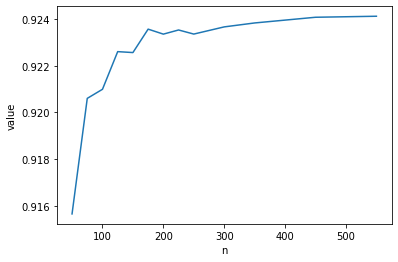

In [ ]:
n_estimators_graph={
    'value' : cv_scores_n_estimators,
    'n' :  n_estimators_value
}
n_estimators_graph=pd.DataFrame(n_estimators_graph)
sns.lineplot(data=n_estimators_graph, x=n_estimators_graph['n'],y=n_estimators_graph['value'])
n_estimators_graph.transpose()

####  Performing hyper-parameter optimisation with GridSearch

In [ ]:
rf = RandomForestClassifier(random_state=0)

skfold=StratifiedKFold(n_splits=3)

estimator=Pipeline([
        ('preprocess',transformer),
        ('model',rf)])

In [ ]:
param_rf = [{
    # 'model__criterion': ["gini", "entropy", "log_loss"],
    'model__max_features' :["sqrt", "log2", None],
    'model__n_estimators' : range(150,175,75)
}]

In [ ]:
grid = GridSearchCV(estimator, n_jobs=-1, param_grid=param_rf, scoring=model_score, cv=skfold, error_score = 'raise')

In [ ]:
grid.fit(X_train_rf,y_train_rf)
print(grid.best_score_)
print(grid.best_params_)

0.910859051617841
{'model__max_features': 'log2', 'model__n_estimators': 150}


In [ ]:
# Best Model After Tuning
best_model = grid.best_estimator_
best_model.fit(X_train_rf, y_train_rf)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['order_status']),
                                                 ('binary', BinaryEncoder(),
                                                  ['customer_city',
                                                   'seller_city',
                                                   'product_category_name_english']),
                                                 ('Scaling', RobustScaler(),
                                                  ['price', 'freight_value',
                                                   'product_name_lenght',
                                                   'product_description_lenght',
                                                   'product_photos_qty',
                                                   'carrier_response',
                                                   'carrier_performance',
                                                   'delivery_time',
                                                   'estimated_days',
                                                   'sent_carrier'])])),
                ('model',
                 RandomForestClassifier(max_features='log2', n_estimators=150,
                                        random_state=0))])

In [ ]:
# Default without Tuning
estimator=pipeline.Pipeline([
        ('preprocess',transformer),
        ('model',rf)])

estimator.fit(X_train_rf, y_train_rf)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['order_status']),
                                                 ('binary', BinaryEncoder(),
                                                  ['customer_city',
                                                   'seller_city',
                                                   'product_category_name_english']),
                                                 ('Scaling', RobustScaler(),
                                                  ['price', 'freight_value',
                                                   'product_name_lenght',
                                                   'product_description_lenght',
                                                   'product_photos_qty',
                                                   'carrier_response',
                                                   'carrier_performance',
                                                   'delivery_time',
                                                   'estimated_days',
                                                   'sent_carrier'])])),
                ('model', RandomForestClassifier(random_state=0))])

In [ ]:
y_pred_default = estimator.predict(X_test)
y_pred_proba_default = estimator.predict_proba(X_test)
y_pred_tuned = best_model.predict(X_test)
y_pred_proba_tuned = best_model.predict_proba(X_test)

f1_default = f1_score(y_test, y_pred_default)
f1_tuned = f1_score(y_test, y_pred_tuned)

print('MODEL Score Default Random Forest : ', f1_default)
print('MODEL Score Tuned Random Forest: ', f1_tuned)

MODEL Score Default Random Forest :  0.9754229538180155
MODEL Score Tuned Random Forest:  0.97615716284515


In [ ]:
report_default = classification_report(y_test, y_pred_default)
report_tuned = classification_report(y_test, y_pred_tuned)

print('Classification Report Default RandomForrest : \n', report_default)
print('Classification Report Tuned RandomForrest : \n', report_tuned)

Classification Report Default RandomForrest : 
               precision    recall  f1-score   support

           0       0.94      0.90      0.92      5247
           1       0.97      0.98      0.98     17392

    accuracy                           0.96     22639
   macro avg       0.95      0.94      0.95     22639
weighted avg       0.96      0.96      0.96     22639

Classification Report Tuned RandomForrest : 
               precision    recall  f1-score   support

           0       0.94      0.90      0.92      5247
           1       0.97      0.98      0.98     17392

    accuracy                           0.96     22639
   macro avg       0.95      0.94      0.95     22639
weighted avg       0.96      0.96      0.96     22639



#### Features Importances

In [ ]:
feature_name_onehot=estimator.named_steps['preprocess'].named_transformers_['onehot'].get_feature_names_out().tolist()
feature_name_binary=estimator.named_steps['preprocess'].named_transformers_['binary'].get_feature_names_out()
feature_name_scaling=estimator.named_steps['preprocess'].named_transformers_['Scaling'].get_feature_names_out().tolist()

feature_name_transformers = pd.DataFrame(feature_name_onehot+feature_name_binary+feature_name_scaling,columns=['Variabel'])
feature_name_transformers.drop(index=[30,31],inplace=True,)
feature_name_transformers.reset_index(drop=True,inplace=True)

feature_importance_coef1 = pd.DataFrame(best_model['model'].feature_importances_.tolist(),columns=['Importances'])

df_coef2 = pd.concat([feature_name_transformers,feature_importance_coef1],axis=1).sort_values('Importances', ascending=False)

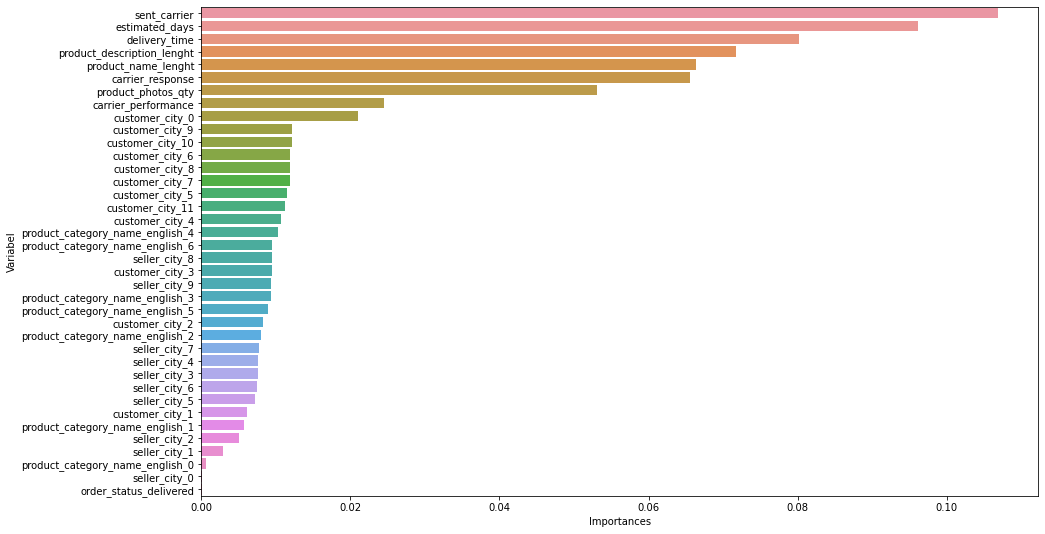

In [ ]:
plt.figure(figsize=(15,9))
sns.barplot(data=df_coef2, y='Variabel', x='Importances')
plt.show()

In [ ]:
best_model_Sentiment = best_model 

# FINAL MODEL
Setelah dilakukan running test, diperoleh scoring sebagai berikut
1. Model : Score 5
* MODEL Score Default Random Forrest :  0.7770476254996275
* MODEL Score Tuned Random Forrest :  0.7796004910166275
2. Model : Sentiment
* MODEL Score Default Random Forest :  0.9754229538180155
* MODEL Score Tuned Random Forest:  0.97615716284515


# Conclusion

1. Model : Score 5
* metric utama untuk scoring yang digunakan adalah f1_score
* berdasarkan hyperparameter tunning dan komparasi antara interpretable dan explainable ML, model terbaik yaitu Random Forrest memiliki parameter
    * criterion : 'gini'
    * max_feature : 'sqrt'
    * n_estimator : 175
* berdasarkan visualisasi feature importance, fitur yang paling penting adalah delivery_time, carrier_performance dan estimated_days

1. Model : Sentiment
* metric utama untuk scoring yang digunakan adalah f1_score
* berdasarkan hyperparameter tunning dan komparasi antara interpretable dan explainable ML, model terbaik yaitu Random Forrest memiliki parameter
    * criterion : 'gini'
    * max_feature : 'log2'
    * n_estimator : 150
* berdasarkan visualisasi feature importance, fitur yang paling penting adalah sent_carrier, estimated_days, delivery_time

dalam pengambilan final model, diambil beberapa faktor yaitu score, waktu model berjalan, fleksibilitas.berrdasarkan hasil yang diperoleh, **model Sentiment diambil** karena memiliki score yang lebih tinggi dari model Score 5. 

Dengan nilai n_estimator lebih kecil, diperoleh nilai yang lebih baik sehingga dapat di tunning kembali untuk disesuaikan waktu runningnya, hal ini dapat menyebabkan cost running ketika di deploy dan maintenance dapat lebih murah, karena model menjadi semakin sederhana dengan tingkat akurasi yang lebih tinggi. dalam segi fleksibilitas, model Sentiment sudah traning imbalance data sehingga ketika dihadapkan dengan model yang memiliki imbalance data, model Sentiment sudah siap.

# Business Comparison

Dalam membuat suatu toko/barang penjualan, dibutuhkan stok barang untuk mempersiapkan ketika masuk pembelian oleh customer, diambil contoh barang yang ingin dijual adalah masker (standar [harga] dalam rupiah per kotak adalah Rp 55.026, dengan referensi dari e-commerce indonesia) dan dipersiapkan barang sebanyak 500 buah). diperlukan modal sebesar Rp 27.513.000 untuk 1 buah halaman penjualan. biaya yang cukup besar untuk memulai suatu penjualan.

Jika terdapat review yang kurang baik di awal penjualan, maka secara otomatis customer akan membeli barang di toko lain dan seller kehilangan uang modalnya. Sehingga dengan prediction tools ini akan membuat seller lebih percaya diri dan membantu penjualan agar review score mendapatkan nilai baik

Untuk hal lain seperti administrasi, quality control, ruang penyimpanan barang stok dan hal lainnya pada perhitungan ini dianggap dilakukan dengan kapasitas seller sendiri.

# Model Limitation

Model yang dihasilkan akan berlaku sesuai dengan batasan data yang ada, yaitu

* kualitas barang bukan menjadi faktor pada modeling
* karena model menggunkaan scoring f1, maka prediksi akan condong ke kelas positif

# Recommendation
Dengan tujuan pembuatan prediction tool kepada penjual, perlu dilakukan beberapa hal
* untuk memperoleh hasil rekomendasi yang lebih baik, perlu dilakukan penarikan data di sisi lain seperti jumlah pembelian dan review score saat pembeli membeli barang.
* Feature importance yang tinggi di kedua model yang dianalisis pada delivery time mengindikasikan bahwa kepentingan lama pengiriman sangat tinggi. Olist perlu memberikan perhatian lebih kepada logistik partner yang bekerjasama agar barang bisa sampai dengan cepat, bisa dengan pengaturan distribusi atau layanan call center/ aduan ketika terdapat barang yang sampai lebih lambat dari biasanya
* Olist dapat melakukan QC atau penyaringan secara kualitas untuk menjamin kualitas barang yang dijual di Marketplace tersebut

In [ ]:
import pickle
pickle.dump(best_model_Sentiment,open('best_model_RandomForrest_Sentiment.sav','wb'))

link tableau dapat dilihat pada tautan [berikut](https://public.tableau.com/views/BrazilianE-CommerceDashboard_16800135900540/Dashboard?:language=en-US&:display_count=n&:origin=viz_share_link)